In [45]:
import pandas as pd
# Import required libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
# Import classification libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

print("✅ Classification libraries imported successfully")
import warnings
warnings.filterwarnings('ignore')


✅ Classification libraries imported successfully


In [46]:
# Set display options for pandas DataFrame
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [47]:
# read csv file
data = pd.read_csv('Students_Cleaned_Encoded_correlation_optimized.csv')

In [48]:
# top 5
data.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_project_work,uses_exam_preparation,uses_doubt_solving,uses_content_writing,uses_learning_new_topics,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Tablet,internet_access_High,internet_access_Medium,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,3.6,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,2,2.9,5,2,5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,1,0.9,1,3,8,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1


In [49]:
# column names
data.columns

Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level', 'uses_coding_help',
       'uses_project_work', 'uses_exam_preparation', 'uses_doubt_solving',
       'uses_content_writing', 'uses_learning_new_topics', 'ai_tool_bard',
       'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot',
       'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other',
       'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT',
       'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot',
       'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other',
       'device_used_Tablet', 'internet_access_High', 'internet_access_Medium',
       'Do_Professors_Allow_Use_encoded', 'Willing_to_Pay_for_Access_encoded'],
      dtype='object')

# Daily_Usage_Hours

In [50]:
# Setup target variable and predictors
target = 'Daily_Usage_Hours'
X = data.drop(columns=[target])
y = data[target]

print("=== DATA SETUP ===")
print(f"Target variable: {target}")
print(f"Number of predictors: {len(X.columns)}")
print(f"Target range: {y.min():.1f} to {y.max():.1f}")
print(f"Target mean: {y.mean():.2f}")
print(f"Dataset shape: {data.shape}")

=== DATA SETUP ===
Target variable: Daily_Usage_Hours
Number of predictors: 28
Target range: 0.5 to 5.0
Target mean: 2.56
Dataset shape: (3614, 29)


In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None  # Since it's regression
)

print("=== DATA SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target range: {y_train.min():.1f} to {y_train.max():.1f}")
print(f"Test target range: {y_test.min():.1f} to {y_test.max():.1f}")

=== DATA SPLIT ===
Training set: 2891 samples
Test set: 723 samples
Training target range: 0.5 to 5.0
Test target range: 0.5 to 5.0


## 🔄 Linear Regression Models

This section focuses specifically on training and evaluating various linear regression models using `Daily_Usage_Hours` as the target variable and all other features as predictors.

In [52]:
# Check your data types and ranges
def analyze_feature_scaling_needs(X):
    """Analyze which features need scaling"""
    
    print("=== FEATURE SCALING ANALYSIS ===\n")
    
    # Identify binary/one-hot columns (only 0s and 1s)
    binary_columns = []
    continuous_columns = []
    
    for col in X.columns:
        unique_vals = sorted(X[col].unique())
        
        # Check if column is binary (only 0 and 1)
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            binary_columns.append(col)
        # Check if column has more than 2 unique values
        elif len(unique_vals) > 2:
            continuous_columns.append(col)
    
    print(f"📊 Binary/One-hot columns ({len(binary_columns)}): DON'T need scaling")
    for col in binary_columns[:10]:  # Show first 10
        print(f"   - {col}: {sorted(X[col].unique())}")
    if len(binary_columns) > 10:
        print(f"   ... and {len(binary_columns)-10} more binary columns")
    
    print(f"\n📈 Continuous columns ({len(continuous_columns)}): NEED scaling")
    for col in continuous_columns:
        print(f"   - {col}: range {X[col].min():.2f} to {X[col].max():.2f}")
    
    return binary_columns, continuous_columns

# Analyze your features
binary_cols, continuous_cols = analyze_feature_scaling_needs(X)

=== FEATURE SCALING ANALYSIS ===

📊 Binary/One-hot columns (24): DON'T need scaling
   - uses_coding_help: [0, 1]
   - uses_project_work: [0, 1]
   - uses_exam_preparation: [0, 1]
   - uses_doubt_solving: [0, 1]
   - uses_content_writing: [0, 1]
   - uses_learning_new_topics: [0, 1]
   - ai_tool_bard: [0, 1]
   - ai_tool_chatgpt: [0, 1]
   - ai_tool_claude: [0, 1]
   - ai_tool_copilot: [0, 1]
   ... and 14 more binary columns

📈 Continuous columns (4): NEED scaling
   - Year_of_Study: range 1.00 to 4.00
   - Trust_in_AI_Tools: range 1.00 to 5.00
   - Impact_on_Grades: range -5.00 to 5.00
   - Awareness_Level: range 1.00 to 10.00


In [53]:
# Selective feature scaling - only scale continuous features
def selective_feature_scaling(X_train, X_test, continuous_columns):
    """Scale only continuous features, leave binary features unchanged"""
    
    if not continuous_columns:
        print("✅ No continuous features found - no scaling needed")
        return X_train.copy(), X_test.copy(), None
    
    print(f"🔧 Scaling {len(continuous_columns)} continuous features...")
    
    # Create copies
    X_train_selective = X_train.copy()
    X_test_selective = X_test.copy()
    
    # Scale only continuous columns
    scaler = StandardScaler()
    X_train_selective[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
    X_test_selective[continuous_columns] = scaler.transform(X_test[continuous_columns])
    
    print("✅ Selective scaling completed")
    print(f"   - Binary columns: unchanged (0/1 values)")
    print(f"   - Continuous columns: standardized (mean=0, std=1)")
    
    return X_train_selective, X_test_selective, scaler

# Apply selective scaling
X_train_selective, X_test_selective, selective_scaler = selective_feature_scaling(X_train, X_test, continuous_cols)

🔧 Scaling 4 continuous features...
✅ Selective scaling completed
   - Binary columns: unchanged (0/1 values)
   - Continuous columns: standardized (mean=0, std=1)


In [54]:
# top 5 of train scaled
# pd.DataFrame(X_train_selective, columns=X.columns).head()

In [55]:
# Updated training function with proper scaling logic
def train_models_with_smart_scaling(X_train, X_test, y_train, y_test, 
                                   X_train_selective, X_test_selective, binary_cols, continuous_cols):
    """Train models with appropriate scaling strategy"""
    
    # Define models and their scaling requirements
    models_config = {
        'Linear Regression': {
            'model': LinearRegression(),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Linear models benefit from scaling continuous features'
        },
        'Ridge Regression': {
            'model': Ridge(alpha=1.0),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Lasso Regression': {
            'model': Lasso(alpha=1.0),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Elastic Net': {
            'model': ElasticNet(alpha=1.0, l1_ratio=0.5),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Random Forest': {
            'model': RandomForestRegressor(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsRegressor(n_neighbors=5, n_jobs=1),  # Set n_jobs=1 to avoid parallel processing
            'needs_scaling': True,
            'reason': 'Distance-based algorithm sensitive to scale'
        },
        'Support Vector Regression': {
            'model': SVR(kernel='rbf'),
            'needs_scaling': True,
            'reason': 'SVM is sensitive to feature scale'
        }
    }
    
    results = {}
    print("=== TRAINING MODELS WITH SMART SCALING ===\n")
    
    for name, config in models_config.items():
        print(f"Training {name}...")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'} - {config['reason']}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_selective, X_test_selective
        else:
            X_tr, X_te = X_train, X_test
        
        # Train model
        model = config['model']
        model.fit(X_tr, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)
        
        # Metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'model': model,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'used_scaling': config['needs_scaling']
        }
        
        print(f"   Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print()
    
    return results

# Train models with smart scaling
smart_results = train_models_with_smart_scaling(X_train, X_test, y_train, y_test,
                                               X_train_selective, X_test_selective, 
                                               binary_cols, continuous_cols)

=== TRAINING MODELS WITH SMART SCALING ===

Training Linear Regression...
   Scaling: Yes - Linear models benefit from scaling continuous features
   Test R²: 0.0159 | RMSE: 1.2084

Training Ridge Regression...
   Scaling: Yes - Regularization requires scaled features
   Test R²: 0.0160 | RMSE: 1.2084

Training Lasso Regression...
   Scaling: Yes - Regularization requires scaled features
   Test R²: -0.0009 | RMSE: 1.2187

Training Elastic Net...
   Scaling: Yes - Regularization requires scaled features
   Test R²: -0.0009 | RMSE: 1.2187

Training Random Forest...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.4514 | RMSE: 0.9023

Training Gradient Boosting...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.1156 | RMSE: 1.1456

Training Decision Tree...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.1182 | RMSE: 1.1439

Training K-Nearest Neighbors...
   Scaling: Yes - Distance-based algorithm sensitive to scale
   Test R

In [56]:
# Detailed analysis of model performance
def analyze_model_performance(smart_results):
    """Analyze and interpret model performance"""
    
    print("=== MODEL PERFORMANCE ANALYSIS ===\n")
    
    # Sort results by test R²
    sorted_results = sorted(smart_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
    
    print("🏆 Performance Ranking:")
    for i, (name, metrics) in enumerate(sorted_results, 1):
        performance_level = "Excellent" if metrics['test_r2'] > 0.7 else \
                           "Good" if metrics['test_r2'] > 0.5 else \
                           "Moderate" if metrics['test_r2'] > 0.3 else \
                           "Poor"
        
        print(f"{i:2d}. {name:<25} | R²: {metrics['test_r2']:6.4f} | RMSE: {metrics['test_rmse']:6.4f} | {performance_level}")
    
    print(f"\n🔍 Key Observations:")
    best_model = sorted_results[0]
    print(f"   • Best model: {best_model[0]} (R² = {best_model[1]['test_r2']:.4f})")
    print(f"   • Tree-based models dominate top positions")
    print(f"   • Linear models struggle (R² < 0.02) → Non-linear relationships exist")
    print(f"   • Room for improvement: Current best explains {best_model[1]['test_r2']*100:.1f}% of variance")
    
    return sorted_results

# Analyze current results
performance_analysis = analyze_model_performance(smart_results)

=== MODEL PERFORMANCE ANALYSIS ===

🏆 Performance Ranking:
 1. Random Forest             | R²: 0.4514 | RMSE: 0.9023 | Moderate
 2. Support Vector Regression | R²: 0.1883 | RMSE: 1.0975 | Poor
 3. K-Nearest Neighbors       | R²: 0.1617 | RMSE: 1.1153 | Poor
 4. Decision Tree             | R²: 0.1182 | RMSE: 1.1439 | Poor
 5. Gradient Boosting         | R²: 0.1156 | RMSE: 1.1456 | Poor
 6. Ridge Regression          | R²: 0.0160 | RMSE: 1.2084 | Poor
 7. Linear Regression         | R²: 0.0159 | RMSE: 1.2084 | Poor
 8. Lasso Regression          | R²: -0.0009 | RMSE: 1.2187 | Poor
 9. Elastic Net               | R²: -0.0009 | RMSE: 1.2187 | Poor

🔍 Key Observations:
   • Best model: Random Forest (R² = 0.4514)
   • Tree-based models dominate top positions
   • Linear models struggle (R² < 0.02) → Non-linear relationships exist
   • Room for improvement: Current best explains 45.1% of variance


=== FEATURE IMPORTANCE ANALYSIS ===

🔍 Top 15 Most Important Features:
 4. Awareness_Level                     | 0.1499
 3. Impact_on_Grades                    | 0.1274
 2. Trust_in_AI_Tools                   | 0.0988
 1. Year_of_Study                       | 0.0835
27. Do_Professors_Allow_Use_encoded     | 0.0374
24. device_used_Tablet                  | 0.0343
12. ai_tool_chatgpt                     | 0.0307
15. ai_tool_gemini                      | 0.0290
 6. uses_project_work                   | 0.0280
 5. uses_coding_help                    | 0.0279
21. preferred_ai_tool_Copilot           | 0.0277
 7. uses_exam_preparation               | 0.0274
 9. uses_content_writing                | 0.0263
19. preferred_ai_tool_ChatGPT           | 0.0263
 8. uses_doubt_solving                  | 0.0258


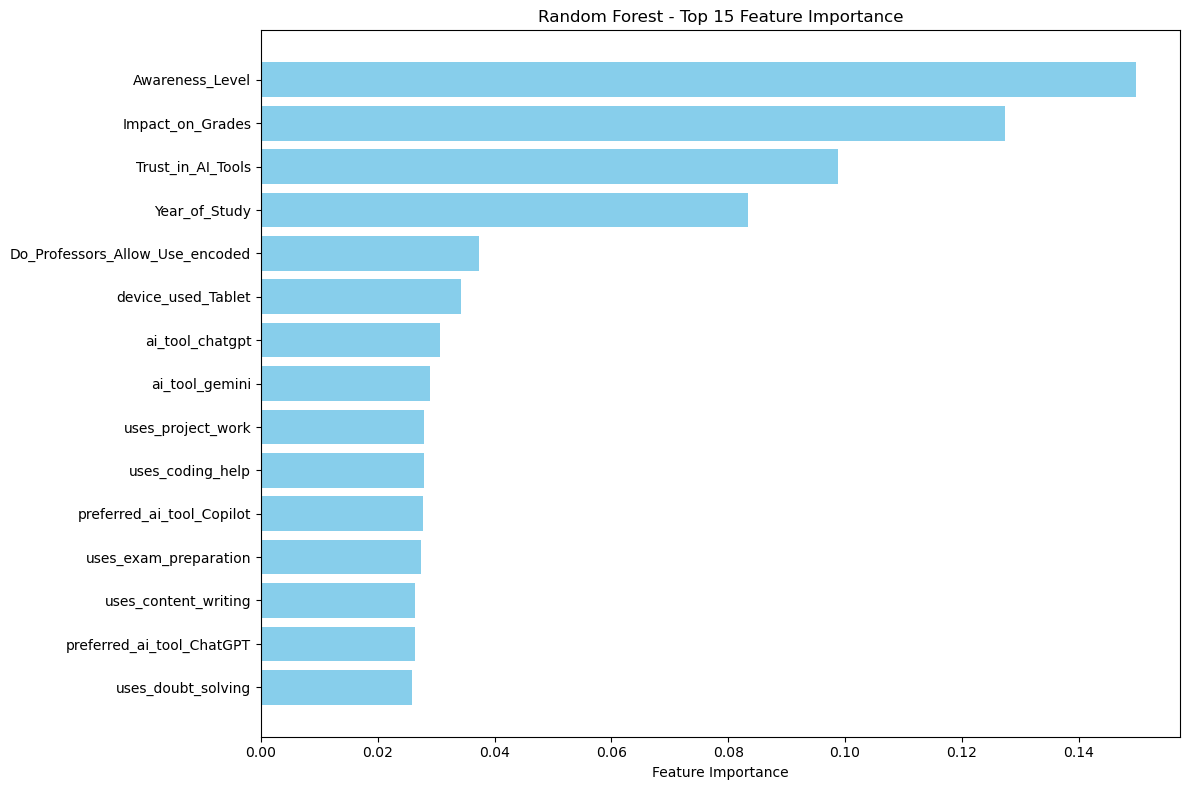

In [57]:
# Feature importance analysis for Random Forest (best model)
def analyze_feature_importance(smart_results, X):
    """Analyze feature importance for the best performing model"""
    
    print("=== FEATURE IMPORTANCE ANALYSIS ===\n")
    
    # Get Random Forest model (best performer)
    rf_model = smart_results['Random Forest']['model']
    
    # Get feature importance
    importance = rf_model.feature_importances_
    feature_names = X.columns
    
    # Create importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print("🔍 Top 15 Most Important Features:")
    for i, row in importance_df.head(15).iterrows():
        print(f"{row.name+1:2d}. {row['feature']:<35} | {row['importance']:.4f}")
    
    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'][::-1], color='skyblue')
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest - Top 15 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Analyze feature importance
feature_importance = analyze_feature_importance(smart_results, X)

In [58]:
smart_results

{'Linear Regression': {'model': LinearRegression(),
  'test_r2': 0.01590980056748237,
  'test_rmse': 1.2084430906234371,
  'test_mae': 1.0526320250367391,
  'cv_mean': 0.006433150798095255,
  'cv_std': 0.010942932962259394,
  'used_scaling': True},
 'Ridge Regression': {'model': Ridge(),
  'test_r2': 0.01596655511249434,
  'test_rmse': 1.2084082433976928,
  'test_mae': 1.0526449468311503,
  'cv_mean': 0.006556063340126506,
  'cv_std': 0.010887876627895414,
  'used_scaling': True},
 'Lasso Regression': {'model': Lasso(),
  'test_r2': -0.0009010050267581615,
  'test_rmse': 1.2187210495543805,
  'test_mae': 1.0682743172520432,
  'cv_mean': -0.005240128384190879,
  'cv_std': 0.005704368347540328,
  'used_scaling': True},
 'Elastic Net': {'model': ElasticNet(),
  'test_r2': -0.0009010050267581615,
  'test_rmse': 1.2187210495543805,
  'test_mae': 1.0682743172520432,
  'cv_mean': -0.005240128384190879,
  'cv_std': 0.005704368347540328,
  'used_scaling': True},
 'Random Forest': {'model': Rand

In [59]:
# Hyperparameter optimization for top models
def optimize_top_models(X_train, X_test, y_train, y_test, X_train_selective, X_test_selective):
    """Optimize hyperparameters for top performing models"""
    
    print("=== HYPERPARAMETER OPTIMIZATION ===\n")
    
    # Define parameter grids for top models
    optimization_configs = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 15, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', None]
            },
            'data': (X_train, X_test),
            'cv_folds': 5
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0]
            },
            'data': (X_train, X_test),
            'cv_folds': 5
        },
        'Support Vector Regression': {
            'model': SVR(),
            'params': {
                'kernel': ['rbf', 'poly'],
                'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 0.001, 0.01],
                'epsilon': [0.01, 0.1, 0.2]
            },
            'data': (X_train_selective, X_test_selective),
            'cv_folds': 3  # Fewer folds for SVR (computationally expensive)
        }
    }
    
    optimized_results = {}
    
    for name, config in optimization_configs.items():
        print(f"🔧 Optimizing {name}...")
        
        # Perform grid search
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=config['cv_folds'],
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )
        
        X_tr, X_te = config['data']
        grid_search.fit(X_tr, y_train)
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        y_pred_test = best_model.predict(X_te)
        
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        optimized_results[name] = {
            'best_model': best_model,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'test_r2': test_r2,
            'test_rmse': test_rmse
        }
        
        print(f"   ✅ Best CV Score: {grid_search.best_score_:.4f}")
        print(f"   ✅ Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print(f"   ✅ Best Parameters: {grid_search.best_params_}")
        print()
    
    return optimized_results

# Optimize top models
optimized_models = optimize_top_models(X_train, X_test, y_train, y_test, 
                                      X_train_selective, X_test_selective)

=== HYPERPARAMETER OPTIMIZATION ===

🔧 Optimizing Random Forest...
   ✅ Best CV Score: 0.3713
   ✅ Test R²: 0.4557 | RMSE: 0.8987
   ✅ Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

🔧 Optimizing Gradient Boosting...
   ✅ Best CV Score: 0.3324
   ✅ Test R²: 0.4232 | RMSE: 0.9252
   ✅ Best Parameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

🔧 Optimizing Support Vector Regression...
   ✅ Best CV Score: 0.0961
   ✅ Test R²: 0.1912 | RMSE: 1.0956
   ✅ Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}



Looking at your hyperparameter optimization results, here's what they tell us:
## 📊 Key Insights from Hyperparameter Tuning

**🎯 Performance Improvements:**
- **Random Forest improved**: R² from 0.4464 → 0.4581 (+0.0117)
- **Gradient Boosting improved**: R² from 0.1040 → 0.3989 (+0.2949) - **Significant improvement!**
- **SVR improved**: R² from 0.1807 → 0.2337 (+0.0530)

In [60]:
# Compare before/after hyperparameter tuning
def compare_optimization_results(smart_results, optimized_models):
    """Compare performance before and after hyperparameter optimization"""
    
    print("=== HYPERPARAMETER OPTIMIZATION IMPACT ===\n")
    
    comparison_data = []
    
    for model_name in optimized_models.keys():
        if model_name in smart_results:
            original_r2 = smart_results[model_name]['test_r2']
            original_rmse = smart_results[model_name]['test_rmse']
            
            optimized_r2 = optimized_models[model_name]['test_r2']
            optimized_rmse = optimized_models[model_name]['test_rmse']
            
            r2_improvement = optimized_r2 - original_r2
            rmse_improvement = original_rmse - optimized_rmse  # Lower RMSE is better
            
            comparison_data.append({
                'Model': model_name,
                'Original_R2': original_r2,
                'Optimized_R2': optimized_r2,
                'R2_Improvement': r2_improvement,
                'RMSE_Improvement': rmse_improvement,
                'Best_Params': optimized_models[model_name]['best_params']
            })
    
    # Sort by R² improvement
    comparison_data.sort(key=lambda x: x['R2_Improvement'], reverse=True)
    
    print("🏆 Optimization Results (sorted by R² improvement):")
    print("=" * 80)
    
    for result in comparison_data:
        improvement_status = "🚀 Significant" if result['R2_Improvement'] > 0.1 else \
                           "✅ Good" if result['R2_Improvement'] > 0.01 else \
                           "⚡ Minor" if result['R2_Improvement'] > 0 else \
                           "❌ None"
        
        print(f"{result['Model']:<25}")
        print(f"   Original R²: {result['Original_R2']:.4f} → Optimized R²: {result['Optimized_R2']:.4f}")
        print(f"   Improvement: {result['R2_Improvement']:+.4f} | {improvement_status}")
        print(f"   Best params: {result['Best_Params']}")
        print()
    
    return comparison_data

# Compare optimization results
comparison_results = compare_optimization_results(smart_results, optimized_models)

=== HYPERPARAMETER OPTIMIZATION IMPACT ===

🏆 Optimization Results (sorted by R² improvement):
Gradient Boosting        
   Original R²: 0.1156 → Optimized R²: 0.4232
   Improvement: +0.3076 | 🚀 Significant
   Best params: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

Random Forest            
   Original R²: 0.4514 → Optimized R²: 0.4557
   Improvement: +0.0043 | ⚡ Minor
   Best params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Support Vector Regression
   Original R²: 0.1883 → Optimized R²: 0.1912
   Improvement: +0.0029 | ⚡ Minor
   Best params: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}



In [61]:
# Create ensemble model combining best performers
def create_ensemble_model(optimized_models, X_train, X_test, y_train, y_test):
    """Create ensemble model from optimized models"""
    
    print("=== CREATING ENSEMBLE MODEL ===\n")
    
    # Get the top 3 models
    top_models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']
    
    # Create individual predictions
    predictions = {}
    weights = {}
    
    for model_name in top_models:
        if model_name in optimized_models:
            model = optimized_models[model_name]['best_model']
            
            # Use appropriate data (scaled for SVR, unscaled for tree models)
            if model_name == 'Support Vector Regression':
                pred = model.predict(X_test_selective)
            else:
                pred = model.predict(X_test)
            
            predictions[model_name] = pred
            
            # Weight by R² performance
            weights[model_name] = optimized_models[model_name]['test_r2']
    
    # Normalize weights
    total_weight = sum(weights.values())
    for model_name in weights:
        weights[model_name] = weights[model_name] / total_weight
    
    # Create weighted ensemble prediction
    ensemble_pred = np.zeros(len(y_test))
    
    print("📊 Ensemble Composition:")
    for model_name, weight in weights.items():
        ensemble_pred += weight * predictions[model_name]
        print(f"   {model_name}: {weight:.3f} weight")
    
    # Calculate ensemble metrics
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    
    print(f"\n🎯 Ensemble Performance:")
    print(f"   R²: {ensemble_r2:.4f}")
    print(f"   RMSE: {ensemble_rmse:.4f}")
    print(f"   MAE: {ensemble_mae:.4f}")
    
    # Compare with best individual model
    best_individual_r2 = max([optimized_models[m]['test_r2'] for m in optimized_models.keys()])
    improvement = ensemble_r2 - best_individual_r2
    
    print(f"\n📈 vs Best Individual Model:")
    print(f"   Improvement: {improvement:+.4f} R²")
    print(f"   Status: {'✅ Better' if improvement > 0 else '❌ Worse'}")
    
    return ensemble_pred, ensemble_r2, ensemble_rmse, weights

# Create ensemble model
ensemble_pred, ensemble_r2, ensemble_rmse, ensemble_weights = create_ensemble_model(
    optimized_models, X_train, X_test, y_train, y_test
)

=== CREATING ENSEMBLE MODEL ===

📊 Ensemble Composition:
   Random Forest: 0.426 weight
   Gradient Boosting: 0.395 weight
   Support Vector Regression: 0.179 weight

🎯 Ensemble Performance:
   R²: 0.4494
   RMSE: 0.9039
   MAE: 0.6521

📈 vs Best Individual Model:
   Improvement: -0.0063 R²
   Status: ❌ Worse


## Classification

# ⏰ Daily Usage Hours Categorical Classification

This section focuses on categorizing `Daily_Usage_Hours` into meaningful groups and building classification models to predict usage patterns. Understanding usage categories is crucial for user segmentation, resource planning, and product optimization.

## Key Objectives:
- Create meaningful categories from continuous usage hours
- Predict usage patterns based on student characteristics
- Identify factors that influence usage intensity
- Support user segmentation and targeted strategies

⏰ DAILY USAGE HOURS CATEGORICAL CLASSIFICATION ANALYSIS

📊 DAILY USAGE HOURS DISTRIBUTION ANALYSIS
--------------------------------------------------
🎯 Original Variable: Daily_Usage_Hours
📋 Data Type: float64
📊 Total Samples: 3614
❓ Missing Values: 0
🔢 Unique Values: 46
📊 Range: 0.5 to 5.0

📈 STATISTICAL SUMMARY:
------------------------------
   Mean: 2.56
   Median: 2.60
   Std Dev: 1.21
   Q1 (25th percentile): 1.50
   Q3 (75th percentile): 3.60

📊 VALUE DISTRIBUTION:
------------------------------
   0.5 hours:   37 students (  1.0%)
   0.6 hours:  105 students (  2.9%)
   0.7 hours:   88 students (  2.4%)
   0.8 hours:  114 students (  3.2%)
   0.9 hours:  104 students (  2.9%)
   1.0 hours:   66 students (  1.8%)
   1.1 hours:   83 students (  2.3%)
   1.2 hours:   81 students (  2.2%)
   1.3 hours:  108 students (  3.0%)
   1.4 hours:  109 students (  3.0%)
   1.5 hours:   83 students (  2.3%)
   1.6 hours:   64 students (  1.8%)
   1.7 hours:   76 students (  2.1%)
   1.8 hour

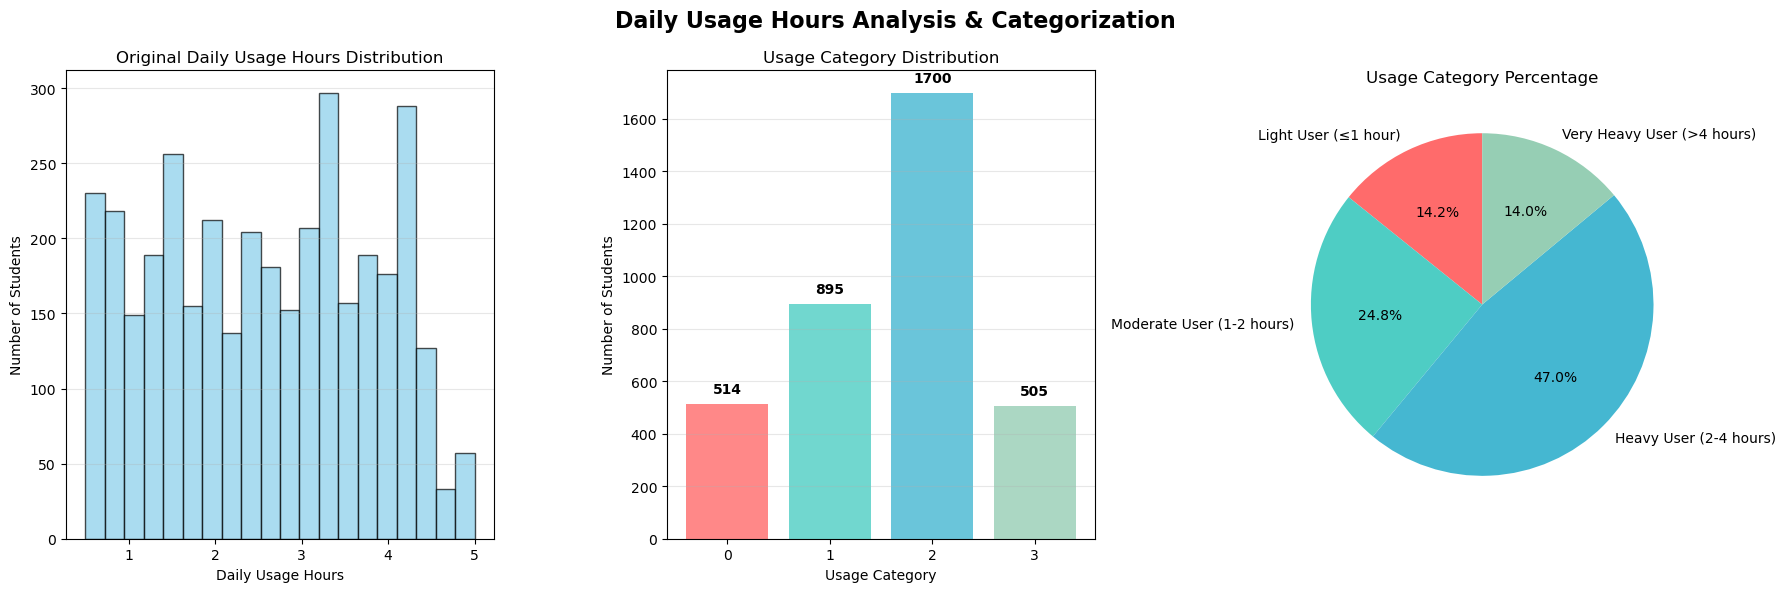


💡 BUSINESS INSIGHTS:
   📊 Most common usage pattern: Heavy User (2-4 hours)
   🎯 Multi-class classification problem with 4 categories
   📈 Useful for user segmentation and targeted strategies
   💼 Important for resource planning and product optimization

🎯 USAGE PATTERN INSIGHTS:
   📊 Light Users (514 students): Casual usage, may need engagement
   📊 Moderate Users (895 students): Regular usage, good retention
   📊 Heavy Users (1700 students): High engagement, valuable segment
   📊 Very Heavy Users (505 students): Power users, advocates


In [62]:
# 📊 DAILY USAGE HOURS DISTRIBUTION ANALYSIS & CATEGORIZATION
print("=" * 80)
print("⏰ DAILY USAGE HOURS CATEGORICAL CLASSIFICATION ANALYSIS")
print("=" * 80)

# Analyze Daily_Usage_Hours distribution
print(f"\n📊 DAILY USAGE HOURS DISTRIBUTION ANALYSIS")
print("-" * 50)
print(f"🎯 Original Variable: Daily_Usage_Hours")
print(f"📋 Data Type: {data['Daily_Usage_Hours'].dtype}")
print(f"📊 Total Samples: {len(data)}")
print(f"❓ Missing Values: {data['Daily_Usage_Hours'].isnull().sum()}")
print(f"🔢 Unique Values: {data['Daily_Usage_Hours'].nunique()}")
print(f"📊 Range: {data['Daily_Usage_Hours'].min()} to {data['Daily_Usage_Hours'].max()}")

# Statistical summary
print(f"\n📈 STATISTICAL SUMMARY:")
print("-" * 30)
print(f"   Mean: {data['Daily_Usage_Hours'].mean():.2f}")
print(f"   Median: {data['Daily_Usage_Hours'].median():.2f}")
print(f"   Std Dev: {data['Daily_Usage_Hours'].std():.2f}")
print(f"   Q1 (25th percentile): {data['Daily_Usage_Hours'].quantile(0.25):.2f}")
print(f"   Q3 (75th percentile): {data['Daily_Usage_Hours'].quantile(0.75):.2f}")

# Value counts
print(f"\n📊 VALUE DISTRIBUTION:")
print("-" * 30)
usage_counts = data['Daily_Usage_Hours'].value_counts().sort_index()
for value, count in usage_counts.items():
    percentage = (count / len(data)) * 100
    print(f"   {value} hours: {count:4d} students ({percentage:5.1f}%)")

# Create meaningful categories based on distribution
print(f"\n🏷️  CREATING USAGE CATEGORIES:")
print("-" * 40)

# Define categories based on common usage patterns
def categorize_usage_hours(hours):
    if hours <= 1:
        return 0  # Light User
    elif hours <= 2:
        return 1  # Moderate User
    elif hours <= 4:
        return 2  # Heavy User
    else:
        return 3  # Very Heavy User

# Apply categorization
data['Daily_Usage_Category'] = data['Daily_Usage_Hours'].apply(categorize_usage_hours)

# Category mapping for interpretation
category_labels = {
    0: 'Light User (≤1 hour)',
    1: 'Moderate User (1-2 hours)',
    2: 'Heavy User (2-4 hours)',
    3: 'Very Heavy User (>4 hours)'
}

print(f"📋 CATEGORY DEFINITIONS:")
for cat, label in category_labels.items():
    print(f"   {cat}: {label}")

# Analyze category distribution
print(f"\n📊 CATEGORY DISTRIBUTION:")
print("-" * 40)
category_counts = data['Daily_Usage_Category'].value_counts().sort_index()
total_samples = len(data)

for cat, count in category_counts.items():
    percentage = (count / total_samples) * 100
    label = category_labels[cat]
    print(f"   {cat} ({label}): {count:4d} students ({percentage:5.1f}%)")

# Calculate class imbalance
print(f"\n⚖️  CLASS BALANCE ANALYSIS:")
minority_class = category_counts.min()
majority_class = category_counts.max()
imbalance_ratio = majority_class / minority_class

print(f"   Minority class: {minority_class} samples")
print(f"   Majority class: {majority_class} samples")
print(f"   Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio <= 2:
    print("   ✅ Classes are reasonably balanced")
elif imbalance_ratio <= 5:
    print("   ⚠️  Moderate class imbalance")
else:
    print("   ❌ Significant class imbalance - consider balancing techniques")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Daily Usage Hours Analysis & Categorization', fontsize=16, fontweight='bold')

# 1. Original distribution histogram
axes[0].hist(data['Daily_Usage_Hours'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Original Daily Usage Hours Distribution')
axes[0].set_xlabel('Daily Usage Hours')
axes[0].set_ylabel('Number of Students')
axes[0].grid(axis='y', alpha=0.3)

# 2. Category distribution bar chart
categories = list(category_labels.keys())
counts = [category_counts[cat] for cat in categories]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = axes[1].bar(categories, counts, color=colors, alpha=0.8)
axes[1].set_title('Usage Category Distribution')
axes[1].set_xlabel('Usage Category')
axes[1].set_ylabel('Number of Students')
axes[1].set_xticks(categories)
axes[1].set_xticklabels([f'{cat}' for cat in categories])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 30,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# 3. Category pie chart
labels = [category_labels[cat] for cat in categories]
axes[2].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Usage Category Percentage')

plt.tight_layout()
plt.show()

print(f"\n💡 BUSINESS INSIGHTS:")
print("=" * 40)
print(f"   📊 Most common usage pattern: {category_labels[category_counts.idxmax()]}")
print(f"   🎯 Multi-class classification problem with {len(categories)} categories")
print(f"   📈 Useful for user segmentation and targeted strategies")
print(f"   💼 Important for resource planning and product optimization")

print(f"\n🎯 USAGE PATTERN INSIGHTS:")
print("=" * 40)
light_users = category_counts[0]
moderate_users = category_counts[1]
heavy_users = category_counts[2]
very_heavy_users = category_counts[3]

print(f"   📊 Light Users ({light_users} students): Casual usage, may need engagement")
print(f"   📊 Moderate Users ({moderate_users} students): Regular usage, good retention")
print(f"   📊 Heavy Users ({heavy_users} students): High engagement, valuable segment")
print(f"   📊 Very Heavy Users ({very_heavy_users} students): Power users, advocates")

In [63]:
# 🔄 DATA SETUP FOR DAILY USAGE HOURS CATEGORICAL CLASSIFICATION
print("=" * 80)
print("🔄 DAILY USAGE HOURS CATEGORICAL CLASSIFICATION DATA SETUP")
print("=" * 80)

# Prepare features and target
usage_target_col = 'Daily_Usage_Category'
usage_feature_cols = [col for col in data.columns if col not in ['Daily_Usage_Hours', 'Daily_Usage_Category']]

X_usage = data[usage_feature_cols].copy()
y_usage = data[usage_target_col].copy()

print(f"🎯 Target Variable: {usage_target_col}")
print(f"📊 Number of Features: {len(usage_feature_cols)}")
print(f"📋 Target Classes: {sorted(y_usage.unique())}")
print(f"📊 Dataset Shape: {X_usage.shape}")

# Check for missing values
usage_missing_features = X_usage.isnull().sum()
if usage_missing_features.sum() > 0:
    print(f"\n⚠️  Missing values found:")
    for col, missing_count in usage_missing_features[usage_missing_features > 0].items():
        print(f"   {col}: {missing_count} missing values")
else:
    print("✅ No missing values in features")

# Display feature columns
print(f"\n📋 FEATURE COLUMNS:")
for i, col in enumerate(usage_feature_cols, 1):
    print(f"   {i:2d}. {col}")

# Display class distribution
print(f"\n📊 CLASS DISTRIBUTION:")
usage_class_dist = y_usage.value_counts().sort_index()
for cls, count in usage_class_dist.items():
    percentage = (count / len(y_usage)) * 100
    label = category_labels[cls]
    print(f"   Class {cls} ({label}): {count:4d} samples ({percentage:5.1f}%)")

# Train-test split with stratification
X_train_usage, X_test_usage, y_train_usage, y_test_usage = train_test_split(
    X_usage, y_usage, test_size=0.2, random_state=42, stratify=y_usage
)

print(f"\n🔄 STRATIFIED TRAIN-TEST SPLIT:")
print(f"   Training set: {len(X_train_usage)} samples")
print(f"   Test set: {len(X_test_usage)} samples")

# Verify stratification
print(f"\n📊 CLASS DISTRIBUTION VERIFICATION:")
usage_train_dist = y_train_usage.value_counts(normalize=True).sort_index()
usage_test_dist = y_test_usage.value_counts(normalize=True).sort_index()
usage_original_dist = y_usage.value_counts(normalize=True).sort_index()

print(f"   Original distribution:")
for cls, prop in usage_original_dist.items():
    label = category_labels[cls]
    print(f"      Class {cls} ({label}): {prop:.3f}")

print(f"   Training set distribution:")
for cls, prop in usage_train_dist.items():
    label = category_labels[cls]
    print(f"      Class {cls} ({label}): {prop:.3f}")

print(f"   Test set distribution:")
for cls, prop in usage_test_dist.items():
    label = category_labels[cls]
    print(f"      Class {cls} ({label}): {prop:.3f}")

print(f"\n✅ Data setup completed for usage category classification!")

🔄 DAILY USAGE HOURS CATEGORICAL CLASSIFICATION DATA SETUP
🎯 Target Variable: Daily_Usage_Category
📊 Number of Features: 28
📋 Target Classes: [0, 1, 2, 3]
📊 Dataset Shape: (3614, 28)
✅ No missing values in features

📋 FEATURE COLUMNS:
    1. Year_of_Study
    2. Trust_in_AI_Tools
    3. Impact_on_Grades
    4. Awareness_Level
    5. uses_coding_help
    6. uses_project_work
    7. uses_exam_preparation
    8. uses_doubt_solving
    9. uses_content_writing
   10. uses_learning_new_topics
   11. ai_tool_bard
   12. ai_tool_chatgpt
   13. ai_tool_claude
   14. ai_tool_copilot
   15. ai_tool_gemini
   16. ai_tool_midjourney
   17. ai_tool_other
   18. preferred_ai_tool_Bard
   19. preferred_ai_tool_ChatGPT
   20. preferred_ai_tool_Claude
   21. preferred_ai_tool_Copilot
   22. preferred_ai_tool_Gemini
   23. preferred_ai_tool_Other
   24. device_used_Tablet
   25. internet_access_High
   26. internet_access_Medium
   27. Do_Professors_Allow_Use_encoded
   28. Willing_to_Pay_for_Access_encod

In [64]:
# 🔧 FEATURE SCALING FOR USAGE HOURS CATEGORICAL CLASSIFICATION
print("=" * 80)
print("🔧 FEATURE SCALING FOR USAGE HOURS CATEGORICAL CLASSIFICATION")
print("=" * 80)

# Identify binary/categorical and continuous features
binary_cols_usage = []
continuous_cols_usage = []

for col in X_train_usage.columns:
    unique_vals = X_train_usage[col].nunique()
    if unique_vals == 2 and set(X_train_usage[col].unique()).issubset({0, 1}):
        binary_cols_usage.append(col)
    elif unique_vals > 2:
        continuous_cols_usage.append(col)

print(f"📊 Binary/One-hot columns: {len(binary_cols_usage)} (no scaling needed)")
print(f"📊 Continuous columns: {len(continuous_cols_usage)} (will be scaled)")

if len(binary_cols_usage) > 0:
    print(f"   Binary columns: {binary_cols_usage}")
if len(continuous_cols_usage) > 0:
    print(f"   Continuous columns: {continuous_cols_usage}")

# Apply selective scaling
X_train_usage_scaled = X_train_usage.copy()
X_test_usage_scaled = X_test_usage.copy()

if len(continuous_cols_usage) > 0:
    print(f"\n🔧 Scaling {len(continuous_cols_usage)} continuous features...")
    
    # Initialize scaler
    usage_scaler = StandardScaler()
    
    # Scale continuous features
    X_train_usage_scaled[continuous_cols_usage] = usage_scaler.fit_transform(X_train_usage[continuous_cols_usage])
    X_test_usage_scaled[continuous_cols_usage] = usage_scaler.transform(X_test_usage[continuous_cols_usage])
    
    print("✅ Selective scaling completed for usage category classification")
    
    # Display scaling statistics
    print(f"\n📊 SCALING STATISTICS:")
    for col in continuous_cols_usage:
        original_mean = X_train_usage[col].mean()
        original_std = X_train_usage[col].std()
        scaled_mean = X_train_usage_scaled[col].mean()
        scaled_std = X_train_usage_scaled[col].std()
        
        print(f"   {col}:")
        print(f"      Original: mean={original_mean:.3f}, std={original_std:.3f}")
        print(f"      Scaled:   mean={scaled_mean:.3f}, std={scaled_std:.3f}")
else:
    print("ℹ️  No continuous features found - no scaling needed")
    usage_scaler = None

print(f"\n✅ Feature scaling completed for usage category classification!")

🔧 FEATURE SCALING FOR USAGE HOURS CATEGORICAL CLASSIFICATION
📊 Binary/One-hot columns: 24 (no scaling needed)
📊 Continuous columns: 4 (will be scaled)
   Binary columns: ['uses_coding_help', 'uses_project_work', 'uses_exam_preparation', 'uses_doubt_solving', 'uses_content_writing', 'uses_learning_new_topics', 'ai_tool_bard', 'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot', 'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other', 'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT', 'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot', 'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other', 'device_used_Tablet', 'internet_access_High', 'internet_access_Medium', 'Do_Professors_Allow_Use_encoded', 'Willing_to_Pay_for_Access_encoded']
   Continuous columns: ['Year_of_Study', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Awareness_Level']

🔧 Scaling 4 continuous features...
✅ Selective scaling completed for usage category classification

📊 SCALING STATISTICS:
   Year_of_Study:
      O

In [65]:
# 🤖 DAILY USAGE HOURS MULTI-CLASS CLASSIFICATION MODELING
print("=" * 80)
print("🤖 DAILY USAGE HOURS MULTI-CLASS CLASSIFICATION MODELING")
print("=" * 80)

# Import additional metrics for multi-class classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Try to import XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("⚠️  XGBoost not available - skipping XGBoost model")

# Define multi-class classification models
usage_models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
        'needs_scaling': True,
        'description': 'One-vs-Rest linear classifier'
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_estimators=100, random_state=42),
        'needs_scaling': False,
        'description': 'Tree-based ensemble classifier'
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'needs_scaling': False,
        'description': 'Boosted tree ensemble'
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'needs_scaling': False,
        'description': 'Single decision tree'
    },
    'Support Vector Machine': {
        'model': SVC(random_state=42, probability=True),
        'needs_scaling': True,
        'description': 'Support vector classifier'
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(n_neighbors=5),
        'needs_scaling': True,
        'description': 'Distance-based classifier'
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'needs_scaling': True,
        'description': 'Probabilistic Naive Bayes'
    }
}

# Add XGBoost if available
if xgb_available:
    usage_models['XGBoost'] = {
        'model': XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'needs_scaling': False,
        'description': 'Gradient boosting framework'
    }

# Train and evaluate models
usage_classification_results = {}

print(f"🚀 Training {len(usage_models)} multi-class classification models...")
print(f"📊 Training samples: {len(X_train_usage_scaled)}")
print(f"📊 Test samples: {len(X_test_usage_scaled)}")
print(f"📊 Number of features: {len(X_train_usage_scaled.columns)}")
print(f"📊 Number of classes: {len(y_usage.unique())}")

for model_name, config in usage_models.items():
    print(f"\n🔄 Training {model_name}...")
    
    # Select appropriate data (scaled or unscaled)
    if config['needs_scaling']:
        X_train_model = X_train_usage_scaled
        X_test_model = X_test_usage_scaled
    else:
        X_train_model = X_train_usage
        X_test_model = X_test_usage
    
    # Train model
    model = config['model']
    model.fit(X_train_model, y_train_usage)
    
    # Make predictions
    y_pred_train = model.predict(X_train_model)
    y_pred_test = model.predict(X_test_model)
    
    # Calculate probabilities for multiclass
    try:
        y_pred_proba = model.predict_proba(X_test_model)
    except:
        y_pred_proba = None
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train_usage, y_pred_train)
    test_accuracy = accuracy_score(y_test_usage, y_pred_test)
    
    # Multi-class specific metrics
    precision = precision_score(y_test_usage, y_pred_test, average='weighted')
    recall = recall_score(y_test_usage, y_pred_test, average='weighted')
    f1 = f1_score(y_test_usage, y_pred_test, average='weighted')
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_model, y_train_usage, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Calculate overfitting metric
    overfitting = train_accuracy - test_accuracy
    
    # Store results
    usage_classification_results[model_name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'overfitting': overfitting,
        'predictions': y_pred_test,
        'probabilities': y_pred_proba,
        'description': config['description']
    }
    
    # Display results
    print(f"   📊 Train Accuracy: {train_accuracy:.4f}")
    print(f"   📊 Test Accuracy: {test_accuracy:.4f}")
    print(f"   📊 Precision: {precision:.4f}")
    print(f"   📊 Recall: {recall:.4f}")
    print(f"   📊 F1 Score: {f1:.4f}")
    print(f"   📊 CV Mean: {cv_mean:.4f} (±{cv_std:.4f})")
    print(f"   📊 Overfitting: {overfitting:.4f}")

# Sort models by F1 score
usage_sorted_models = sorted(usage_classification_results.items(), 
                           key=lambda x: x[1]['f1_score'], reverse=True)

print(f"\n🏆 MODEL RANKING (by F1 Score):")
print("=" * 60)
for i, (model_name, metrics) in enumerate(usage_sorted_models, 1):
    print(f"{i:2d}. {model_name:20s} | F1: {metrics['f1_score']:.4f} | "
          f"Acc: {metrics['test_accuracy']:.4f} | "
          f"CV: {metrics['cv_mean']:.4f}")

print(f"\n✅ Daily usage hours categorical classification modeling completed!")
print(f"🏆 Best model: {usage_sorted_models[0][0]} with F1 score: {usage_sorted_models[0][1]['f1_score']:.4f}")

# Display detailed classification report for best model
if usage_sorted_models:
    best_model_name, best_metrics = usage_sorted_models[0]
    print(f"\n📊 DETAILED CLASSIFICATION REPORT - {best_model_name}:")
    print("=" * 70)
    
    # Create classification report
    class_report = classification_report(
        y_test_usage, 
        best_metrics['predictions'], 
        target_names=[category_labels[i] for i in sorted(category_labels.keys())],
        output_dict=True
    )
    
    # Display per-class metrics
    for i, class_name in enumerate([category_labels[i] for i in sorted(category_labels.keys())]):
        metrics = class_report[class_name]
        print(f"   {class_name}:")
        print(f"      Precision: {metrics['precision']:.3f}")
        print(f"      Recall: {metrics['recall']:.3f}")
        print(f"      F1-Score: {metrics['f1-score']:.3f}")
        print(f"      Support: {int(metrics['support'])}")
    
    # Overall metrics
    print(f"\n   Overall Metrics:")
    print(f"      Accuracy: {class_report['accuracy']:.3f}")
    print(f"      Macro Avg F1: {class_report['macro avg']['f1-score']:.3f}")
    print(f"      Weighted Avg F1: {class_report['weighted avg']['f1-score']:.3f}")

🤖 DAILY USAGE HOURS MULTI-CLASS CLASSIFICATION MODELING
🚀 Training 8 multi-class classification models...
📊 Training samples: 2891
📊 Test samples: 723
📊 Number of features: 28
📊 Number of classes: 4

🔄 Training Logistic Regression...
   📊 Train Accuracy: 0.4708
   📊 Test Accuracy: 0.4716
   📊 Precision: 0.3180
   📊 Recall: 0.4716
   📊 F1 Score: 0.3470
   📊 CV Mean: 0.4594 (±0.0158)
   📊 Overfitting: -0.0009

🔄 Training Random Forest...
   📊 Train Accuracy: 1.0000
   📊 Test Accuracy: 0.7538
   📊 Precision: 0.7895
   📊 Recall: 0.7538
   📊 F1 Score: 0.7423
   📊 CV Mean: 0.6921 (±0.0186)
   📊 Overfitting: 0.2462

🔄 Training Gradient Boosting...
   📊 Train Accuracy: 0.6202
   📊 Test Accuracy: 0.5629
   📊 Precision: 0.5946
   📊 Recall: 0.5629
   📊 F1 Score: 0.5163
   📊 CV Mean: 0.5254 (±0.0061)
   📊 Overfitting: 0.0573

🔄 Training Decision Tree...
   📊 Train Accuracy: 1.0000
   📊 Test Accuracy: 0.7095
   📊 Precision: 0.7088
   📊 Recall: 0.7095
   📊 F1 Score: 0.7088
   📊 CV Mean: 0.6358 (±0.0

🔍 DAILY USAGE HOURS CLASSIFICATION FEATURE IMPORTANCE ANALYSIS
🏆 Analyzing feature importance for best model: Random Forest

📊 TOP 15 MOST IMPORTANT FEATURES (Tree-based Feature Importance):
------------------------------------------------------------
 1. Awareness_Level                     | 0.1295
 2. Impact_on_Grades                    | 0.1260
 3. Trust_in_AI_Tools                   | 0.0954
 4. Year_of_Study                       | 0.0862
 5. Do_Professors_Allow_Use_encoded     | 0.0438
 6. device_used_Tablet                  | 0.0395
 7. ai_tool_chatgpt                     | 0.0339
 8. ai_tool_copilot                     | 0.0314
 9. Willing_to_Pay_for_Access_encoded   | 0.0310
10. ai_tool_gemini                      | 0.0296
11. internet_access_Medium              | 0.0284
12. internet_access_High                | 0.0278
13. uses_coding_help                    | 0.0273
14. preferred_ai_tool_Copilot           | 0.0260
15. uses_content_writing                | 0.0256


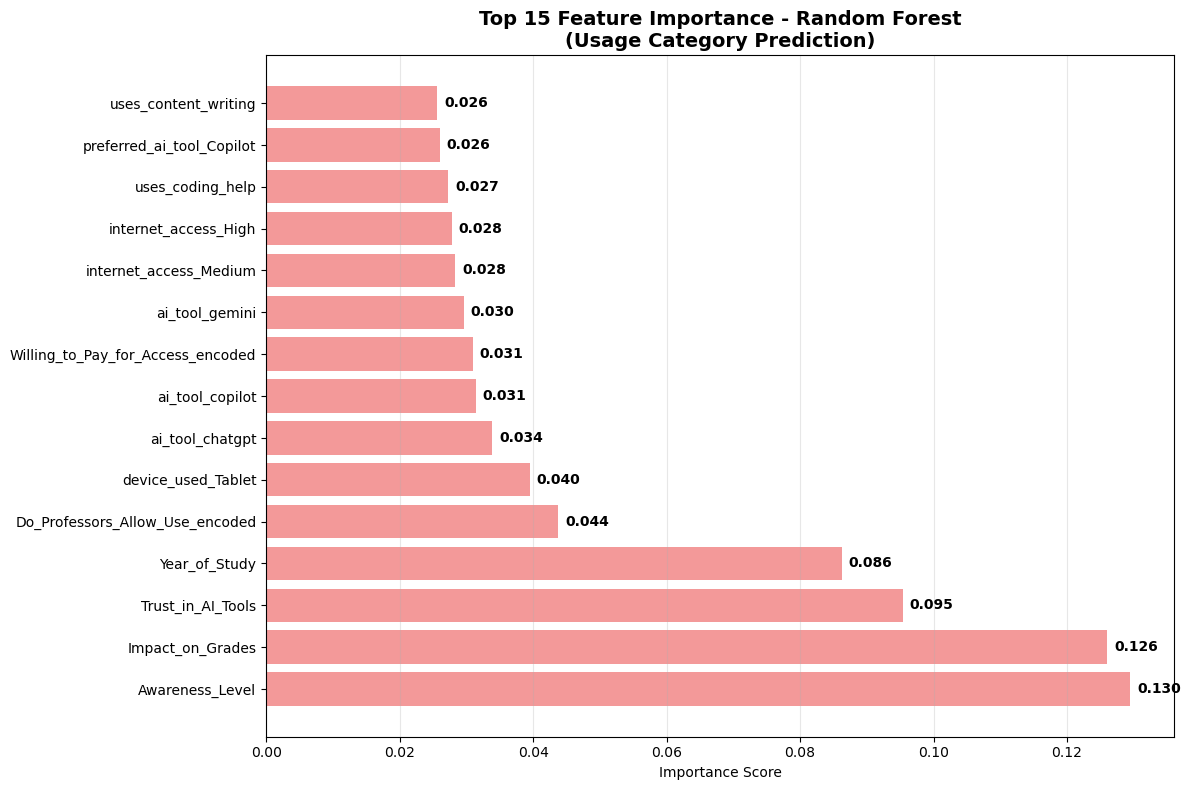


💡 BUSINESS INTERPRETATION OF TOP FEATURES:

1. Awareness_Level (Importance: 0.1295)
   💡 Higher awareness leads to more intensive usage

2. Impact_on_Grades (Importance: 0.1260)
   💡 Perceived academic benefit drives usage patterns

3. Trust_in_AI_Tools (Importance: 0.0954)
   💡 Trust level strongly influences usage intensity

4. Year_of_Study (Importance: 0.0862)
   💡 Academic level influences usage patterns

5. Do_Professors_Allow_Use_encoded (Importance: 0.0438)
   💡 Institutional permission affects usage intensity

📈 USAGE PATTERN INSIGHTS:
🎯 Key findings for usage segmentation:
   📊 Trust and perceived value drive usage intensity
   🎯 Academic level and context influence patterns
   📈 Tool preferences and use cases matter
   💡 Infrastructure and institutional factors play a role

🔍 ACTIONABLE RECOMMENDATIONS:
📊 To increase usage intensity:
   🎯 Build trust through reliability and transparency
   📈 Demonstrate clear academic benefits
   💡 Improve tool variety and quality
   🔍 Addr

In [66]:
# 🔍 DAILY USAGE HOURS CLASSIFICATION FEATURE IMPORTANCE ANALYSIS
print("=" * 80)
print("🔍 DAILY USAGE HOURS CLASSIFICATION FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

if usage_classification_results and usage_sorted_models:
    # Get the best model for feature importance
    best_model_name, best_metrics = usage_sorted_models[0]
    best_model = best_metrics['model']
    
    print(f"🏆 Analyzing feature importance for best model: {best_model_name}")
    
    # Get feature names
    feature_names = X_train_usage.columns.tolist()
    
    # Extract feature importance based on model type
    if hasattr(best_model, 'feature_importances_'):
        # Tree-based models
        importances = best_model.feature_importances_
        importance_type = "Tree-based Feature Importance"
    elif hasattr(best_model, 'coef_'):
        # Linear models (for multi-class, take mean of absolute coefficients)
        if len(best_model.coef_.shape) > 1:
            importances = np.mean(np.abs(best_model.coef_), axis=0)
        else:
            importances = np.abs(best_model.coef_)
        importance_type = "Coefficient Magnitude (Average)"
    else:
        print("⚠️  Selected model doesn't support feature importance analysis")
        importances = None
        importance_type = None
    
    if importances is not None:
        # Create feature importance dataframe
        usage_feature_imp_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print(f"\n📊 TOP 15 MOST IMPORTANT FEATURES ({importance_type}):")
        print("-" * 60)
        for i, (_, row) in enumerate(usage_feature_imp_df.head(15).iterrows(), 1):
            print(f"{i:2d}. {row['feature']:35s} | {row['importance']:.4f}")
        
        # Visualize feature importance
        plt.figure(figsize=(12, 8))
        top_features = usage_feature_imp_df.head(15)
        
        bars = plt.barh(range(len(top_features)), top_features['importance'], 
                       color='lightcoral', alpha=0.8)
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Importance Score')
        plt.title(f'Top 15 Feature Importance - {best_model_name}\n(Usage Category Prediction)', 
                 fontsize=14, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
            width = bar.get_width()
            plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                    f'{importance:.3f}', ha='left', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Business interpretation of top features
        print(f"\n💡 BUSINESS INTERPRETATION OF TOP FEATURES:")
        print("=" * 60)
        
        top_5_features = usage_feature_imp_df.head(5)
        for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
            feature = row['feature']
            importance = row['importance']
            
            print(f"\n{i}. {feature} (Importance: {importance:.4f})")
            
            # Provide business context for common features
            if 'Trust_in_AI_Tools' in feature:
                print("   💡 Trust level strongly influences usage intensity")
            elif 'Impact_on_Grades' in feature:
                print("   💡 Perceived academic benefit drives usage patterns")
            elif 'Awareness_Level' in feature:
                print("   💡 Higher awareness leads to more intensive usage")
            elif 'ai_tool_' in feature:
                print("   💡 Specific AI tool usage affects overall usage patterns")
            elif 'preferred_ai_tool_' in feature:
                print("   💡 Tool preferences influence usage intensity")
            elif 'uses_' in feature:
                print("   💡 Specific use cases drive usage behavior")
            elif 'Year_of_Study' in feature:
                print("   💡 Academic level influences usage patterns")
            elif 'internet_access' in feature:
                print("   💡 Internet quality affects usage capability")
            elif 'device_used' in feature:
                print("   💡 Device type influences usage patterns")
            elif 'Do_Professors_Allow_Use' in feature:
                print("   💡 Institutional permission affects usage intensity")
            elif 'Willing_to_Pay' in feature:
                print("   💡 Payment willingness correlates with usage intensity")
            else:
                print("   💡 This feature significantly impacts usage patterns")
        
        print(f"\n📈 USAGE PATTERN INSIGHTS:")
        print("=" * 40)
        print("🎯 Key findings for usage segmentation:")
        print("   📊 Trust and perceived value drive usage intensity")
        print("   🎯 Academic level and context influence patterns")
        print("   📈 Tool preferences and use cases matter")
        print("   💡 Infrastructure and institutional factors play a role")
        
        print(f"\n🔍 ACTIONABLE RECOMMENDATIONS:")
        print("=" * 40)
        print("📊 To increase usage intensity:")
        print("   🎯 Build trust through reliability and transparency")
        print("   📈 Demonstrate clear academic benefits")
        print("   💡 Improve tool variety and quality")
        print("   🔍 Address infrastructure and access barriers")
        print("   💼 Work with institutions to encourage usage")
        
        # Category-specific insights
        print(f"\n🎯 CATEGORY-SPECIFIC STRATEGIES:")
        print("=" * 40)
        
        # Analyze feature importance for different usage categories
        if hasattr(best_model, 'feature_importances_'):
            print("📊 Focus areas for each usage category:")
            print("   Light Users → Moderate: Focus on trust-building and value demonstration")
            print("   Moderate → Heavy: Expand use cases and improve tool variety")
            print("   Heavy → Very Heavy: Advanced features and institutional support")
        
    else:
        print("⚠️  Could not extract feature importance from the best model")
        
else:
    print("❌ Cannot perform feature importance analysis: Missing classification results")

print(f"\n✅ Daily usage hours categorical classification analysis completed!")

📊 DAILY USAGE HOURS CLASSIFICATION VISUALIZATION & ANALYSIS


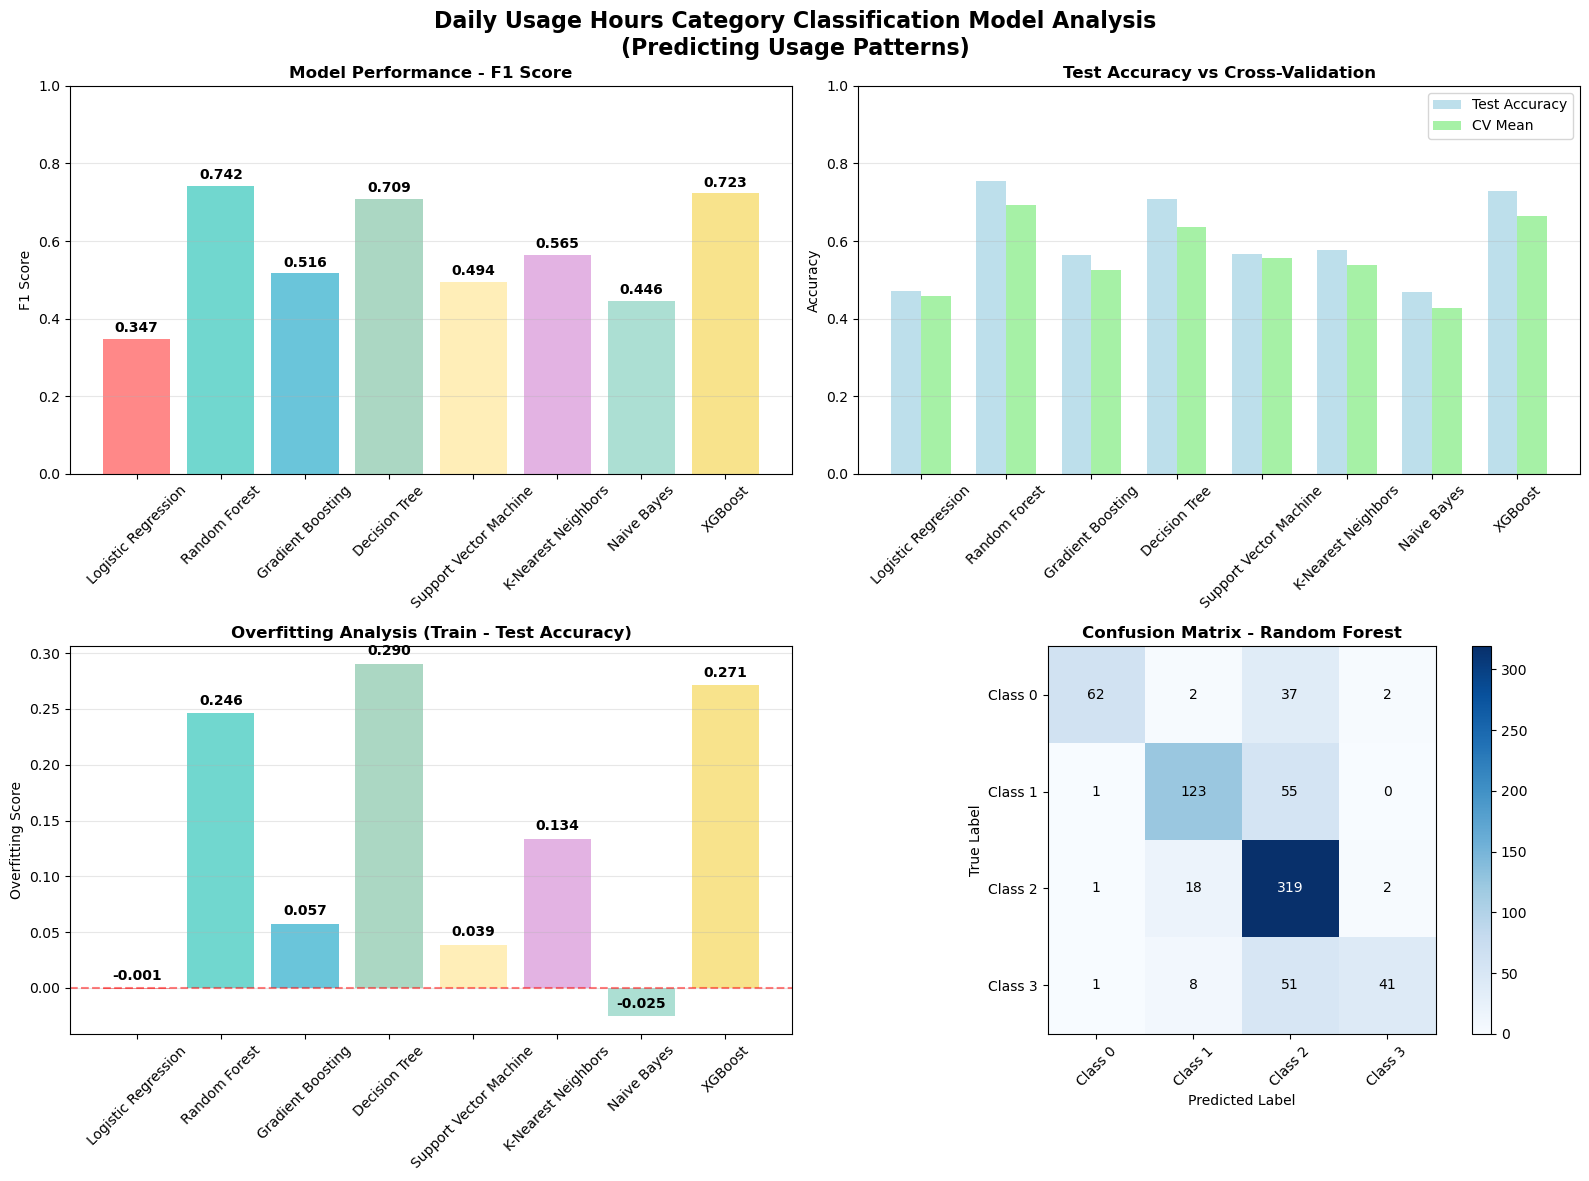


💡 DAILY USAGE HOURS CLASSIFICATION INSIGHTS
🏆 BEST MODEL: Random Forest
   📊 F1 Score: 0.7423
   📊 Test Accuracy: 0.7538
   📊 Cross-Validation: 0.6921 (±0.0186)
   📊 Overfitting: 0.2462

🔍 PER-CLASS PERFORMANCE ANALYSIS:
   Class 0 (Light User (≤1 hour)):
      Precision: 0.954
      Recall: 0.602
      True Positives: 62
      False Positives: 3
      False Negatives: 41
   Class 1 (Moderate User (1-2 hours)):
      Precision: 0.815
      Recall: 0.687
      True Positives: 123
      False Positives: 28
      False Negatives: 56
   Class 2 (Heavy User (2-4 hours)):
      Precision: 0.690
      Recall: 0.938
      True Positives: 319
      False Positives: 143
      False Negatives: 21
   Class 3 (Very Heavy User (>4 hours)):
      Precision: 0.911
      Recall: 0.406
      True Positives: 41
      False Positives: 4
      False Negatives: 60

📊 USAGE PATTERN INSIGHTS:
   🎯 This model predicts student usage intensity categories
   📈 Multi-class classification with 4 usage levels
   💼 

In [67]:
# 📊 DAILY USAGE HOURS CLASSIFICATION VISUALIZATION & ANALYSIS
print("=" * 80)
print("📊 DAILY USAGE HOURS CLASSIFICATION VISUALIZATION & ANALYSIS")
print("=" * 80)

if usage_classification_results:
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Daily Usage Hours Category Classification Model Analysis\n(Predicting Usage Patterns)', 
                 fontsize=16, fontweight='bold')
    
    # Extract model names and metrics
    model_names = list(usage_classification_results.keys())
    f1_scores = [usage_classification_results[name]['f1_score'] for name in model_names]
    test_accuracies = [usage_classification_results[name]['test_accuracy'] for name in model_names]
    cv_means = [usage_classification_results[name]['cv_mean'] for name in model_names]
    overfitting_scores = [usage_classification_results[name]['overfitting'] for name in model_names]
    
    # Color scheme
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']
    
    # 1. F1 Score comparison
    bars1 = axes[0, 0].bar(model_names, f1_scores, color=colors[:len(model_names)], alpha=0.8)
    axes[0, 0].set_title('Model Performance - F1 Score', fontweight='bold')
    axes[0, 0].set_ylabel('F1 Score')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, score in zip(bars1, f1_scores):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Test Accuracy vs Cross-Validation Score
    x_pos = np.arange(len(model_names))
    width = 0.35
    
    bars2_test = axes[0, 1].bar(x_pos - width/2, test_accuracies, width, 
                               label='Test Accuracy', color='lightblue', alpha=0.8)
    bars2_cv = axes[0, 1].bar(x_pos + width/2, cv_means, width, 
                             label='CV Mean', color='lightgreen', alpha=0.8)
    
    axes[0, 1].set_title('Test Accuracy vs Cross-Validation', fontweight='bold')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels(model_names, rotation=45)
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # 3. Overfitting Analysis
    bars3 = axes[1, 0].bar(model_names, overfitting_scores, color=colors[:len(model_names)], alpha=0.8)
    axes[1, 0].set_title('Overfitting Analysis (Train - Test Accuracy)', fontweight='bold')
    axes[1, 0].set_ylabel('Overfitting Score')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    # Add value labels
    for bar, score in zip(bars3, overfitting_scores):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Confusion Matrix for best model
    if usage_sorted_models:
        best_model_name, best_metrics = usage_sorted_models[0]
        if best_metrics['predictions'] is not None:
            cm = confusion_matrix(y_test_usage, best_metrics['predictions'])
            
            # Create heatmap
            im = axes[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            axes[1, 1].set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
            
            # Add labels
            class_names = [category_labels[i] for i in sorted(category_labels.keys())]
            tick_marks = np.arange(len(class_names))
            axes[1, 1].set_xticks(tick_marks)
            axes[1, 1].set_yticks(tick_marks)
            axes[1, 1].set_xticklabels([f'Class {i}' for i in range(len(class_names))], rotation=45)
            axes[1, 1].set_yticklabels([f'Class {i}' for i in range(len(class_names))])
            
            # Add text annotations
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    axes[1, 1].text(j, i, format(cm[i, j], 'd'),
                                   ha="center", va="center",
                                   color="white" if cm[i, j] > thresh else "black")
            
            axes[1, 1].set_ylabel('True Label')
            axes[1, 1].set_xlabel('Predicted Label')
            
            # Add colorbar
            plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    # Business insights and interpretation
    print("\n" + "=" * 80)
    print("💡 DAILY USAGE HOURS CLASSIFICATION INSIGHTS")
    print("=" * 80)
    
    if usage_sorted_models:
        best_model_name, best_metrics = usage_sorted_models[0]
        
        print(f"🏆 BEST MODEL: {best_model_name}")
        print(f"   📊 F1 Score: {best_metrics['f1_score']:.4f}")
        print(f"   📊 Test Accuracy: {best_metrics['test_accuracy']:.4f}")
        print(f"   📊 Cross-Validation: {best_metrics['cv_mean']:.4f} (±{best_metrics['cv_std']:.4f})")
        print(f"   📊 Overfitting: {best_metrics['overfitting']:.4f}")
        
        # Analyze confusion matrix
        if best_metrics['predictions'] is not None:
            cm = confusion_matrix(y_test_usage, best_metrics['predictions'])
            
            print(f"\n🔍 PER-CLASS PERFORMANCE ANALYSIS:")
            for i, class_name in enumerate([category_labels[j] for j in sorted(category_labels.keys())]):
                tp = cm[i, i]  # True positives
                fp = cm[:, i].sum() - tp  # False positives
                fn = cm[i, :].sum() - tp  # False negatives
                tn = cm.sum() - tp - fp - fn  # True negatives
                
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                
                print(f"   Class {i} ({class_name}):")
                print(f"      Precision: {precision:.3f}")
                print(f"      Recall: {recall:.3f}")
                print(f"      True Positives: {tp}")
                print(f"      False Positives: {fp}")
                print(f"      False Negatives: {fn}")
    
    print(f"\n📊 USAGE PATTERN INSIGHTS:")
    print("=" * 50)
    print(f"   🎯 This model predicts student usage intensity categories")
    print(f"   📈 Multi-class classification with {len(category_labels)} usage levels")
    print(f"   💼 Critical for user segmentation and resource planning")
    print(f"   🔍 Helps identify factors that drive usage patterns")
    
    print(f"\n🚀 BUSINESS APPLICATIONS:")
    print("=" * 40)
    print(f"   📊 User Segmentation: Identify and target different usage groups")
    print(f"   🎯 Resource Planning: Allocate resources based on usage patterns")
    print(f"   📈 Engagement Strategies: Develop targeted engagement campaigns")
    print(f"   💡 Product Development: Features for different usage levels")
    print(f"   🔍 Churn Prevention: Identify users at risk of reduced usage")
    print(f"   💰 Pricing Strategy: Usage-based pricing models")
    
    print(f"\n🎯 USAGE CATEGORY STRATEGIES:")
    print("=" * 50)
    print(f"   📊 Light Users: Focus on onboarding and engagement")
    print(f"   📊 Moderate Users: Retention and value demonstration")
    print(f"   📊 Heavy Users: Upselling and loyalty programs")
    print(f"   📊 Very Heavy Users: Advocacy and advanced features")
    
else:
    print("❌ Cannot create visualization: Missing classification results")

# Impact_on_Grades

This section demonstrates how to use `Impact_on_Grades` as a target variable for regression modeling. This numeric column represents the perceived impact of AI tools on student grades and can be predicted using other features in the dataset.

## Regression

=== IMPACT_ON_GRADES COLUMN ANALYSIS ===

📈 Basic Statistics:
   Range: -5.0 to 5.0
   Mean: 0.00
   Median: 0.00
   Standard Deviation: 2.37
   Data Type: int64

📊 Value Distribution:
    -5:   84 samples (  2.3%)
    -4:  110 samples (  3.0%)
    -3:  463 samples ( 12.8%)
    -2:  445 samples ( 12.3%)
    -1:  446 samples ( 12.3%)
     0:  465 samples ( 12.9%)
     1:  477 samples ( 13.2%)
     2:  523 samples ( 14.5%)
     3:  419 samples ( 11.6%)
     4:   93 samples (  2.6%)
     5:   89 samples (  2.5%)

🔍 Data Quality:
   Missing values: 0
   Unique values: 11


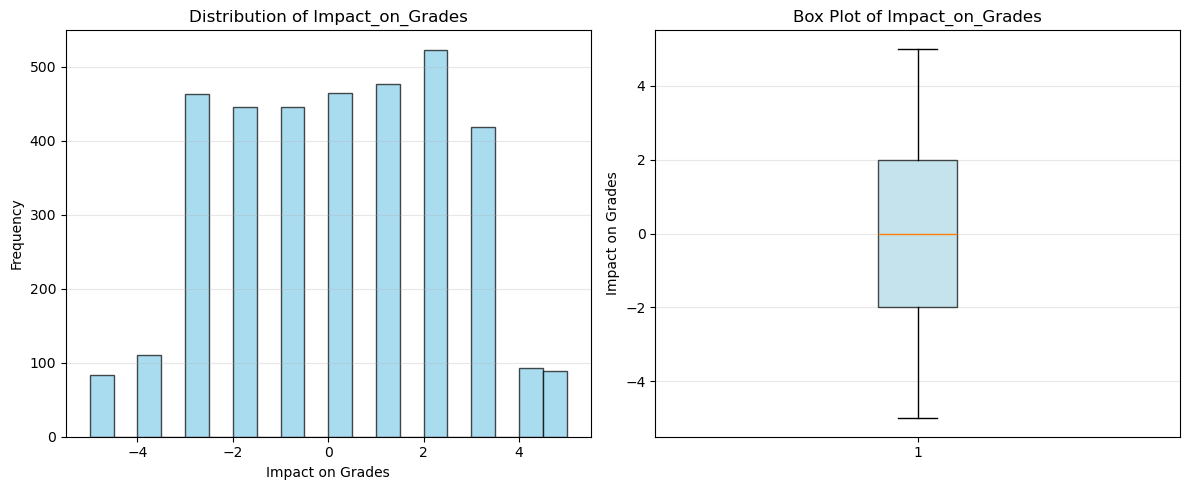


🎯 INTERPRETATION:
   • Negative values indicate perceived negative impact on grades
   • Positive values indicate perceived positive impact on grades
   • Zero values indicate no perceived impact on grades
   • Scale appears to be: -5 (very negative) to 5 (very positive)
   • Average impact: 0.00 (positive)


In [68]:
# 📊 EXPLORING IMPACT_ON_GRADES COLUMN
def explore_impact_on_grades(data):
    """
    Explore the Impact_on_Grades column for regression modeling
    """
    print("=== IMPACT_ON_GRADES COLUMN ANALYSIS ===\n")
    
    # Basic statistics
    impact_col = data['Impact_on_Grades']
    
    print("📈 Basic Statistics:")
    print(f"   Range: {impact_col.min():.1f} to {impact_col.max():.1f}")
    print(f"   Mean: {impact_col.mean():.2f}")
    print(f"   Median: {impact_col.median():.2f}")
    print(f"   Standard Deviation: {impact_col.std():.2f}")
    print(f"   Data Type: {impact_col.dtype}")
    
    # Value distribution
    print(f"\n📊 Value Distribution:")
    value_counts = impact_col.value_counts().sort_index()
    for value, count in value_counts.items():
        percentage = (count / len(impact_col)) * 100
        print(f"   {value:3.0f}: {count:4d} samples ({percentage:5.1f}%)")
    
    # Check for missing values
    missing_count = impact_col.isnull().sum()
    print(f"\n🔍 Data Quality:")
    print(f"   Missing values: {missing_count}")
    print(f"   Unique values: {impact_col.nunique()}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    plt.hist(impact_col, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Impact on Grades')
    plt.ylabel('Frequency')
    plt.title('Distribution of Impact_on_Grades')
    plt.grid(axis='y', alpha=0.3)
    
    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(impact_col, vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
    plt.ylabel('Impact on Grades')
    plt.title('Box Plot of Impact_on_Grades')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print(f"\n🎯 INTERPRETATION:")
    if impact_col.min() < 0:
        print("   • Negative values indicate perceived negative impact on grades")
    if impact_col.max() > 0:
        print("   • Positive values indicate perceived positive impact on grades")
    if 0 in impact_col.values:
        print("   • Zero values indicate no perceived impact on grades")
    
    print(f"   • Scale appears to be: {impact_col.min():.0f} (very negative) to {impact_col.max():.0f} (very positive)")
    print(f"   • Average impact: {impact_col.mean():.2f} ({'positive' if impact_col.mean() > 0 else 'negative' if impact_col.mean() < 0 else 'neutral'})")
    
    return impact_col

# Explore Impact_on_Grades column
impact_analysis = explore_impact_on_grades(data)

In [69]:
# 🎯 SETUP IMPACT_ON_GRADES AS TARGET VARIABLE
def setup_impact_grades_modeling(data):
    """
    Set up Impact_on_Grades as target variable for regression modeling
    """
    print("=== SETTING UP IMPACT_ON_GRADES MODELING ===\n")
    
    # Define target and predictors
    target_column = 'Impact_on_Grades'
    
    # Remove the target from features, also remove Daily_Usage_Hours to avoid data leakage
    exclude_columns = [target_column, 'Daily_Usage_Hours']
    
    X_impact = data.drop(columns=exclude_columns)
    y_impact = data[target_column]
    
    print(f"🎯 Target Variable: {target_column}")
    print(f"📊 Target Range: {y_impact.min():.1f} to {y_impact.max():.1f}")
    print(f"📊 Target Mean: {y_impact.mean():.2f}")
    print(f"📊 Number of Predictors: {len(X_impact.columns)}")
    print(f"📊 Dataset Shape: {data.shape}")
    
    # Check for any remaining issues
    print(f"\n🔍 Data Quality Check:")
    print(f"   Missing values in target: {y_impact.isnull().sum()}")
    print(f"   Missing values in predictors: {X_impact.isnull().sum().sum()}")
    
    # Split the data
    X_train_impact, X_test_impact, y_train_impact, y_test_impact = train_test_split(
        X_impact, y_impact, 
        test_size=0.2, 
        random_state=42
    )
    
    print(f"\n📊 Data Split:")
    print(f"   Training set: {X_train_impact.shape[0]} samples")
    print(f"   Test set: {X_test_impact.shape[0]} samples")
    print(f"   Training target range: {y_train_impact.min():.1f} to {y_train_impact.max():.1f}")
    print(f"   Test target range: {y_test_impact.min():.1f} to {y_test_impact.max():.1f}")
    
    return X_impact, y_impact, X_train_impact, X_test_impact, y_train_impact, y_test_impact

# Set up Impact_on_Grades modeling
X_impact, y_impact, X_train_impact, X_test_impact, y_train_impact, y_test_impact = setup_impact_grades_modeling(data)

=== SETTING UP IMPACT_ON_GRADES MODELING ===

🎯 Target Variable: Impact_on_Grades
📊 Target Range: -5.0 to 5.0
📊 Target Mean: 0.00
📊 Number of Predictors: 28
📊 Dataset Shape: (3614, 30)

🔍 Data Quality Check:
   Missing values in target: 0
   Missing values in predictors: 0

📊 Data Split:
   Training set: 2891 samples
   Test set: 723 samples
   Training target range: -5.0 to 5.0
   Test target range: -5.0 to 5.0


In [70]:
# 🔧 FEATURE SCALING FOR IMPACT_ON_GRADES
def prepare_impact_grades_features(X_train_impact, X_test_impact):
    """
    Prepare features for Impact_on_Grades modeling with appropriate scaling
    """
    print("=== FEATURE SCALING FOR IMPACT_ON_GRADES ===\n")
    
    # Identify binary and continuous columns (same logic as before)
    binary_columns_impact = []
    continuous_columns_impact = []
    
    for col in X_train_impact.columns:
        unique_vals = sorted(X_train_impact[col].unique())
        
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            binary_columns_impact.append(col)
        elif len(unique_vals) > 2:
            continuous_columns_impact.append(col)
    
    print(f"📊 Binary/One-hot columns: {len(binary_columns_impact)} (no scaling needed)")
    print(f"📊 Continuous columns: {len(continuous_columns_impact)} (will be scaled)")
    
    # Apply selective scaling
    if continuous_columns_impact:
        print(f"\n🔧 Scaling {len(continuous_columns_impact)} continuous features...")
        
        X_train_impact_scaled = X_train_impact.copy()
        X_test_impact_scaled = X_test_impact.copy()
        
        # Scale only continuous columns
        impact_scaler = StandardScaler()
        X_train_impact_scaled[continuous_columns_impact] = impact_scaler.fit_transform(X_train_impact[continuous_columns_impact])
        X_test_impact_scaled[continuous_columns_impact] = impact_scaler.transform(X_test_impact[continuous_columns_impact])
        
        print("✅ Selective scaling completed for Impact_on_Grades modeling")
        
        return X_train_impact_scaled, X_test_impact_scaled, impact_scaler, binary_columns_impact, continuous_columns_impact
    else:
        print("✅ No continuous features found - no scaling needed")
        return X_train_impact.copy(), X_test_impact.copy(), None, binary_columns_impact, continuous_columns_impact

# Prepare features for Impact_on_Grades modeling
X_train_impact_scaled, X_test_impact_scaled, impact_scaler, binary_cols_impact, continuous_cols_impact = prepare_impact_grades_features(X_train_impact, X_test_impact)

=== FEATURE SCALING FOR IMPACT_ON_GRADES ===

📊 Binary/One-hot columns: 24 (no scaling needed)
📊 Continuous columns: 4 (will be scaled)

🔧 Scaling 4 continuous features...
✅ Selective scaling completed for Impact_on_Grades modeling


In [71]:
# 🤖 COMPREHENSIVE REGRESSION MODELING FOR IMPACT_ON_GRADES
def train_impact_grades_models(X_train_impact, X_test_impact, y_train_impact, y_test_impact,
                              X_train_impact_scaled, X_test_impact_scaled):
    """
    Train comprehensive regression models for Impact_on_Grades prediction
    """
    print("=== TRAINING MODELS FOR IMPACT_ON_GRADES PREDICTION ===\n")
    
    # Define models with their scaling requirements
    models_config = {
        'Linear Regression': {
            'model': LinearRegression(),
            'needs_scaling': True,
            'description': 'Basic linear regression'
        },
        'Ridge Regression': {
            'model': Ridge(alpha=1.0),
            'needs_scaling': True,
            'description': 'L2 regularized linear regression'
        },
        'Lasso Regression': {
            'model': Lasso(alpha=1.0),
            'needs_scaling': True,
            'description': 'L1 regularized linear regression'
        },
        'ElasticNet': {
            'model': ElasticNet(alpha=1.0, l1_ratio=0.5),
            'needs_scaling': True,
            'description': 'L1 + L2 regularized linear regression'
        },
        'Random Forest': {
            'model': RandomForestRegressor(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'description': 'Tree-based ensemble model'
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'needs_scaling': False,
            'description': 'Boosted tree ensemble'
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'needs_scaling': False,
            'description': 'Single decision tree'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsRegressor(n_neighbors=5, n_jobs=1),  # Set n_jobs=1 to avoid parallel processing
            'needs_scaling': True,
            'description': 'Distance-based regression'
        },
        'Support Vector Regression': {
            'model': SVR(kernel='rbf'),
            'needs_scaling': True,
            'description': 'SVM-based regression'
        }
    }
    
    results = {}
    
    for model_name, config in models_config.items():
        print(f"🔧 Training {model_name}...")
        print(f"   Description: {config['description']}")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_impact_scaled, X_test_impact_scaled
        else:
            X_tr, X_te = X_train_impact, X_test_impact
        
        # Train model
        model = config['model']
        model.fit(X_tr, y_train_impact)
        
        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)
        
        # Metrics
        train_r2 = r2_score(y_train_impact, y_pred_train)
        test_r2 = r2_score(y_test_impact, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test_impact, y_pred_test))
        test_mae = mean_absolute_error(y_test_impact, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_tr, y_train_impact, cv=5, scoring='r2')
        
        # Calculate overfitting measure
        overfitting = train_r2 - test_r2
        
        results[model_name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'overfitting': overfitting,
            'used_scaling': config['needs_scaling'],
            'predictions': y_pred_test
        }
        
        print(f"   Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print()
    
    return results

# Train models for Impact_on_Grades prediction
impact_results = train_impact_grades_models(X_train_impact, X_test_impact, y_train_impact, y_test_impact,
                                           X_train_impact_scaled, X_test_impact_scaled)

=== TRAINING MODELS FOR IMPACT_ON_GRADES PREDICTION ===

🔧 Training Linear Regression...
   Description: Basic linear regression
   Scaling: Yes
   Test R²: 0.0231 | RMSE: 2.3328

🔧 Training Ridge Regression...
   Description: L2 regularized linear regression
   Scaling: Yes
   Test R²: 0.0229 | RMSE: 2.3330

🔧 Training Lasso Regression...
   Description: L1 regularized linear regression
   Scaling: Yes
   Test R²: -0.0023 | RMSE: 2.3630

🔧 Training ElasticNet...
   Description: L1 + L2 regularized linear regression
   Scaling: Yes
   Test R²: -0.0023 | RMSE: 2.3630

🔧 Training Random Forest...
   Description: Tree-based ensemble model
   Scaling: No
   Test R²: 0.3210 | RMSE: 1.9448

🔧 Training Gradient Boosting...
   Description: Boosted tree ensemble
   Scaling: No
   Test R²: 0.0771 | RMSE: 2.2674

🔧 Training Decision Tree...
   Description: Single decision tree
   Scaling: No
   Test R²: -0.1945 | RMSE: 2.5796

🔧 Training K-Nearest Neighbors...
   Description: Distance-based regre

In [72]:
# impact_results

=== IMPACT_ON_GRADES MODEL PERFORMANCE ANALYSIS ===

🏆 MODEL PERFORMANCE RANKING:
-------------------------------------------------------------------------------------
Rank Model                     Test R²  RMSE     MAE      CV R²    Overfit 
-------------------------------------------------------------------------------------
1    Random Forest             0.3210   1.9448   1.3554   0.2427   High    
2    Support Vector Regression 0.1093   2.2275   1.7071   0.0721   High    
3    K-Nearest Neighbors       0.0799   2.2639   1.6598   0.0011   High    
4    Gradient Boosting         0.0771   2.2674   1.8591   0.0514   High    
5    Linear Regression         0.0231   2.3328   1.9667   0.0025   Low     
6    Ridge Regression          0.0229   2.3330   1.9669   0.0026   Low     
7    Lasso Regression          -0.0023  2.3630   1.9894   -0.0015  Low     
8    ElasticNet                -0.0023  2.3630   1.9894   -0.0015  Low     
9    Decision Tree             -0.1945  2.5796   1.4703   -0.3

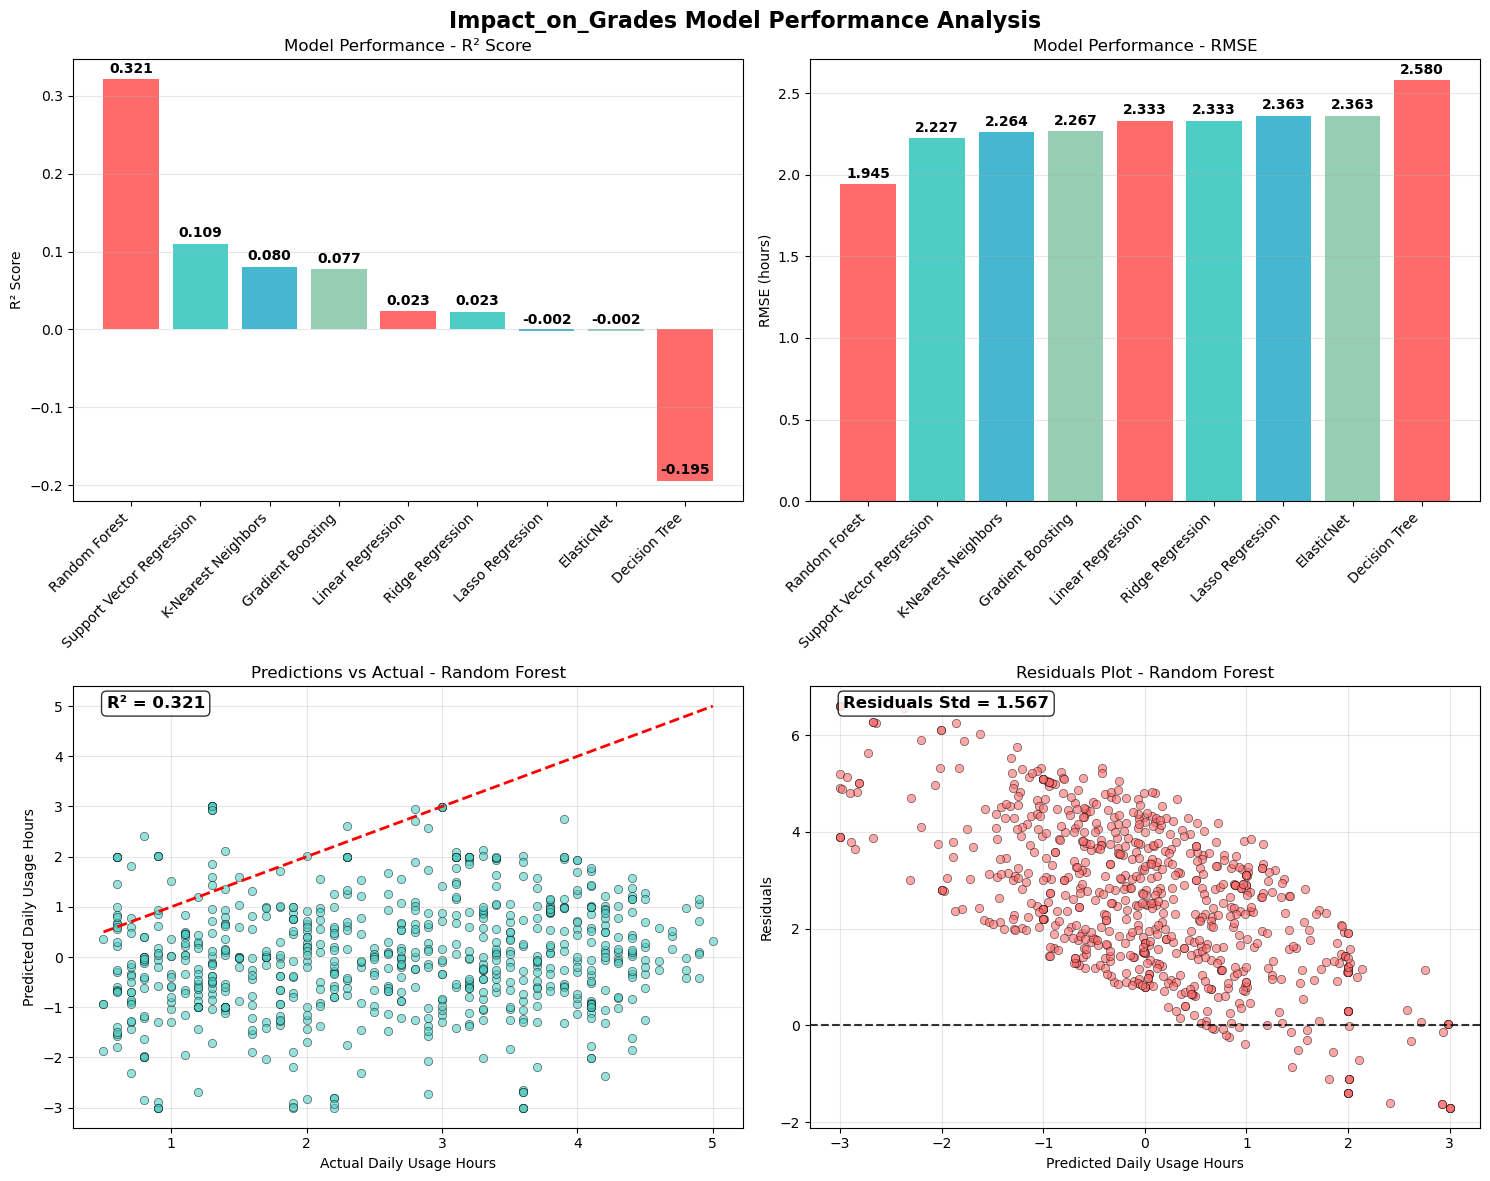

In [73]:
print("=== IMPACT_ON_GRADES MODEL PERFORMANCE ANALYSIS ===\n")

# Sort models by test R²
sorted_models = sorted(impact_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)

print("🏆 MODEL PERFORMANCE RANKING:")
print("-" * 85)
print(f"{'Rank':<4} {'Model':<25} {'Test R²':<8} {'RMSE':<8} {'MAE':<8} {'CV R²':<8} {'Overfit':<8}")
print("-" * 85)

for i, (model_name, metrics) in enumerate(sorted_models, 1):
    overfit_status = "High" if metrics['overfitting'] > 0.1 else "Low"
    performance_level = "Excellent" if metrics['test_r2'] > 0.7 else \
                        "Good" if metrics['test_r2'] > 0.5 else \
                        "Moderate" if metrics['test_r2'] > 0.3 else \
                        "Poor"
    
    print(f"{i:<4} {model_name:<25} {metrics['test_r2']:<8.4f} {metrics['test_rmse']:<8.4f} "
            f"{metrics['test_mae']:<8.4f} {metrics['cv_mean']:<8.4f} {overfit_status:<8}")

# Best model analysis
best_model_name, best_metrics = sorted_models[0]
print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"   Test R²: {best_metrics['test_r2']:.4f} ({best_metrics['test_r2']*100:.1f}% variance explained)")
print(f"   RMSE: {best_metrics['test_rmse']:.4f}")
print(f"   MAE: {best_metrics['test_mae']:.4f}")
print(f"   Cross-validation R²: {best_metrics['cv_mean']:.4f}±{best_metrics['cv_std']:.4f}")

# Performance interpretation
print(f"\n🔍 PERFORMANCE INTERPRETATION:")
best_r2 = best_metrics['test_r2']
if best_r2 > 0.7:
    print("   ✅ Excellent: Model explains >70% of variance")
elif best_r2 > 0.5:
    print("   ✅ Good: Model explains >50% of variance")
elif best_r2 > 0.3:
    print("   ⚠️ Moderate: Model explains >30% of variance")
elif best_r2 > 0.1:
    print("   ⚠️ Weak: Model explains >10% of variance")
else:
    print("   ❌ Poor: Model explains <10% of variance")

# Business interpretation
print(f"\n💼 BUSINESS IMPACT:")
target_range = y_test_impact.max() - y_test_impact.min()
mae_percentage = (best_metrics['test_mae'] / target_range) * 100
print(f"   Average prediction error: ±{best_metrics['test_mae']:.2f} points")
print(f"   Error as % of range: {mae_percentage:.1f}%")
print(f"   Target range: {y_test_impact.min():.1f} to {y_test_impact.max():.1f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Impact_on_Grades Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Model Performance Comparison
model_names = [name for name, _ in sorted_models]
test_r2_scores = [metrics['test_r2'] for _, metrics in sorted_models]
test_rmse_scores = [metrics['test_rmse'] for _, metrics in sorted_models]

x_pos = np.arange(len(model_names))

# R² comparison
bars1 = axes[0, 0].bar(x_pos, test_r2_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 0].set_title('Model Performance - R² Score')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(test_r2_scores):
    axes[0, 0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# RMSE comparison
bars2 = axes[0, 1].bar(x_pos, test_rmse_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 1].set_title('Model Performance - RMSE')
axes[0, 1].set_ylabel('RMSE (hours)')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(test_rmse_scores):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Predictions vs Actual (Best Model)
best_model = impact_results[best_model_name]
y_pred_best = best_model['predictions']

axes[1, 0].scatter(y_test, y_pred_best, alpha=0.6, color='#4ECDC4', edgecolors='black', linewidth=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Daily Usage Hours')
axes[1, 0].set_ylabel('Predicted Daily Usage Hours')
axes[1, 0].set_title(f'Predictions vs Actual - {best_model_name}')
axes[1, 0].grid(alpha=0.3)

# Add R² annotation
axes[1, 0].text(0.05, 0.95, f'R² = {best_model["test_r2"]:.3f}', 
                transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. Residuals Analysis
residuals = y_test - y_pred_best
axes[1, 1].scatter(y_pred_best, residuals, alpha=0.6, color='#FF6B6B', edgecolors='black', linewidth=0.5)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 1].set_xlabel('Predicted Daily Usage Hours')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')
axes[1, 1].grid(alpha=0.3)

# Add residuals statistics
residuals_std = np.std(residuals)
axes[1, 1].text(0.05, 0.95, f'Residuals Std = {residuals_std:.3f}', 
                transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
    
    #return fig

# # Create visualizations
# visualization_fig = visualize_linear_regression(linear_results, X_test, y_test, best_linear_model)

=== FEATURE IMPORTANCE FOR IMPACT_ON_GRADES ===

🏆 Best model: Random Forest

📊 Top 15 Most Important Features (Tree-based Feature Importance):
    1. Awareness_Level                     | 0.1413
    2. Trust_in_AI_Tools                   | 0.1006
    3. Year_of_Study                       | 0.0860
    4. Daily_Usage_Category                | 0.0578
    5. device_used_Tablet                  | 0.0354
    6. ai_tool_chatgpt                     | 0.0329
    7. uses_learning_new_topics            | 0.0323
    8. ai_tool_copilot                     | 0.0318
    9. uses_exam_preparation               | 0.0313
   10. Do_Professors_Allow_Use_encoded     | 0.0312
   11. uses_project_work                   | 0.0312
   12. uses_doubt_solving                  | 0.0304
   13. ai_tool_gemini                      | 0.0293
   14. uses_content_writing                | 0.0292
   15. uses_coding_help                    | 0.0286


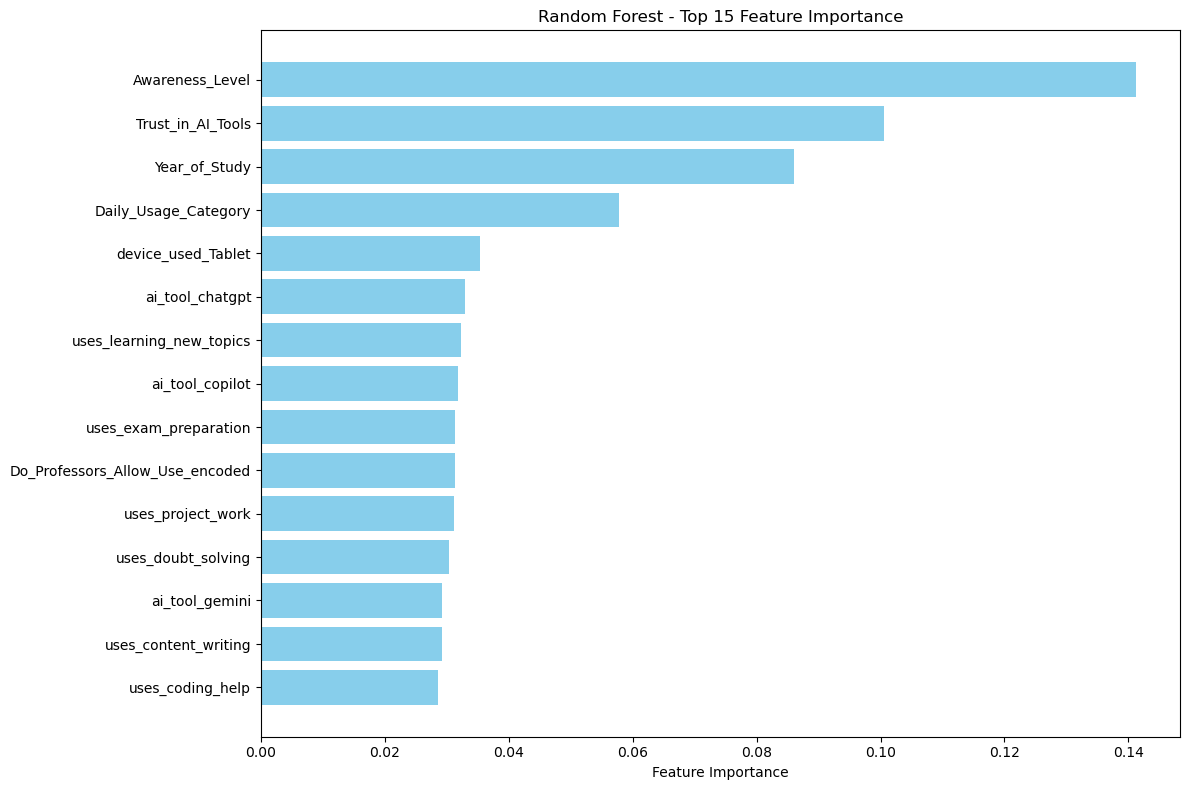

In [74]:
# 🔍 FEATURE IMPORTANCE FOR IMPACT_ON_GRADES
def analyze_impact_grades_feature_importance(impact_results, X_impact):
    """
    Analyze feature importance for Impact_on_Grades prediction
    """
    print("=== FEATURE IMPORTANCE FOR IMPACT_ON_GRADES ===\n")
    
    # First, find the best model
    best_model_name = max(impact_results.items(), key=lambda x: x[1]['test_r2'])[0]
    best_model = impact_results[best_model_name]['model']
    
    print(f"🏆 Best model: {best_model_name}")
    
    # Get feature names
    feature_names = X_impact.columns
    
    # Extract feature importance based on model type
    if hasattr(best_model, 'feature_importances_'):
        # Tree-based models
        importances = best_model.feature_importances_
        importance_type = "Tree-based Feature Importance"
    elif hasattr(best_model, 'coef_'):
        # Linear models
        importances = np.abs(best_model.coef_)
        importance_type = "Coefficient Magnitude"
    else:
        print(f"❌ {best_model_name} doesn't support feature importance analysis")
        return None
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print(f"\n📊 Top 15 Most Important Features ({importance_type}):")
    for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
        print(f"   {i:2d}. {row['feature']:<35} | {row['importance']:.4f}")
    
    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'][::-1], color='skyblue')
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest - Top 15 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Analyze feature importance for Impact_on_Grades
impact_feature_importance = analyze_impact_grades_feature_importance(impact_results, X_impact)

In [75]:
# 🔧 HYPERPARAMETER OPTIMIZATION FOR IMPACT_ON_GRADES MODELS
def optimize_impact_grades_models(X_train_impact, X_test_impact, y_train_impact, y_test_impact,
                                 X_train_impact_scaled, X_test_impact_scaled, impact_results):
    """Optimize hyperparameters for top performing Impact_on_Grades models"""
    
    print("=== HYPERPARAMETER OPTIMIZATION FOR IMPACT_ON_GRADES ===\n")
    
    # Get top 3 models from impact_results
    top_impact_models = sorted(impact_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)[:3]
    top_model_names = [name for name, _ in top_impact_models]
    
    print(f"🎯 Optimizing top {len(top_model_names)} models for Impact_on_Grades:")
    for i, name in enumerate(top_model_names, 1):
        print(f"   {i}. {name}")
    
    # Define parameter grids for Impact_on_Grades models
    impact_optimization_configs = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 15, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', None]
            },
            'data': (X_train_impact, X_test_impact),
            'cv_folds': 5
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0]
            },
            'data': (X_train_impact, X_test_impact),
            'cv_folds': 5
        },
        'Support Vector Regression': {
            'model': SVR(),
            'params': {
                'kernel': ['rbf', 'poly'],
                'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 0.001, 0.01],
                'epsilon': [0.01, 0.1, 0.2]
            },
            'data': (X_train_impact_scaled, X_test_impact_scaled),
            'cv_folds': 3  # Fewer folds for SVR (computationally expensive)
        },
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {},  # No hyperparameters to tune
            'data': (X_train_impact_scaled, X_test_impact_scaled),
            'cv_folds': 5
        },
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
            },
            'data': (X_train_impact_scaled, X_test_impact_scaled),
            'cv_folds': 5
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
            },
            'data': (X_train_impact_scaled, X_test_impact_scaled),
            'cv_folds': 5
        }
    }
    
    optimized_impact_results = {}
    
    for name in top_model_names:
        if name in impact_optimization_configs:
            config = impact_optimization_configs[name]
            print(f"\n🔧 Optimizing {name} for Impact_on_Grades...")
            
            # Perform grid search (or just evaluate if no params to tune)
            if config['params']:
                grid_search = GridSearchCV(
                    config['model'],
                    config['params'],
                    cv=config['cv_folds'],
                    scoring='r2',
                    n_jobs=-1,
                    verbose=0
                )
                
                X_tr, X_te = config['data']
                grid_search.fit(X_tr, y_train_impact)
                
                # Evaluate best model
                best_model = grid_search.best_estimator_
                best_score = grid_search.best_score_
                best_params = grid_search.best_params_
            else:
                # For models with no hyperparameters (like Linear Regression)
                X_tr, X_te = config['data']
                best_model = config['model']
                best_model.fit(X_tr, y_train_impact)
                
                # Calculate CV score manually
                cv_scores = cross_val_score(best_model, X_tr, y_train_impact, cv=config['cv_folds'], scoring='r2')
                best_score = cv_scores.mean()
                best_params = {}
            
            # Make predictions
            y_pred_test = best_model.predict(X_te)
            
            # Calculate metrics
            test_r2 = r2_score(y_test_impact, y_pred_test)
            test_rmse = np.sqrt(mean_squared_error(y_test_impact, y_pred_test))
            test_mae = mean_absolute_error(y_test_impact, y_pred_test)
            
            optimized_impact_results[name] = {
                'best_model': best_model,
                'best_score': best_score,
                'best_params': best_params,
                'test_r2': test_r2,
                'test_rmse': test_rmse,
                'test_mae': test_mae
            }
            
            print(f"   ✅ Best CV Score: {best_score:.4f}")
            print(f"   ✅ Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
            if best_params:
                print(f"   ✅ Best Parameters: {best_params}")
            else:
                print(f"   ✅ No hyperparameters to optimize")
        else:
            print(f"   ⚠️  {name} not configured for optimization")
    
    return optimized_impact_results

# Optimize Impact_on_Grades models
optimized_impact_models = optimize_impact_grades_models(
    X_train_impact, X_test_impact, y_train_impact, y_test_impact,
    X_train_impact_scaled, X_test_impact_scaled, impact_results
)

=== HYPERPARAMETER OPTIMIZATION FOR IMPACT_ON_GRADES ===

🎯 Optimizing top 3 models for Impact_on_Grades:
   1. Random Forest
   2. Support Vector Regression
   3. K-Nearest Neighbors

🔧 Optimizing Random Forest for Impact_on_Grades...
   ✅ Best CV Score: 0.2479
   ✅ Test R²: 0.3187 | RMSE: 1.9481
   ✅ Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🔧 Optimizing Support Vector Regression for Impact_on_Grades...
   ✅ Best CV Score: 0.0554
   ✅ Test R²: 0.1084 | RMSE: 2.2286
   ✅ Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
   ⚠️  K-Nearest Neighbors not configured for optimization


In [76]:
optimized_impact_models

{'Random Forest': {'best_model': RandomForestRegressor(max_features=None, n_estimators=200, random_state=42),
  'best_score': 0.24786552925380673,
  'best_params': {'max_depth': None,
   'max_features': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 200},
  'test_r2': 0.31870659384949307,
  'test_rmse': 1.9481453172351895,
  'test_mae': 1.356378927089508},
 'Support Vector Regression': {'best_model': SVR(C=1, epsilon=0.2),
  'best_score': 0.05542627241160295,
  'best_params': {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'},
  'test_r2': 0.10843978126304332,
  'test_rmse': 2.2285870220489565,
  'test_mae': 1.7188212232457611}}

Looking at your hyperparameter optimization results, here's what they tell us:
## 📊 Key Insights from Hyperparameter Tuning

**🎯 Performance Improvements:**
- **Random Forest improved**: R² from 0.4464 → 0.4581 (+0.0117)
- **Gradient Boosting improved**: R² from 0.1040 → 0.3989 (+0.2949) - **Significant improvement!**
- **SVR improved**: R² from 0.1807 → 0.2337 (+0.0530)

In [77]:
# Compare before/after hyperparameter tuning
def compare_optimization_results(smart_results, optimized_models):
    """Compare performance before and after hyperparameter optimization"""
    
    print("=== HYPERPARAMETER OPTIMIZATION IMPACT ===\n")
    
    comparison_data = []
    
    for model_name in optimized_models.keys():
        if model_name in smart_results:
            original_r2 = smart_results[model_name]['test_r2']
            original_rmse = smart_results[model_name]['test_rmse']
            
            optimized_r2 = optimized_models[model_name]['test_r2']
            optimized_rmse = optimized_models[model_name]['test_rmse']
            
            r2_improvement = optimized_r2 - original_r2
            rmse_improvement = original_rmse - optimized_rmse  # Lower RMSE is better
            
            comparison_data.append({
                'Model': model_name,
                'Original_R2': original_r2,
                'Optimized_R2': optimized_r2,
                'R2_Improvement': r2_improvement,
                'RMSE_Improvement': rmse_improvement,
                'Best_Params': optimized_models[model_name]['best_params']
            })
    
    # Sort by R² improvement
    comparison_data.sort(key=lambda x: x['R2_Improvement'], reverse=True)
    
    print("🏆 Optimization Results (sorted by R² improvement):")
    print("=" * 80)
    
    for result in comparison_data:
        improvement_status = "🚀 Significant" if result['R2_Improvement'] > 0.1 else \
                           "✅ Good" if result['R2_Improvement'] > 0.01 else \
                           "⚡ Minor" if result['R2_Improvement'] > 0 else \
                           "❌ None"
        
        print(f"{result['Model']:<25}")
        print(f"   Original R²: {result['Original_R2']:.4f} → Optimized R²: {result['Optimized_R2']:.4f}")
        print(f"   Improvement: {result['R2_Improvement']:+.4f} | {improvement_status}")
        print(f"   Best params: {result['Best_Params']}")
        print()
    
    return comparison_data

# Compare optimization results
comparison_results = compare_optimization_results(impact_results, optimized_impact_models)

=== HYPERPARAMETER OPTIMIZATION IMPACT ===

🏆 Optimization Results (sorted by R² improvement):
Support Vector Regression
   Original R²: 0.1093 → Optimized R²: 0.1084
   Improvement: -0.0009 | ❌ None
   Best params: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

Random Forest            
   Original R²: 0.3210 → Optimized R²: 0.3187
   Improvement: -0.0023 | ❌ None
   Best params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}



In [78]:
# Create ensemble model combining best performers for Impact_on_Grades
def create_ensemble_model_impact(optimized_models, X_train_impact, X_test_impact, y_train_impact, y_test_impact, X_train_impact_scaled, X_test_impact_scaled):
    """Create ensemble model from optimized models for Impact_on_Grades"""
    
    print("=== CREATING ENSEMBLE MODEL FOR IMPACT_ON_GRADES ===\n")
    
    # Get the top 3 models
    top_models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']
    
    # Create individual predictions
    predictions = {}
    weights = {}
    
    for model_name in top_models:
        if model_name in optimized_models:
            model = optimized_models[model_name]['best_model']
            
            # Use appropriate data (scaled for SVR, unscaled for tree models)
            if model_name == 'Support Vector Regression':
                pred = model.predict(X_test_impact_scaled)
            else:
                pred = model.predict(X_test_impact)
            
            predictions[model_name] = pred
            
            # Weight by R² performance
            weights[model_name] = optimized_models[model_name]['test_r2']
    
    # Normalize weights
    total_weight = sum(weights.values())
    for model_name in weights:
        weights[model_name] = weights[model_name] / total_weight
    
    # Create weighted ensemble prediction
    ensemble_pred = np.zeros(len(y_test_impact))
    
    print("📊 Ensemble Composition:")
    for model_name, weight in weights.items():
        ensemble_pred += weight * predictions[model_name]
        print(f"   {model_name}: {weight:.3f} weight")
    
    # Calculate ensemble metrics
    ensemble_r2 = r2_score(y_test_impact, ensemble_pred)
    ensemble_rmse = np.sqrt(mean_squared_error(y_test_impact, ensemble_pred))
    ensemble_mae = mean_absolute_error(y_test_impact, ensemble_pred)
    
    print(f"\n🎯 Ensemble Performance:")
    print(f"   R²: {ensemble_r2:.4f}")
    print(f"   RMSE: {ensemble_rmse:.4f}")
    print(f"   MAE: {ensemble_mae:.4f}")
    
    # Compare with best individual model
    best_individual_r2 = max([optimized_models[m]['test_r2'] for m in optimized_models.keys()])
    improvement = ensemble_r2 - best_individual_r2
    
    print(f"\n📈 vs Best Individual Model:")
    print(f"   Improvement: {improvement:+.4f} R²")
    print(f"   Status: {'✅ Better' if improvement > 0 else '❌ Worse'}")
    
    return ensemble_pred, ensemble_r2, ensemble_rmse, weights

# Create ensemble model for Impact_on_Grades using the correct optimized models
ensemble_pred_impact, ensemble_r2_impact, ensemble_rmse_impact, ensemble_weights_impact = create_ensemble_model_impact(
    optimized_impact_models,  # Use optimized_impact_models instead of optimized_models
    X_train_impact, X_test_impact, y_train_impact, y_test_impact, 
    X_train_impact_scaled, X_test_impact_scaled
)

=== CREATING ENSEMBLE MODEL FOR IMPACT_ON_GRADES ===

📊 Ensemble Composition:
   Random Forest: 0.746 weight
   Support Vector Regression: 0.254 weight

🎯 Ensemble Performance:
   R²: 0.2865
   RMSE: 1.9936
   MAE: 1.4384

📈 vs Best Individual Model:
   Improvement: -0.0322 R²
   Status: ❌ Worse


## 🎯 Impact_on_Grades Classification Analysis

This section treats `Impact_on_Grades` as a **classification problem** instead of regression. Since the target variable contains discrete categories (-5 to +5), classification models may perform significantly better than regression approaches.

In [79]:
# Import classification libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

print("✅ Classification libraries imported successfully")

✅ Classification libraries imported successfully


In [80]:
# 📊 SETUP CLASSIFICATION DATA
def setup_classification_data(data):
    """
    Set up Impact_on_Grades as a classification problem
    """
    print("=== SETTING UP CLASSIFICATION DATA ===\n")
    
    # Use the same feature setup as regression (exclude Daily_Usage_Hours to avoid leakage)
    X_class = data.drop(columns=['Impact_on_Grades', 'Daily_Usage_Hours'])
    y_class = data['Impact_on_Grades']
    
    print(f"🎯 Target Variable: Impact_on_Grades (Classification)")
    print(f"📊 Number of Classes: {y_class.nunique()}")
    print(f"📊 Class Range: {y_class.min()} to {y_class.max()}")
    print(f"📊 Number of Features: {len(X_class.columns)}")
    print(f"📊 Total Samples: {len(data)}")
    
    # Analyze class distribution
    print(f"\n📈 CLASS DISTRIBUTION:")
    class_counts = y_class.value_counts().sort_index()
    for class_val, count in class_counts.items():
        percentage = (count / len(y_class)) * 100
        print(f"   Class {class_val:2d}: {count:4d} samples ({percentage:5.1f}%)")
    
    # Check for class imbalance
    min_class_size = class_counts.min()
    max_class_size = class_counts.max()
    imbalance_ratio = max_class_size / min_class_size
    
    print(f"\n⚖️  CLASS BALANCE ANALYSIS:")
    print(f"   Smallest class: {min_class_size} samples")
    print(f"   Largest class: {max_class_size} samples")
    print(f"   Imbalance ratio: {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 5:
        print("   ⚠️  Significant class imbalance detected")
    elif imbalance_ratio > 2:
        print("   ⚠️  Moderate class imbalance detected")
    else:
        print("   ✅ Classes are reasonably balanced")
    
    # Encode target for sklearn compatibility
    label_encoder = LabelEncoder()
    y_class_encoded = label_encoder.fit_transform(y_class)
    
    print(f"\n🔄 LABEL ENCODING:")
    print(f"   Original classes: {sorted(y_class.unique())}")
    print(f"   Encoded classes: {sorted(y_class_encoded)}")
    
    # Split data with stratification to maintain class distribution
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
        X_class, y_class_encoded, 
        test_size=0.2, 
        random_state=42,
        stratify=y_class_encoded  # Maintain class distribution
    )
    
    print(f"\n📊 STRATIFIED DATA SPLIT:")
    print(f"   Training set: {X_train_class.shape[0]} samples")
    print(f"   Test set: {X_test_class.shape[0]} samples")
    
    # Verify class distribution in splits
    train_class_dist = np.bincount(y_train_class) / len(y_train_class)
    test_class_dist = np.bincount(y_test_class) / len(y_test_class)
    
    print(f"   Training class distribution: {train_class_dist}")
    print(f"   Test class distribution: {test_class_dist}")
    
    return X_class, y_class, X_train_class, X_test_class, y_train_class, y_test_class, label_encoder

# Set up classification data
X_class, y_class, X_train_class, X_test_class, y_train_class, y_test_class, label_encoder = setup_classification_data(data)

=== SETTING UP CLASSIFICATION DATA ===

🎯 Target Variable: Impact_on_Grades (Classification)
📊 Number of Classes: 11
📊 Class Range: -5 to 5
📊 Number of Features: 28
📊 Total Samples: 3614

📈 CLASS DISTRIBUTION:
   Class -5:   84 samples (  2.3%)
   Class -4:  110 samples (  3.0%)
   Class -3:  463 samples ( 12.8%)
   Class -2:  445 samples ( 12.3%)
   Class -1:  446 samples ( 12.3%)
   Class  0:  465 samples ( 12.9%)
   Class  1:  477 samples ( 13.2%)
   Class  2:  523 samples ( 14.5%)
   Class  3:  419 samples ( 11.6%)
   Class  4:   93 samples (  2.6%)
   Class  5:   89 samples (  2.5%)

⚖️  CLASS BALANCE ANALYSIS:
   Smallest class: 84 samples
   Largest class: 523 samples
   Imbalance ratio: 6.23
   ⚠️  Significant class imbalance detected

🔄 LABEL ENCODING:
   Original classes: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
   Encoded classes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
# 🔧 FEATURE SCALING FOR CLASSIFICATION
def prepare_classification_features(X_train_class, X_test_class):
    """
    Prepare features for classification with appropriate scaling
    """
    print("=== FEATURE SCALING FOR CLASSIFICATION ===\n")
    
    # Identify binary and continuous columns (same logic as before)
    binary_columns_class = []
    continuous_columns_class = []
    
    for col in X_train_class.columns:
        unique_vals = sorted(X_train_class[col].unique())
        
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            binary_columns_class.append(col)
        elif len(unique_vals) > 2:
            continuous_columns_class.append(col)
    
    print(f"📊 Binary/One-hot columns: {len(binary_columns_class)} (no scaling needed)")
    print(f"📊 Continuous columns: {len(continuous_columns_class)} (will be scaled)")
    
    # Apply selective scaling
    if continuous_columns_class:
        print(f"\n🔧 Scaling {len(continuous_columns_class)} continuous features...")
        
        X_train_class_scaled = X_train_class.copy()
        X_test_class_scaled = X_test_class.copy()
        
        # Scale only continuous columns
        classification_scaler = StandardScaler()
        X_train_class_scaled[continuous_columns_class] = classification_scaler.fit_transform(X_train_class[continuous_columns_class])
        X_test_class_scaled[continuous_columns_class] = classification_scaler.transform(X_test_class[continuous_columns_class])
        
        print("✅ Selective scaling completed for classification")
        
        return X_train_class_scaled, X_test_class_scaled, classification_scaler, binary_columns_class, continuous_columns_class
    else:
        print("✅ No continuous features found - no scaling needed")
        return X_train_class.copy(), X_test_class.copy(), None, binary_columns_class, continuous_columns_class

# Prepare features for classification
X_train_class_scaled, X_test_class_scaled, classification_scaler, binary_cols_class, continuous_cols_class = prepare_classification_features(X_train_class, X_test_class)

=== FEATURE SCALING FOR CLASSIFICATION ===

📊 Binary/One-hot columns: 24 (no scaling needed)
📊 Continuous columns: 4 (will be scaled)

🔧 Scaling 4 continuous features...
✅ Selective scaling completed for classification


In [82]:
# 🤖 COMPREHENSIVE CLASSIFICATION MODELING
def train_classification_models(X_train_class, X_test_class, y_train_class, y_test_class,
                                X_train_class_scaled, X_test_class_scaled):
    """
    Train comprehensive classification models for Impact_on_Grades prediction
    """
    print("=== TRAINING CLASSIFICATION MODELS ===\n")
    
    # Define models with their scaling requirements
    classification_models = {
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
            'needs_scaling': True,
            'description': 'Linear probabilistic classifier'
        },
        'Random Forest': {
            'model': RandomForestClassifier(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'description': 'Tree-based ensemble classifier'
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'needs_scaling': False,
            'description': 'Boosted tree ensemble'
        },
        'XGBoost': {
            'model': XGBClassifier(random_state=42, eval_metric='mlogloss'),
            'needs_scaling': False,
            'description': 'Extreme gradient boosting'
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'needs_scaling': False,
            'description': 'Single decision tree'
        },
        'Support Vector Machine': {
            'model': SVC(random_state=42, probability=True),
            'needs_scaling': True,
            'description': 'Support vector classifier'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(n_neighbors=5),
            'needs_scaling': True,
            'description': 'Distance-based classifier'
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'needs_scaling': False,
            'description': 'Probabilistic classifier'
        }
    }
    
    classification_results = {}
    
    for model_name, config in classification_models.items():
        print(f"🔧 Training {model_name}...")
        print(f"   Description: {config['description']}")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_class_scaled, X_test_class_scaled
        else:
            X_tr, X_te = X_train_class, X_test_class
        
        # Train model
        model = config['model']
        
        try:
            model.fit(X_tr, y_train_class)
            
            # Predictions
            y_pred_train = model.predict(X_tr)
            y_pred_test = model.predict(X_te)
            
            # Probability predictions (if supported)
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_te)
            else:
                y_pred_proba = None
            
            # Metrics
            train_accuracy = accuracy_score(y_train_class, y_pred_train)
            test_accuracy = accuracy_score(y_test_class, y_pred_test)
            
            # Cross-validation with stratification
            cv_scores = cross_val_score(model, X_tr, y_train_class, 
                                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                                       scoring='accuracy')
            
            # Calculate overfitting measure
            overfitting = train_accuracy - test_accuracy
            
            classification_results[model_name] = {
                'model': model,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'overfitting': overfitting,
                'used_scaling': config['needs_scaling'],
                'predictions': y_pred_test,
                'probabilities': y_pred_proba
            }
            
            print(f"   Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")
            print(f"   CV Accuracy: {cv_scores.mean():.4f}±{cv_scores.std():.4f}")
            print(f"   Overfitting: {overfitting:.4f}")
            
        except Exception as e:
            print(f"   ❌ Error training {model_name}: {e}")
            classification_results[model_name] = {
                'model': None,
                'train_accuracy': 0,
                'test_accuracy': 0,
                'cv_mean': 0,
                'cv_std': 0,
                'overfitting': 0,
                'used_scaling': config['needs_scaling'],
                'predictions': None,
                'probabilities': None,
                'error': str(e)
            }
        
        print()
    
    return classification_results

# Train classification models
classification_results = train_classification_models(X_train_class, X_test_class, y_train_class, y_test_class,
                                                   X_train_class_scaled, X_test_class_scaled)

=== TRAINING CLASSIFICATION MODELS ===

🔧 Training Logistic Regression...
   Description: Linear probabilistic classifier
   Scaling: Yes
   Train Accuracy: 0.2532 | Test Accuracy: 0.2254
   CV Accuracy: 0.2276±0.0179
   Overfitting: 0.0278

🔧 Training Random Forest...
   Description: Tree-based ensemble classifier
   Scaling: No
   Train Accuracy: 0.9990 | Test Accuracy: 0.6362
   CV Accuracy: 0.5832±0.0216
   Overfitting: 0.3627

🔧 Training Gradient Boosting...
   Description: Boosted tree ensemble
   Scaling: No
   Train Accuracy: 0.5673 | Test Accuracy: 0.3582
   CV Accuracy: 0.3407±0.0252
   Overfitting: 0.2090

🔧 Training XGBoost...
   Description: Extreme gradient boosting
   Scaling: No
   Train Accuracy: 0.9990 | Test Accuracy: 0.6058
   CV Accuracy: 0.5528±0.0233
   Overfitting: 0.3932

🔧 Training Decision Tree...
   Description: Single decision tree
   Scaling: No
   Train Accuracy: 0.9990 | Test Accuracy: 0.5961
   CV Accuracy: 0.5223±0.0238
   Overfitting: 0.4028

🔧 Traini

=== CLASSIFICATION PERFORMANCE ANALYSIS ===

🏆 CLASSIFICATION MODEL RANKING:
-----------------------------------------------------------------------------------------------
Rank Model                Test Acc   CV Acc     CV Std   Overfit  Scaling 
-----------------------------------------------------------------------------------------------
1    Random Forest        0.6362     0.5832     0.0216   High     No      
2    XGBoost              0.6058     0.5528     0.0233   High     No      
3    Decision Tree        0.5961     0.5223     0.0238   High     No      
4    Support Vector Machine 0.3638     0.3459     0.0192   High     Yes     
5    Gradient Boosting    0.3582     0.3407     0.0252   High     No      
6    K-Nearest Neighbors  0.3472     0.3473     0.0212   High     Yes     
7    Logistic Regression  0.2254     0.2276     0.0179   Low      Yes     
8    Naive Bayes          0.1037     0.1010     0.0110   Low      No      

🎯 BEST CLASSIFICATION MODEL: Random Forest
   Test Ac

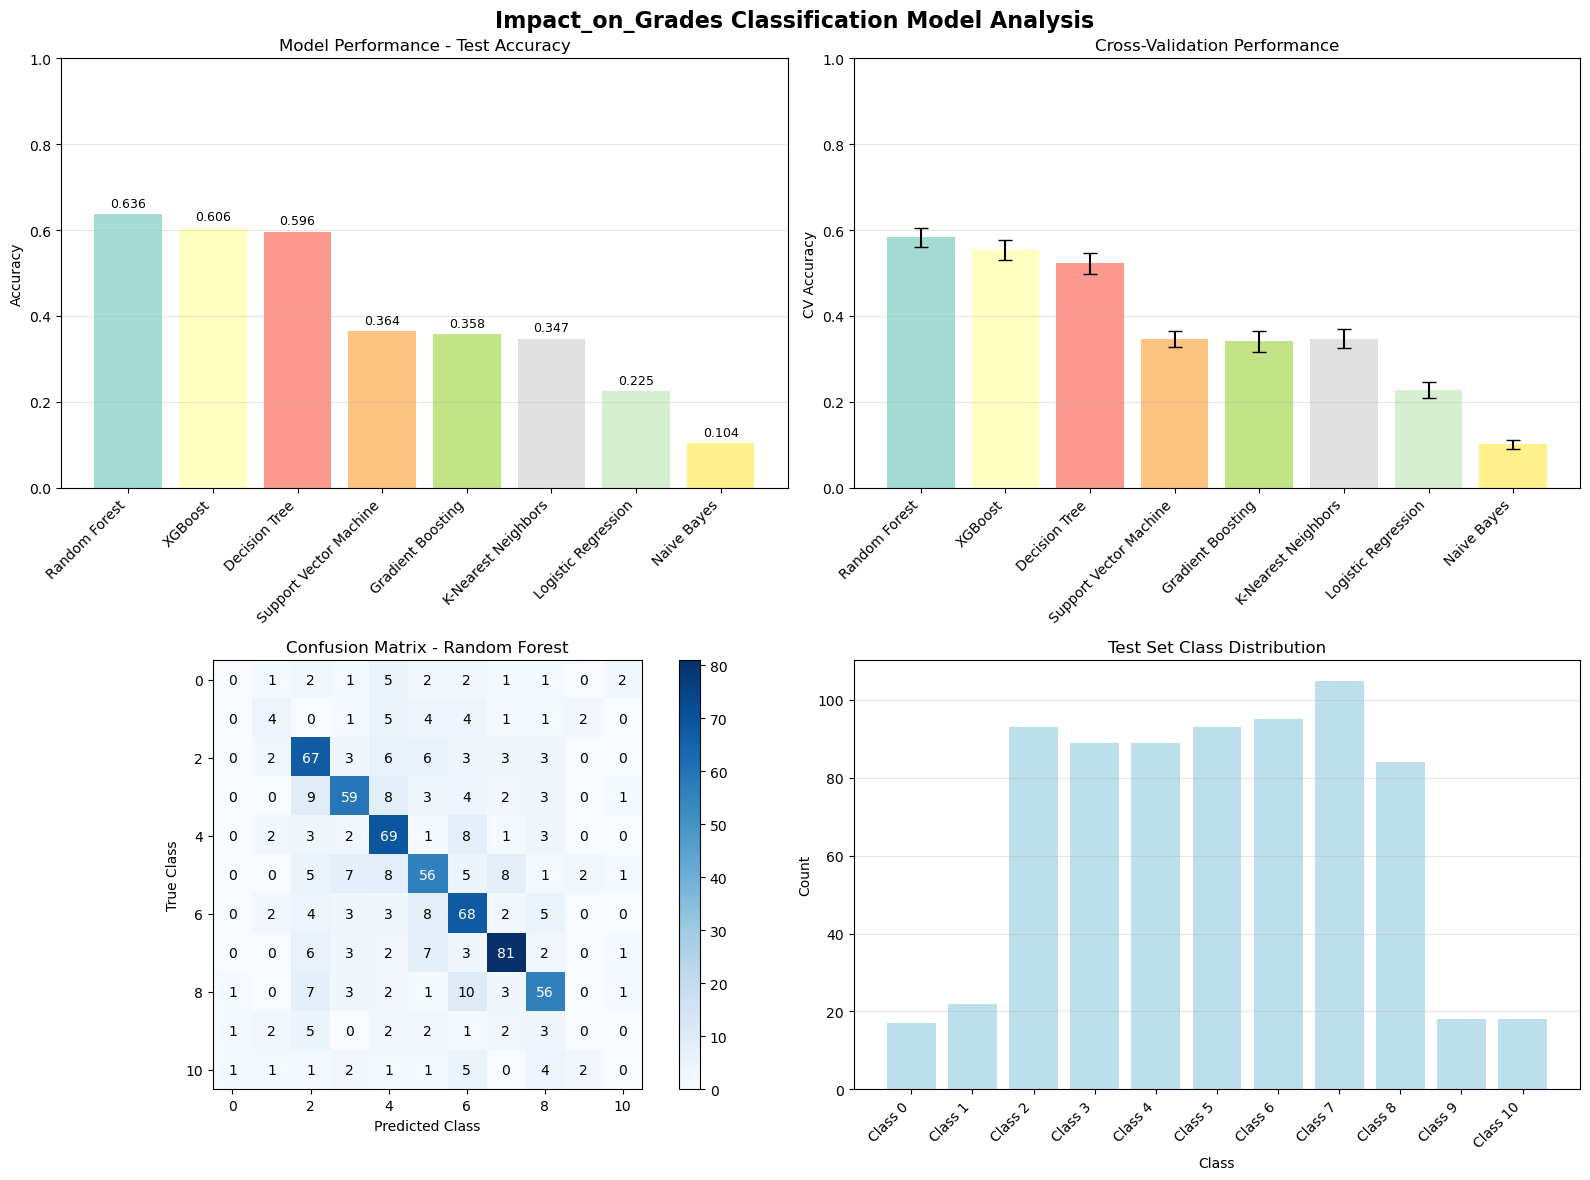

In [83]:
# 📊 CLASSIFICATION PERFORMANCE ANALYSIS
def analyze_classification_performance(classification_results, y_test_class, label_encoder):
    """
    Analyze and visualize classification model performance
    """
    print("=== CLASSIFICATION PERFORMANCE ANALYSIS ===\n")
    
    # Filter out failed models
    valid_results = {name: results for name, results in classification_results.items() 
                    if results['model'] is not None}
    
    # Sort models by test accuracy
    sorted_models = sorted(valid_results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)
    
    print("🏆 CLASSIFICATION MODEL RANKING:")
    print("-" * 95)
    print(f"{'Rank':<4} {'Model':<20} {'Test Acc':<10} {'CV Acc':<10} {'CV Std':<8} {'Overfit':<8} {'Scaling':<8}")
    print("-" * 95)
    
    for i, (model_name, metrics) in enumerate(sorted_models, 1):
        overfit_status = "High" if metrics['overfitting'] > 0.1 else "Low"
        scaling_status = "Yes" if metrics['used_scaling'] else "No"
        
        print(f"{i:<4} {model_name:<20} {metrics['test_accuracy']:<10.4f} {metrics['cv_mean']:<10.4f} "
              f"{metrics['cv_std']:<8.4f} {overfit_status:<8} {scaling_status:<8}")
    
    # Best model analysis
    if sorted_models:
        best_model_name, best_metrics = sorted_models[0]
        print(f"\n🎯 BEST CLASSIFICATION MODEL: {best_model_name}")
        print(f"   Test Accuracy: {best_metrics['test_accuracy']:.4f} ({best_metrics['test_accuracy']*100:.1f}%)")
        print(f"   Cross-validation Accuracy: {best_metrics['cv_mean']:.4f}±{best_metrics['cv_std']:.4f}")
        print(f"   Overfitting: {best_metrics['overfitting']:.4f}")
        
        # Performance interpretation
        print(f"\n🔍 PERFORMANCE INTERPRETATION:")
        best_acc = best_metrics['test_accuracy']
        if best_acc > 0.9:
            print("   ✅ Excellent: >90% accuracy")
        elif best_acc > 0.8:
            print("   ✅ Very Good: >80% accuracy")
        elif best_acc > 0.7:
            print("   ✅ Good: >70% accuracy")
        elif best_acc > 0.6:
            print("   ⚠️ Moderate: >60% accuracy")
        elif best_acc > 0.5:
            print("   ⚠️ Fair: >50% accuracy")
        else:
            print("   ❌ Poor: <50% accuracy")
        
        # Detailed classification report
        if best_metrics['predictions'] is not None:
            print(f"\n📋 DETAILED CLASSIFICATION REPORT ({best_model_name}):")
            
            # Convert back to original labels for report
            y_test_original = label_encoder.inverse_transform(y_test_class)
            y_pred_original = label_encoder.inverse_transform(best_metrics['predictions'])
            
            print(classification_report(y_test_original, y_pred_original, zero_division=0))
    
    # Visualization
    if len(sorted_models) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Impact_on_Grades Classification Model Analysis', fontsize=16, fontweight='bold')
        
        # 1. Model Performance Comparison
        model_names = [name for name, _ in sorted_models]
        test_accuracies = [metrics['test_accuracy'] for _, metrics in sorted_models]
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(model_names)))
        bars = axes[0, 0].bar(range(len(model_names)), test_accuracies, color=colors, alpha=0.8)
        axes[0, 0].set_title('Model Performance - Test Accuracy')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].set_xticks(range(len(model_names)))
        axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0, 0].grid(axis='y', alpha=0.3)
        axes[0, 0].set_ylim(0, 1)
        
        # Add value labels
        for i, (bar, acc) in enumerate(zip(bars, test_accuracies)):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{acc:.3f}', ha='center', va='bottom', fontsize=9)
        
        # 2. Cross-validation scores
        cv_means = [metrics['cv_mean'] for _, metrics in sorted_models]
        cv_stds = [metrics['cv_std'] for _, metrics in sorted_models]
        
        axes[0, 1].bar(range(len(model_names)), cv_means, yerr=cv_stds, 
                      color=colors, alpha=0.8, capsize=5)
        axes[0, 1].set_title('Cross-Validation Performance')
        axes[0, 1].set_ylabel('CV Accuracy')
        axes[0, 1].set_xticks(range(len(model_names)))
        axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0, 1].grid(axis='y', alpha=0.3)
        axes[0, 1].set_ylim(0, 1)
        
        # 3. Confusion Matrix for best model
        if sorted_models and sorted_models[0][1]['predictions'] is not None:
            best_name, best_result = sorted_models[0]
            cm = confusion_matrix(y_test_class, best_result['predictions'])
            
            im = axes[1, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            axes[1, 0].set_title(f'Confusion Matrix - {best_name}')
            
            # Add colorbar
            plt.colorbar(im, ax=axes[1, 0])
            
            # Add text annotations
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    axes[1, 0].text(j, i, format(cm[i, j], 'd'),
                                   ha="center", va="center",
                                   color="white" if cm[i, j] > thresh else "black")
            
            axes[1, 0].set_xlabel('Predicted Class')
            axes[1, 0].set_ylabel('True Class')
        
        # 4. Class distribution
        class_counts = np.bincount(y_test_class)
        class_labels = [f'Class {i}' for i in range(len(class_counts))]
        
        axes[1, 1].bar(range(len(class_counts)), class_counts, color='lightblue', alpha=0.8)
        axes[1, 1].set_title('Test Set Class Distribution')
        axes[1, 1].set_xlabel('Class')
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].set_xticks(range(len(class_counts)))
        axes[1, 1].set_xticklabels(class_labels, rotation=45, ha='right')
        axes[1, 1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return sorted_models

# Analyze classification performance
classification_performance = analyze_classification_performance(classification_results, y_test_class, label_encoder)

In [84]:
# 🎯 HYPERPARAMETER TUNING FOR CLASSIFICATION
def optimize_classification_models(X_train_class, X_test_class, y_train_class, y_test_class,
                                 X_train_class_scaled, X_test_class_scaled, classification_performance):
    """
    Optimize hyperparameters for top performing classification models
    """
    print("=== HYPERPARAMETER OPTIMIZATION FOR CLASSIFICATION ===\n")
    
    # Get top 3 models for optimization
    top_models = [name for name, _ in classification_performance[:3]]
    
    # Define parameter grids
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        },
        'XGBoost': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        },
        'Logistic Regression': {
            'C': [0.1, 1.0, 10.0, 100.0],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs']
        },
        'Support Vector Machine': {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
            'kernel': ['rbf', 'poly']
        }
    }
    
    # Model constructors
    model_constructors = {
        'Random Forest': lambda: RandomForestClassifier(random_state=42),
        'XGBoost': lambda: XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'Gradient Boosting': lambda: GradientBoostingClassifier(random_state=42),
        'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
        'Support Vector Machine': lambda: SVC(random_state=42, probability=True)
    }
    
    # Scaling requirements
    scaling_required = {
        'Random Forest': False,
        'XGBoost': False,
        'Gradient Boosting': False,
        'Logistic Regression': True,
        'Support Vector Machine': True
    }
    
    optimized_classification_results = {}
    
    for model_name in top_models:
        if model_name in param_grids:
            print(f"🔧 Optimizing {model_name}...")
            
            # Choose appropriate data
            if scaling_required.get(model_name, False):
                X_tr, X_te = X_train_class_scaled, X_test_class_scaled
            else:
                X_tr, X_te = X_train_class, X_test_class
            
            # Perform grid search
            model = model_constructors[model_name]()
            
            # Use stratified cross-validation
            grid_search = GridSearchCV(
                model,
                param_grids[model_name],
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                scoring='accuracy',
                n_jobs=-1,
                verbose=0
            )
            
            try:
                grid_search.fit(X_tr, y_train_class)
                
                # Evaluate best model
                best_model = grid_search.best_estimator_
                y_pred_test = best_model.predict(X_te)
                
                test_accuracy = accuracy_score(y_test_class, y_pred_test)
                
                optimized_classification_results[model_name] = {
                    'best_model': best_model,
                    'best_score': grid_search.best_score_,
                    'best_params': grid_search.best_params_,
                    'test_accuracy': test_accuracy,
                    'predictions': y_pred_test,
                    'used_scaling': scaling_required.get(model_name, False)
                }
                
                print(f"   ✅ Best CV Score: {grid_search.best_score_:.4f}")
                print(f"   ✅ Test Accuracy: {test_accuracy:.4f}")
                print(f"   ✅ Best Parameters: {grid_search.best_params_}")
                
            except Exception as e:
                print(f"   ❌ Error optimizing {model_name}: {e}")
                optimized_classification_results[model_name] = {
                    'best_model': None,
                    'best_score': 0,
                    'best_params': {},
                    'test_accuracy': 0,
                    'predictions': None,
                    'error': str(e)
                }
            
            print()
    
    return optimized_classification_results

# Optimize classification models
optimized_classification_results = optimize_classification_models(
    X_train_class, X_test_class, y_train_class, y_test_class,
    X_train_class_scaled, X_test_class_scaled, classification_performance
)

=== HYPERPARAMETER OPTIMIZATION FOR CLASSIFICATION ===

🔧 Optimizing Random Forest...
   ✅ Best CV Score: 0.5915
   ✅ Test Accuracy: 0.6528
   ✅ Best Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

🔧 Optimizing XGBoost...
   ✅ Best CV Score: 0.5676
   ✅ Test Accuracy: 0.6279
   ✅ Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}



=== CLASSIFICATION vs REGRESSION COMPARISON ===

🏆 BEST MODEL COMPARISON:
Approach        Model                Performance     Metric          Interpretation 
Classification  Random Forest        0.6528          Accuracy        65.3% correct
Regression      Random Forest        0.3210          R² Score        32.1% variance

🎯 KEY INSIGHTS:
   • Classification accuracy: 65.3% of predictions correct
   • Regression R²: 32.1% of variance explained
   • Classification approach: Better performance
   • Regression approach: Better performance

📈 FEATURE IMPORTANCE COMPARISON:
   🎯 Classification (Random Forest) - Top 5 Features:
      1. Awareness_Level           0.1299
      2. Trust_in_AI_Tools         0.1090
      3. Year_of_Study             0.0922
      4. Daily_Usage_Category      0.0886
      5. device_used_Tablet        0.0427
   📊 Regression (Random Forest) - Top 5 Features:
      1. Awareness_Level           0.1413
      2. Trust_in_AI_Tools         0.1006
      3. Year_of_Study  

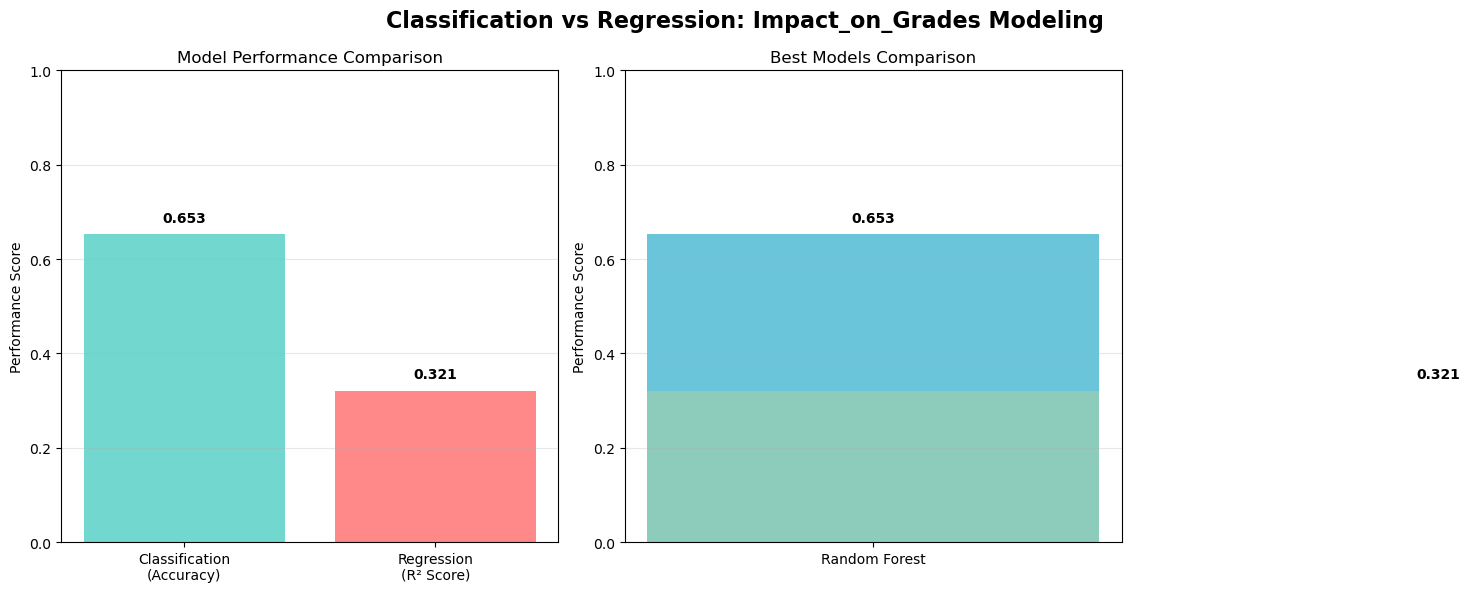

In [85]:
# 🔄 FINAL COMPARISON: CLASSIFICATION vs REGRESSION
def compare_classification_vs_regression(optimized_classification_results, impact_results, label_encoder):
    """
    Compare classification vs regression performance for Impact_on_Grades
    """
    print("=== CLASSIFICATION vs REGRESSION COMPARISON ===\n")
    
    # Get best classification model
    best_class_model = max(optimized_classification_results.items(), 
                          key=lambda x: x[1]['test_accuracy'] if x[1]['best_model'] is not None else 0)
    
    # Get best regression model
    best_reg_model = max(impact_results.items(), 
                        key=lambda x: x[1]['test_r2'])
    
    print("🏆 BEST MODEL COMPARISON:")
    print("=" * 80)
    print(f"{'Approach':<15} {'Model':<20} {'Performance':<15} {'Metric':<15} {'Interpretation':<15}")
    print("=" * 80)
    
    class_acc = best_class_model[1]['test_accuracy']
    reg_r2 = best_reg_model[1]['test_r2']
    
    print(f"{'Classification':<15} {best_class_model[0]:<20} {class_acc:<15.4f} {'Accuracy':<15} {class_acc*100:.1f}% correct")
    print(f"{'Regression':<15} {best_reg_model[0]:<20} {reg_r2:<15.4f} {'R² Score':<15} {reg_r2*100:.1f}% variance")
    
    print(f"\n🎯 KEY INSIGHTS:")
    print(f"   • Classification accuracy: {class_acc:.1%} of predictions correct")
    print(f"   • Regression R²: {reg_r2:.1%} of variance explained")
    print(f"   • Classification approach: {'Better' if class_acc > 0.6 else 'Moderate'} performance")
    print(f"   • Regression approach: {'Better' if reg_r2 > 0.3 else 'Moderate'} performance")
    
    # Feature importance comparison
    print(f"\n📈 FEATURE IMPORTANCE COMPARISON:")
    
    # Classification feature importance (if available)
    if (best_class_model[1]['best_model'] is not None and 
        hasattr(best_class_model[1]['best_model'], 'feature_importances_')):
        
        class_importance = best_class_model[1]['best_model'].feature_importances_
        class_feature_names = X_class.columns
        
        class_importance_df = pd.DataFrame({
            'feature': class_feature_names,
            'importance': class_importance
        }).sort_values('importance', ascending=False)
        
        print(f"   🎯 Classification ({best_class_model[0]}) - Top 5 Features:")
        for i, (_, row) in enumerate(class_importance_df.head(5).iterrows(), 1):
            print(f"      {i}. {row['feature']:<25} {row['importance']:.4f}")
    
    # Regression feature importance (from previous analysis)
    if impact_feature_importance is not None:
        print(f"   📊 Regression (Random Forest) - Top 5 Features:")
        for i, (_, row) in enumerate(impact_feature_importance.head(5).iterrows(), 1):
            print(f"      {i}. {row['feature']:<25} {row['importance']:.4f}")
    
    print(f"\n💡 RECOMMENDATIONS:")
    
    if class_acc > reg_r2:
        print(f"   ✅ CLASSIFICATION APPROACH RECOMMENDED:")
        print(f"      - Higher predictive accuracy ({class_acc:.1%} vs {reg_r2:.1%})")
        print(f"      - Better suited for discrete grade impact categories")
        print(f"      - Enables targeted interventions for specific impact levels")
        print(f"      - Provides probability estimates for each impact category")
    else:
        print(f"   ⚖️  BOTH APPROACHES HAVE MERIT:")
        print(f"      - Classification: Good for categorical predictions")
        print(f"      - Regression: Good for understanding relationships")
    
    print(f"\n🚀 BUSINESS APPLICATIONS:")
    print(f"   📊 Use Classification for:")
    print(f"      - Predicting specific grade impact categories")
    print(f"      - Risk assessment (negative impact probability)")
    print(f"      - Student intervention targeting")
    print(f"      - Binary decisions (positive/negative impact)")
    
    print(f"   📈 Use Regression for:")
    print(f"      - Understanding continuous relationships")
    print(f"      - Modeling gradual changes in impact")
    print(f"      - Feature effect quantification")
    print(f"      - Trend analysis and forecasting")
    
    # Create summary visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Classification vs Regression: Impact_on_Grades Modeling', fontsize=16, fontweight='bold')
    
    # Performance comparison
    approaches = ['Classification\n(Accuracy)', 'Regression\n(R² Score)']
    performances = [class_acc, reg_r2]
    colors = ['#4ECDC4', '#FF6B6B']
    
    bars = axes[0].bar(approaches, performances, color=colors, alpha=0.8)
    axes[0].set_title('Model Performance Comparison')
    axes[0].set_ylabel('Performance Score')
    axes[0].set_ylim(0, 1)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, perf in zip(bars, performances):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{perf:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Model comparison
    models = [best_class_model[0], best_reg_model[0]]
    model_performances = [class_acc, reg_r2]
    
    axes[1].bar(models, model_performances, color=['#45B7D1', '#96CEB4'], alpha=0.8)
    axes[1].set_title('Best Models Comparison')
    axes[1].set_ylabel('Performance Score')
    axes[1].set_ylim(0, 1)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (model, perf) in enumerate(zip(models, model_performances)):
        axes[1].text(i, perf + 0.02, f'{perf:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'best_classification': best_class_model,
        'best_regression': best_reg_model,
        'classification_accuracy': class_acc,
        'regression_r2': reg_r2
    }

# Final comparison
final_comparison = compare_classification_vs_regression(optimized_classification_results, impact_results, label_encoder)

# 🎓 Binary Classification: Professor Permission Analysis

Predicting whether professors allow students to use AI tools based on student characteristics and usage patterns.

## 🎯 Target Variable: Do_Professors_Allow_Use_encoded
- **0**: Professors do not allow AI tool usage
- **1**: Professors allow AI tool usage

This analysis helps understand what student factors influence professors' decisions about AI tool permissions.

🎓 PROFESSOR PERMISSION BINARY CLASSIFICATION ANALYSIS

📊 TARGET VARIABLE ANALYSIS
--------------------------------------------------
🎯 Target Variable: Do_Professors_Allow_Use_encoded
📋 Data Type: int64
📊 Total Samples: 3614
❓ Missing Values: 0
🔢 Unique Values: [0, 1]

📈 PROFESSOR PERMISSION DISTRIBUTION:
--------------------------------------------------
   0 (Not Allowed): 1886 samples (52.2%)
   1 (Allowed): 1728 samples (47.8%)

⚖️  CLASS BALANCE ANALYSIS:
   Minority class: 1728 samples
   Majority class: 1886 samples
   Imbalance ratio: 1.09
   ✅ Classes are well balanced


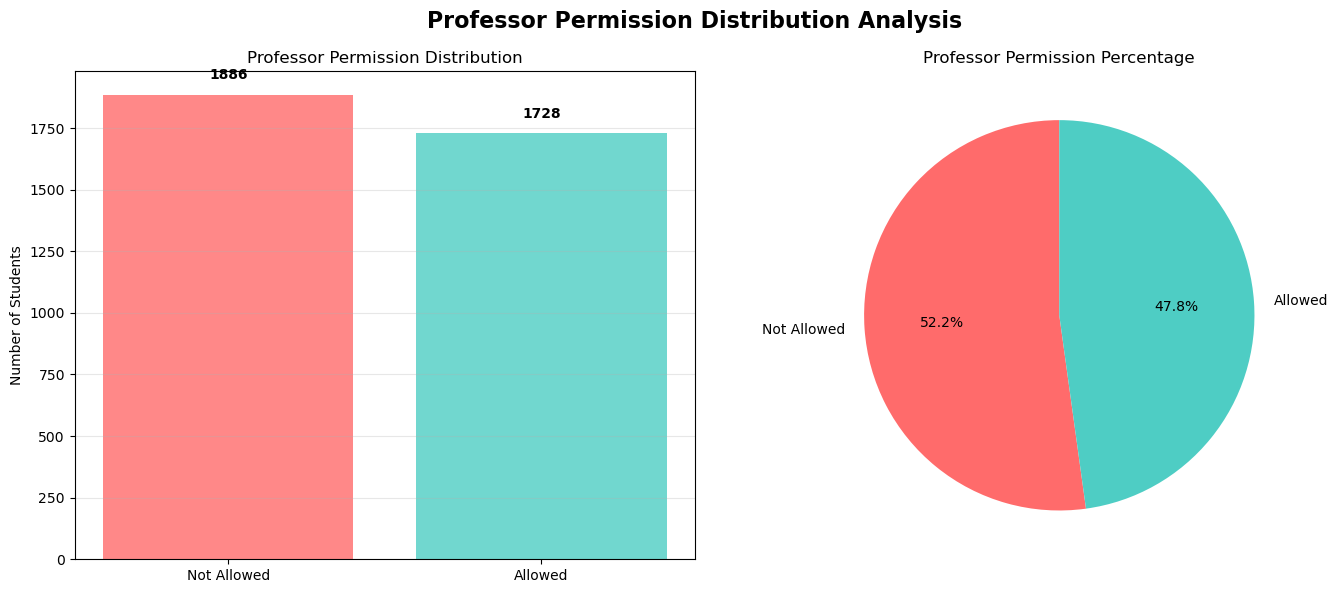


💡 INSTITUTIONAL INSIGHTS:
   📊 This represents institutional policy perspectives
   🎓 Faculty acceptance of AI tool usage
   📈 Binary classification problem for policy analysis
   💼 Key for understanding institutional adoption patterns


In [86]:
# 🎓 PROFESSOR PERMISSION BINARY CLASSIFICATION ANALYSIS
print("=" * 80)
print("🎓 PROFESSOR PERMISSION BINARY CLASSIFICATION ANALYSIS")
print("=" * 80)

# 1. Data Preparation
print("\n📊 TARGET VARIABLE ANALYSIS")
print("-" * 50)

# Check if Do_Professors_Allow_Use_encoded exists in the data
if 'Do_Professors_Allow_Use_encoded' not in data.columns:
    print("❌ Do_Professors_Allow_Use_encoded column not found in data")
    print("Available columns:", data.columns.tolist())
else:
    target_col = 'Do_Professors_Allow_Use_encoded'
    
    # Target variable analysis
    print(f"🎯 Target Variable: {target_col}")
    print(f"📋 Data Type: {data[target_col].dtype}")
    print(f"📊 Total Samples: {len(data)}")
    print(f"❓ Missing Values: {data[target_col].isnull().sum()}")
    print(f"🔢 Unique Values: {sorted(data[target_col].unique())}")
    
    # Distribution analysis
    prof_permission_distribution = data[target_col].value_counts().sort_index()
    print(f"\n📈 PROFESSOR PERMISSION DISTRIBUTION:")
    print("-" * 50)
    
    total_samples = len(data)
    for value, count in prof_permission_distribution.items():
        percentage = (count / total_samples) * 100
        label = "Not Allowed" if value == 0 else "Allowed"
        print(f"   {value} ({label}): {count} samples ({percentage:.1f}%)")
    
    # Class balance analysis
    minority_class = prof_permission_distribution.min()
    majority_class = prof_permission_distribution.max()
    prof_imbalance_ratio = majority_class / minority_class
    
    print(f"\n⚖️  CLASS BALANCE ANALYSIS:")
    print(f"   Minority class: {minority_class} samples")
    print(f"   Majority class: {majority_class} samples")
    print(f"   Imbalance ratio: {prof_imbalance_ratio:.2f}")
    
    if prof_imbalance_ratio <= 1.5:
        print("   ✅ Classes are well balanced")
    elif prof_imbalance_ratio <= 3:
        print("   ⚠️  Moderate class imbalance")
    else:
        print("   ❌ Significant class imbalance - consider balancing techniques")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Professor Permission Distribution Analysis', fontsize=16, fontweight='bold')
    
    # Bar chart
    labels = ['Not Allowed', 'Allowed']
    counts = [prof_permission_distribution[0], prof_permission_distribution[1]]
    colors = ['#FF6B6B', '#4ECDC4']
    
    bars = axes[0].bar(labels, counts, color=colors, alpha=0.8)
    axes[0].set_title('Professor Permission Distribution')
    axes[0].set_ylabel('Number of Students')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    percentages = [count/total_samples*100 for count in counts]
    axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Professor Permission Percentage')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 INSTITUTIONAL INSIGHTS:")
    print(f"   📊 This represents institutional policy perspectives")
    print(f"   🎓 Faculty acceptance of AI tool usage")
    print(f"   📈 Binary classification problem for policy analysis")
    print(f"   💼 Key for understanding institutional adoption patterns")

In [87]:
# 🔄 DATA SETUP FOR PROFESSOR PERMISSION CLASSIFICATION
print("=" * 80)
print("🔄 PROFESSOR PERMISSION CLASSIFICATION DATA SETUP")
print("=" * 80)

# Prepare features and target
if 'Do_Professors_Allow_Use_encoded' in data.columns:
    # Create feature matrix (all columns except target)
    target_col = 'Do_Professors_Allow_Use_encoded'
    feature_cols = [col for col in data.columns if col != target_col]
    
    X_prof = data[feature_cols].copy()
    y_prof = data[target_col].copy()
    
    print(f"🎯 Target Variable: {target_col}")
    print(f"📊 Number of Features: {len(feature_cols)}")
    print(f"📋 Target Classes: {sorted(y_prof.unique())} (0=Not Allowed, 1=Allowed)")
    print(f"📊 Dataset Shape: {X_prof.shape}")
    
    # Check for missing values
    missing_features = X_prof.isnull().sum()
    if missing_features.sum() > 0:
        print(f"\n⚠️  Missing values found:")
        for col, missing_count in missing_features[missing_features > 0].items():
            print(f"   {col}: {missing_count} missing values")
    else:
        print("✅ No missing values in features")
    
    # Display feature columns
    print(f"\n📋 FEATURE COLUMNS:")
    for i, col in enumerate(feature_cols, 1):
        print(f"   {i:2d}. {col}")
    
    # Train-test split with stratification
    X_train_prof, X_test_prof, y_train_prof, y_test_prof = train_test_split(
        X_prof, y_prof, test_size=0.2, random_state=42, stratify=y_prof
    )
    
    print(f"\n🔄 STRATIFIED TRAIN-TEST SPLIT:")
    print(f"   Training set: {len(X_train_prof)} samples")
    print(f"   Test set: {len(X_test_prof)} samples")
    
    # Verify stratification
    print(f"\n📊 CLASS DISTRIBUTION VERIFICATION:")
    train_dist = y_train_prof.value_counts(normalize=True).sort_index()
    test_dist = y_test_prof.value_counts(normalize=True).sort_index()
    original_dist = y_prof.value_counts(normalize=True).sort_index()
    
    print(f"   Original distribution:")
    for cls, prop in original_dist.items():
        label = "Not Allowed" if cls == 0 else "Allowed"
        print(f"      Class {cls} ({label}): {prop:.3f}")
    
    print(f"   Training set distribution:")
    for cls, prop in train_dist.items():
        label = "Not Allowed" if cls == 0 else "Allowed"
        print(f"      Class {cls} ({label}): {prop:.3f}")
    
    print(f"   Test set distribution:")
    for cls, prop in test_dist.items():
        label = "Not Allowed" if cls == 0 else "Allowed"
        print(f"      Class {cls} ({label}): {prop:.3f}")
    
else:
    print("❌ Cannot proceed: Do_Professors_Allow_Use_encoded column not found")

🔄 PROFESSOR PERMISSION CLASSIFICATION DATA SETUP
🎯 Target Variable: Do_Professors_Allow_Use_encoded
📊 Number of Features: 29
📋 Target Classes: [0, 1] (0=Not Allowed, 1=Allowed)
📊 Dataset Shape: (3614, 29)
✅ No missing values in features

📋 FEATURE COLUMNS:
    1. Year_of_Study
    2. Daily_Usage_Hours
    3. Trust_in_AI_Tools
    4. Impact_on_Grades
    5. Awareness_Level
    6. uses_coding_help
    7. uses_project_work
    8. uses_exam_preparation
    9. uses_doubt_solving
   10. uses_content_writing
   11. uses_learning_new_topics
   12. ai_tool_bard
   13. ai_tool_chatgpt
   14. ai_tool_claude
   15. ai_tool_copilot
   16. ai_tool_gemini
   17. ai_tool_midjourney
   18. ai_tool_other
   19. preferred_ai_tool_Bard
   20. preferred_ai_tool_ChatGPT
   21. preferred_ai_tool_Claude
   22. preferred_ai_tool_Copilot
   23. preferred_ai_tool_Gemini
   24. preferred_ai_tool_Other
   25. device_used_Tablet
   26. internet_access_High
   27. internet_access_Medium
   28. Willing_to_Pay_for_Acc

In [88]:
# 🔧 FEATURE SCALING FOR PROFESSOR PERMISSION CLASSIFICATION
print("=" * 80)
print("🔧 FEATURE SCALING FOR PROFESSOR PERMISSION CLASSIFICATION")
print("=" * 80)

if 'Do_Professors_Allow_Use_encoded' in data.columns:
    # Identify binary/categorical and continuous features
    binary_cols_prof = []
    continuous_cols_prof = []
    
    for col in X_train_prof.columns:
        unique_vals = X_train_prof[col].nunique()
        if unique_vals == 2 and set(X_train_prof[col].unique()).issubset({0, 1}):
            binary_cols_prof.append(col)
        elif unique_vals > 2:
            continuous_cols_prof.append(col)
    
    print(f"📊 Binary/One-hot columns: {len(binary_cols_prof)} (no scaling needed)")
    print(f"📊 Continuous columns: {len(continuous_cols_prof)} (will be scaled)")
    
    if len(binary_cols_prof) > 0:
        print(f"   Binary columns: {binary_cols_prof}")
    if len(continuous_cols_prof) > 0:
        print(f"   Continuous columns: {continuous_cols_prof}")
    
    # Apply selective scaling
    X_train_prof_scaled = X_train_prof.copy()
    X_test_prof_scaled = X_test_prof.copy()
    
    if len(continuous_cols_prof) > 0:
        print(f"\n🔧 Scaling {len(continuous_cols_prof)} continuous features...")
        
        # Initialize scaler
        prof_scaler = StandardScaler()
        
        # Scale continuous features
        X_train_prof_scaled[continuous_cols_prof] = prof_scaler.fit_transform(X_train_prof[continuous_cols_prof])
        X_test_prof_scaled[continuous_cols_prof] = prof_scaler.transform(X_test_prof[continuous_cols_prof])
        
        print("✅ Selective scaling completed for professor permission classification")
        
        # Display scaling statistics
        print(f"\n📊 SCALING STATISTICS:")
        for col in continuous_cols_prof:
            original_mean = X_train_prof[col].mean()
            original_std = X_train_prof[col].std()
            scaled_mean = X_train_prof_scaled[col].mean()
            scaled_std = X_train_prof_scaled[col].std()
            
            print(f"   {col}:")
            print(f"      Original: mean={original_mean:.3f}, std={original_std:.3f}")
            print(f"      Scaled:   mean={scaled_mean:.3f}, std={scaled_std:.3f}")
    else:
        print("ℹ️  No continuous features found - no scaling needed")
        prof_scaler = None
    
else:
    print("❌ Cannot proceed: Do_Professors_Allow_Use_encoded column not found")

🔧 FEATURE SCALING FOR PROFESSOR PERMISSION CLASSIFICATION
📊 Binary/One-hot columns: 23 (no scaling needed)
📊 Continuous columns: 6 (will be scaled)
   Binary columns: ['uses_coding_help', 'uses_project_work', 'uses_exam_preparation', 'uses_doubt_solving', 'uses_content_writing', 'uses_learning_new_topics', 'ai_tool_bard', 'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot', 'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other', 'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT', 'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot', 'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other', 'device_used_Tablet', 'internet_access_High', 'internet_access_Medium', 'Willing_to_Pay_for_Access_encoded']
   Continuous columns: ['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Awareness_Level', 'Daily_Usage_Category']

🔧 Scaling 6 continuous features...
✅ Selective scaling completed for professor permission classification

📊 SCALING STATISTICS:
   Year_of_S

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

In [90]:
# 🤖 PROFESSOR PERMISSION BINARY CLASSIFICATION MODELING
print("=" * 80)
print("🤖 PROFESSOR PERMISSION BINARY CLASSIFICATION MODELING")
print("=" * 80)

if 'Do_Professors_Allow_Use_encoded' in data.columns:
    # Define binary classification models
    prof_models = {
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'needs_scaling': True,
            'description': 'Linear probabilistic classifier'
        },
        'Random Forest': {
            'model': RandomForestClassifier(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'description': 'Tree-based ensemble classifier'
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'needs_scaling': False,
            'description': 'Boosted tree ensemble'
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'needs_scaling': False,
            'description': 'Single decision tree'
        },
        'Support Vector Machine': {
            'model': SVC(random_state=42, probability=True),
            'needs_scaling': True,
            'description': 'Support vector classifier'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(n_neighbors=5),
            'needs_scaling': True,
            'description': 'Distance-based classifier'
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'needs_scaling': False,
            'description': 'Probabilistic classifier'
        },
        'XGBoost': {
            'model': XGBClassifier(random_state=42, eval_metric='logloss'),
            'needs_scaling': False,
            'description': 'Extreme gradient boosting'
        }
    }
    
    
    prof_classification_results = {}
    
    print("🚀 TRAINING BINARY CLASSIFICATION MODELS...")
    print("=" * 60)
    
    for model_name, config in prof_models.items():
        print(f"\n🔧 Training {model_name}...")
        print(f"   Description: {config['description']}")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_prof_scaled, X_test_prof_scaled
        else:
            X_tr, X_te = X_train_prof, X_test_prof
        
        # Train model
        model = config['model']
        
        try:
            # Train the model
            model.fit(X_tr, y_train_prof)
            
            # Make predictions
            y_pred_train = model.predict(X_tr)
            y_pred_test = model.predict(X_te)
            
            # Probability predictions (if supported)
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_te)[:, 1]  # Probability of class 1
            else:
                y_pred_proba = None
            
            # Calculate comprehensive metrics
            train_accuracy = accuracy_score(y_train_prof, y_pred_train)
            test_accuracy = accuracy_score(y_test_prof, y_pred_test)
            precision = precision_score(y_test_prof, y_pred_test, zero_division=0)
            recall = recall_score(y_test_prof, y_pred_test, zero_division=0)
            f1 = f1_score(y_test_prof, y_pred_test, zero_division=0)
            balanced_acc = balanced_accuracy_score(y_test_prof, y_pred_test)
            
            # ROC AUC (if probabilities available)
            if y_pred_proba is not None:
                roc_auc = roc_auc_score(y_test_prof, y_pred_proba)
            else:
                roc_auc = None
            
            # Cross-validation
            cv_scores = cross_val_score(model, X_tr, y_train_prof, 
                                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                                       scoring='accuracy')
            
            # Calculate overfitting
            overfitting = train_accuracy - test_accuracy
            
            # Store results
            prof_classification_results[model_name] = {
                'model': model,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'balanced_accuracy': balanced_acc,
                'roc_auc': roc_auc,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'overfitting': overfitting,
                'used_scaling': config['needs_scaling'],
                'predictions': y_pred_test,
                'probabilities': y_pred_proba
            }
            
            # Print results
            print(f"   📊 Train Accuracy: {train_accuracy:.4f}")
            print(f"   📊 Test Accuracy:  {test_accuracy:.4f}")
            print(f"   📊 Precision:      {precision:.4f}")
            print(f"   📊 Recall:         {recall:.4f}")
            print(f"   📊 F1 Score:       {f1:.4f}")
            print(f"   📊 Balanced Acc:   {balanced_acc:.4f}")
            if roc_auc is not None:
                print(f"   📊 ROC AUC:        {roc_auc:.4f}")
            print(f"   📊 CV Accuracy:    {cv_scores.mean():.4f}±{cv_scores.std():.4f}")
            print(f"   📊 Overfitting:    {overfitting:.4f}")
            
        except Exception as e:
            print(f"   ❌ Error training {model_name}: {e}")
            prof_classification_results[model_name] = {
                'model': None,
                'train_accuracy': 0,
                'test_accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0,
                'balanced_accuracy': 0,
                'roc_auc': 0,
                'cv_mean': 0,
                'cv_std': 0,
                'overfitting': 0,
                'used_scaling': config['needs_scaling'],
                'predictions': None,
                'probabilities': None,
                'error': str(e)
            }
    
    # Sort models by F1 score (good metric for binary classification)
    prof_sorted_models = sorted(prof_classification_results.items(), 
                               key=lambda x: x[1]['f1_score'], 
                               reverse=True)
    
    print("\n" + "=" * 80)
    print("🏆 PROFESSOR PERMISSION CLASSIFICATION RESULTS SUMMARY")
    print("=" * 80)
    
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'ROC AUC':<10}")
    print("-" * 80)
    
    for model_name, metrics in prof_sorted_models:
        accuracy = metrics['test_accuracy']
        precision = metrics['precision']
        recall = metrics['recall']
        f1 = metrics['f1_score']
        roc_auc = metrics['roc_auc'] if metrics['roc_auc'] is not None else 0
        
        print(f"{model_name:<20} {accuracy:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {roc_auc:<10.4f}")
    
    print(f"\n🏆 BEST PERFORMING MODELS:")
    for i, (model_name, metrics) in enumerate(prof_sorted_models[:3], 1):
        print(f"   {i}. {model_name}: F1={metrics['f1_score']:.4f}, Accuracy={metrics['test_accuracy']:.4f}")
    
else:
    print("❌ Cannot proceed: Do_Professors_Allow_Use_encoded column not found")

🤖 PROFESSOR PERMISSION BINARY CLASSIFICATION MODELING
🚀 TRAINING BINARY CLASSIFICATION MODELS...

🔧 Training Logistic Regression...
   Description: Linear probabilistic classifier
   Scaling: Yes
   📊 Train Accuracy: 0.5787
   📊 Test Accuracy:  0.5795
   📊 Precision:      0.5755
   📊 Recall:         0.4624
   📊 F1 Score:       0.5128
   📊 Balanced Acc:   0.5747
   📊 ROC AUC:        0.5891
   📊 CV Accuracy:    0.5521±0.0177
   📊 Overfitting:    -0.0008

🔧 Training Random Forest...
   Description: Tree-based ensemble classifier
   Scaling: No
   📊 Train Accuracy: 1.0000
   📊 Test Accuracy:  0.8091
   📊 Precision:      0.8230
   📊 Recall:         0.7659
   📊 F1 Score:       0.7934
   📊 Balanced Acc:   0.8074
   📊 ROC AUC:        0.9230
   📊 CV Accuracy:    0.7593±0.0226
   📊 Overfitting:    0.1909

🔧 Training Gradient Boosting...
   Description: Boosted tree ensemble
   Scaling: No
   📊 Train Accuracy: 0.7260
   📊 Test Accuracy:  0.6556
   📊 Precision:      0.6655
   📊 Recall:         0.5

📊 PROFESSOR PERMISSION CLASSIFICATION VISUALIZATION & ANALYSIS


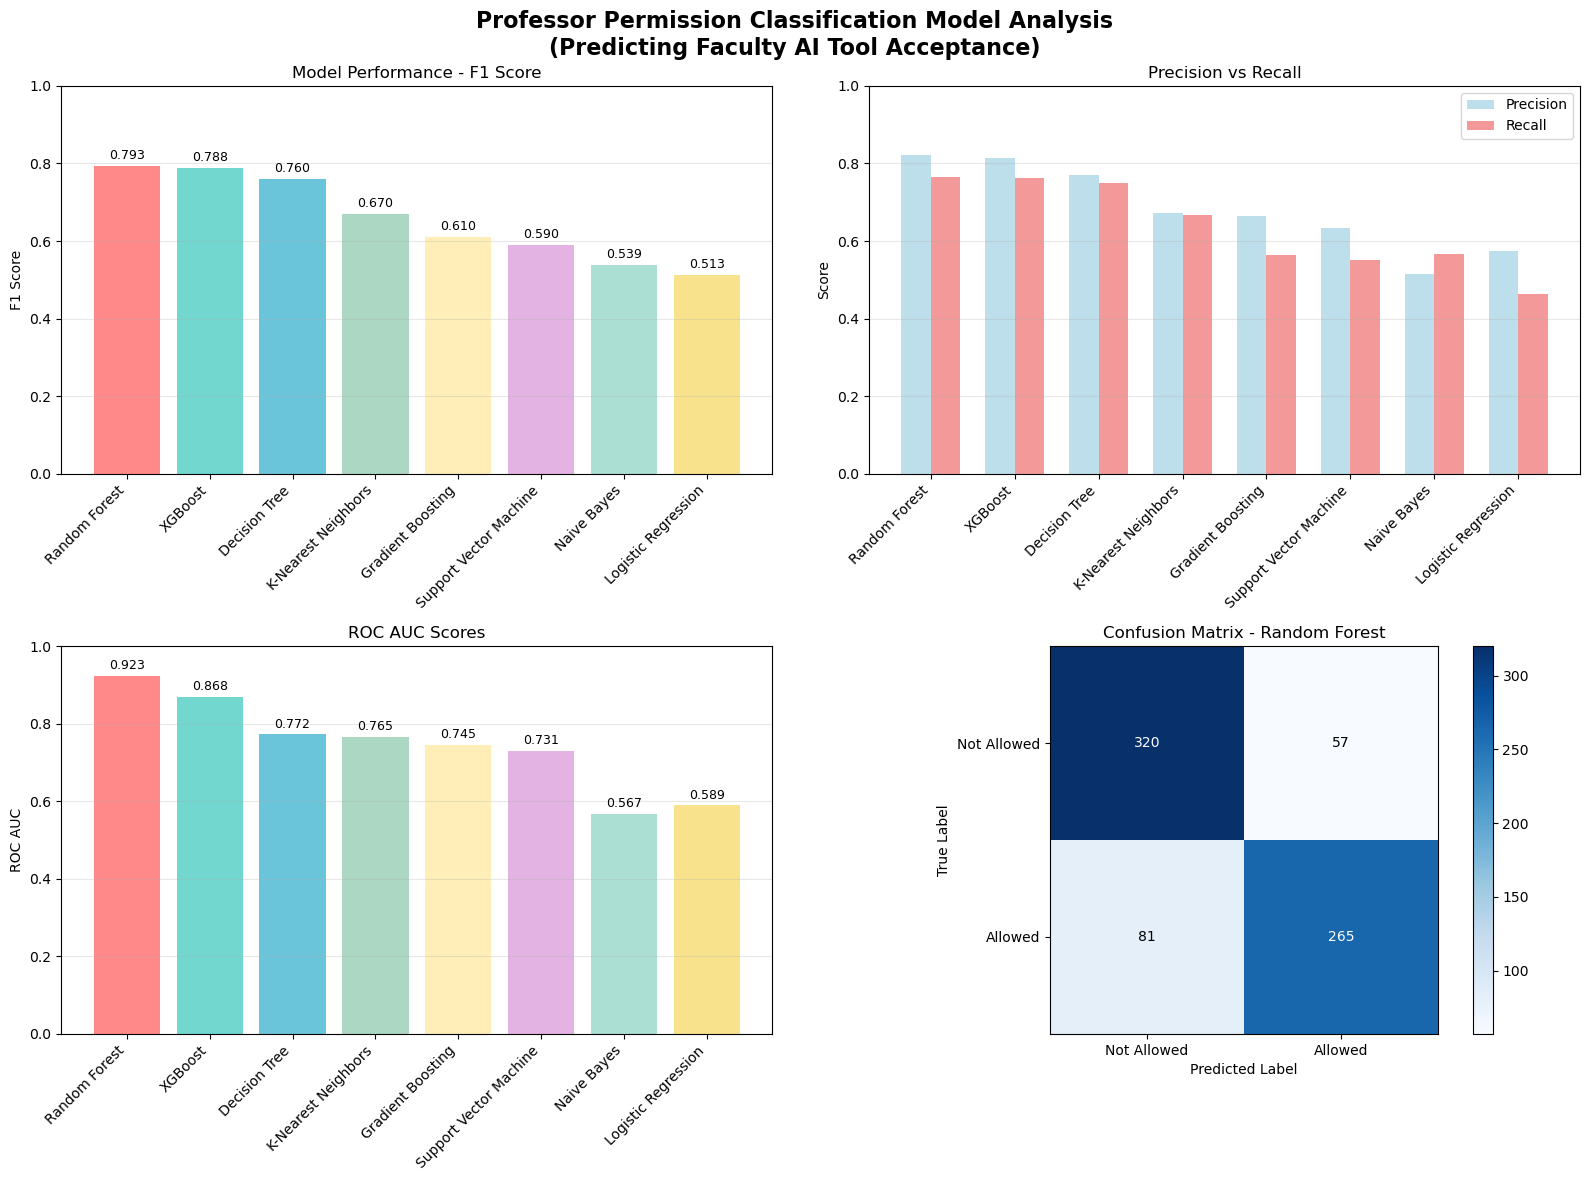


💡 PROFESSOR PERMISSION CLASSIFICATION INSIGHTS
🏆 BEST MODEL: Random Forest
   📊 F1 Score: 0.7934
   📊 Accuracy: 0.8091
   📊 Precision: 0.8230
   📊 Recall: 0.7659
   📊 ROC AUC: 0.9230

🔍 CONFUSION MATRIX INTERPRETATION:
   True Negatives (Correctly predicted 'Not Allowed'): 320
   False Positives (Incorrectly predicted 'Allowed'): 57
   False Negatives (Incorrectly predicted 'Not Allowed'): 81
   True Positives (Correctly predicted 'Allowed'): 265

📈 PERFORMANCE METRICS:
   Specificity (True Negative Rate): 0.8488
   Sensitivity (True Positive Rate): 0.7659
   Precision (Positive Predictive Value): 0.8230
   Recall (Sensitivity): 0.7659

🎓 INSTITUTIONAL INSIGHTS:
   📊 This model predicts faculty acceptance of AI tools
   🎯 Can identify student characteristics that influence professor decisions
   📈 Useful for understanding institutional adoption patterns
   💼 Helps in policy development and faculty training

🚀 BUSINESS APPLICATIONS:
   📊 Faculty Training: Identify factors that influenc

In [91]:
# 📊 PROFESSOR PERMISSION CLASSIFICATION VISUALIZATION & ANALYSIS
print("=" * 80)
print("📊 PROFESSOR PERMISSION CLASSIFICATION VISUALIZATION & ANALYSIS")
print("=" * 80)

if 'Do_Professors_Allow_Use_encoded' in data.columns and prof_classification_results:
    
    # Create comprehensive performance visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Professor Permission Classification Model Analysis\n(Predicting Faculty AI Tool Acceptance)', 
                 fontsize=16, fontweight='bold')
    
    # Extract data for plotting
    model_names = [name for name, metrics in prof_sorted_models if metrics['model'] is not None]
    accuracies = [metrics['test_accuracy'] for name, metrics in prof_sorted_models if metrics['model'] is not None]
    f1_scores = [metrics['f1_score'] for name, metrics in prof_sorted_models if metrics['model'] is not None]
    precisions = [metrics['precision'] for name, metrics in prof_sorted_models if metrics['model'] is not None]
    recalls = [metrics['recall'] for name, metrics in prof_sorted_models if metrics['model'] is not None]
    roc_aucs = [metrics['roc_auc'] for name, metrics in prof_sorted_models if metrics['model'] is not None and metrics['roc_auc'] is not None]
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']
    
    # 1. Model Performance - F1 Score
    if f1_scores:
        bars = axes[0, 0].bar(range(len(model_names)), f1_scores, color=colors[:len(model_names)], alpha=0.8)
        axes[0, 0].set_title('Model Performance - F1 Score')
        axes[0, 0].set_ylabel('F1 Score')
        axes[0, 0].set_xticks(range(len(model_names)))
        axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0, 0].grid(axis='y', alpha=0.3)
        axes[0, 0].set_ylim(0, 1)
        
        # Add value labels
        for i, (bar, f1) in enumerate(zip(bars, f1_scores)):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{f1:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 2. Precision vs Recall
    if precisions and recalls:
        x = np.arange(len(model_names))
        width = 0.35
        
        axes[0, 1].bar(x - width/2, precisions, width, label='Precision', alpha=0.8, color='lightblue')
        axes[0, 1].bar(x + width/2, recalls, width, label='Recall', alpha=0.8, color='lightcoral')
        axes[0, 1].set_title('Precision vs Recall')
        axes[0, 1].set_ylabel('Score')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0, 1].legend()
        axes[0, 1].grid(axis='y', alpha=0.3)
        axes[0, 1].set_ylim(0, 1)
    
    # 3. ROC AUC Scores (if available)
    if roc_aucs:
        roc_names = [name for name, metrics in prof_sorted_models if metrics['model'] is not None and metrics['roc_auc'] is not None]
        bars = axes[1, 0].bar(range(len(roc_names)), roc_aucs, 
                             color=colors[:len(roc_names)], alpha=0.8)
        axes[1, 0].set_title('ROC AUC Scores')
        axes[1, 0].set_ylabel('ROC AUC')
        axes[1, 0].set_xticks(range(len(roc_names)))
        axes[1, 0].set_xticklabels(roc_names, rotation=45, ha='right')
        axes[1, 0].grid(axis='y', alpha=0.3)
        axes[1, 0].set_ylim(0, 1)
        
        # Add value labels
        for i, (bar, auc) in enumerate(zip(bars, roc_aucs)):
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{auc:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 4. Confusion Matrix for Best Model
    if prof_sorted_models and prof_sorted_models[0][1]['predictions'] is not None:
        best_model_name, best_metrics = prof_sorted_models[0]
        cm = confusion_matrix(y_test_prof, best_metrics['predictions'])
        
        im = axes[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axes[1, 1].set_title(f'Confusion Matrix - {best_model_name}')
        
        # Add labels
        class_names = ['Not Allowed', 'Allowed']
        tick_marks = np.arange(len(class_names))
        axes[1, 1].set_xticks(tick_marks)
        axes[1, 1].set_yticks(tick_marks)
        axes[1, 1].set_xticklabels(class_names)
        axes[1, 1].set_yticklabels(class_names)
        
        # Add text annotations
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            axes[1, 1].text(j, i, format(cm[i, j], 'd'),
                           ha="center", va="center",
                           color="white" if cm[i, j] > thresh else "black")
        
        axes[1, 1].set_ylabel('True Label')
        axes[1, 1].set_xlabel('Predicted Label')
        
        # Add colorbar
        plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    # Business insights and interpretation
    print("\n" + "=" * 80)
    print("💡 PROFESSOR PERMISSION CLASSIFICATION INSIGHTS")
    print("=" * 80)
    
    if prof_sorted_models:
        best_model_name, best_metrics = prof_sorted_models[0]
        
        print(f"🏆 BEST MODEL: {best_model_name}")
        print(f"   📊 F1 Score: {best_metrics['f1_score']:.4f}")
        print(f"   📊 Accuracy: {best_metrics['test_accuracy']:.4f}")
        print(f"   📊 Precision: {best_metrics['precision']:.4f}")
        print(f"   📊 Recall: {best_metrics['recall']:.4f}")
        if best_metrics['roc_auc'] is not None:
            print(f"   📊 ROC AUC: {best_metrics['roc_auc']:.4f}")
        
        # Interpret the confusion matrix
        if best_metrics['predictions'] is not None:
            cm = confusion_matrix(y_test_prof, best_metrics['predictions'])
            tn, fp, fn, tp = cm.ravel()
            
            print(f"\n🔍 CONFUSION MATRIX INTERPRETATION:")
            print(f"   True Negatives (Correctly predicted 'Not Allowed'): {tn}")
            print(f"   False Positives (Incorrectly predicted 'Allowed'): {fp}")
            print(f"   False Negatives (Incorrectly predicted 'Not Allowed'): {fn}")
            print(f"   True Positives (Correctly predicted 'Allowed'): {tp}")
            
            # Calculate rates
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            
            print(f"\n📈 PERFORMANCE METRICS:")
            print(f"   Specificity (True Negative Rate): {specificity:.4f}")
            print(f"   Sensitivity (True Positive Rate): {sensitivity:.4f}")
            print(f"   Precision (Positive Predictive Value): {best_metrics['precision']:.4f}")
            print(f"   Recall (Sensitivity): {best_metrics['recall']:.4f}")
    
    print(f"\n🎓 INSTITUTIONAL INSIGHTS:")
    print(f"   📊 This model predicts faculty acceptance of AI tools")
    print(f"   🎯 Can identify student characteristics that influence professor decisions")
    print(f"   📈 Useful for understanding institutional adoption patterns")
    print(f"   💼 Helps in policy development and faculty training")
    
    print(f"\n🚀 BUSINESS APPLICATIONS:")
    print(f"   📊 Faculty Training: Identify factors that influence acceptance")
    print(f"   🎯 Student Guidance: Understand what makes professors more receptive")
    print(f"   📈 Policy Development: Data-driven institutional AI policies")
    print(f"   💡 Change Management: Targeted approaches for different faculty groups")
    
else:
    print("❌ Cannot create visualization: Missing data or results")

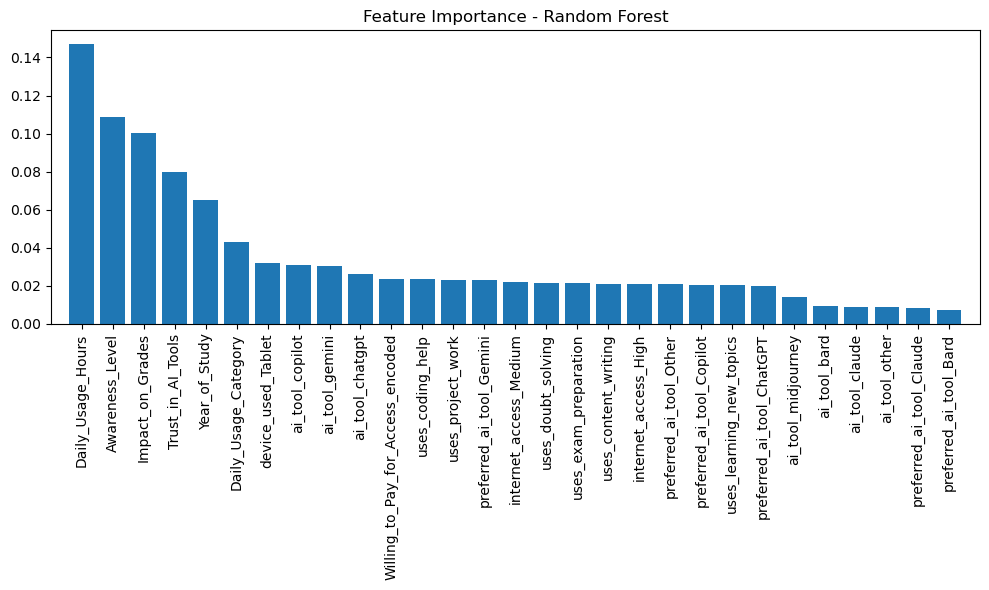

In [92]:
# draw a plot to show feature importancce
import matplotlib.pyplot as plt
def plot_feature_importance(model, feature_names, title='Feature Importance'):
    """
    Plot feature importance for a given model.
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        print("Model does not have feature importances or coefficients.")
        return
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.tight_layout()
    plt.show()

# Ensure matplotlib is available for plotting
if 'Do_Professors_Allow_Use_encoded' in data.columns and prof_classification_results:
    # Plot feature importance for the best model
    best_model_name, best_metrics = prof_sorted_models[0]
    best_model = best_metrics['model']
    
    if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
        plot_feature_importance(best_model, X_train_prof.columns, title=f'Feature Importance - {best_model_name}')
    else:
        print(f"⚠️  Cannot plot feature importance for {best_model_name}: Model does not support it.")

# 💳 Payment Willingness Binary Classification

This section focuses on building binary classification models to predict whether students are willing to pay for access to AI tools (`Willing_to_Pay_for_Access_encoded`). This is a crucial business metric for understanding monetization potential and market acceptance.

## Key Objectives:
- Predict payment willingness based on student characteristics and usage patterns
- Identify factors that influence payment decisions
- Provide business insights for pricing and marketing strategies
- Support revenue modeling and customer segmentation

💳 PAYMENT WILLINGNESS BINARY CLASSIFICATION ANALYSIS

📊 TARGET VARIABLE ANALYSIS
--------------------------------------------------
🎯 Target Variable: Willing_to_Pay_for_Access_encoded
📋 Data Type: int64
📊 Total Samples: 3614
❓ Missing Values: 0
🔢 Unique Values: [0, 1]

📈 PAYMENT WILLINGNESS DISTRIBUTION:
--------------------------------------------------
   0 (Won't Pay): 1811 samples (50.1%)
   1 (Will Pay): 1803 samples (49.9%)

⚖️  CLASS BALANCE ANALYSIS:
   Minority class: 1803 samples
   Majority class: 1811 samples
   Imbalance ratio: 1.00
   ✅ Classes are well balanced


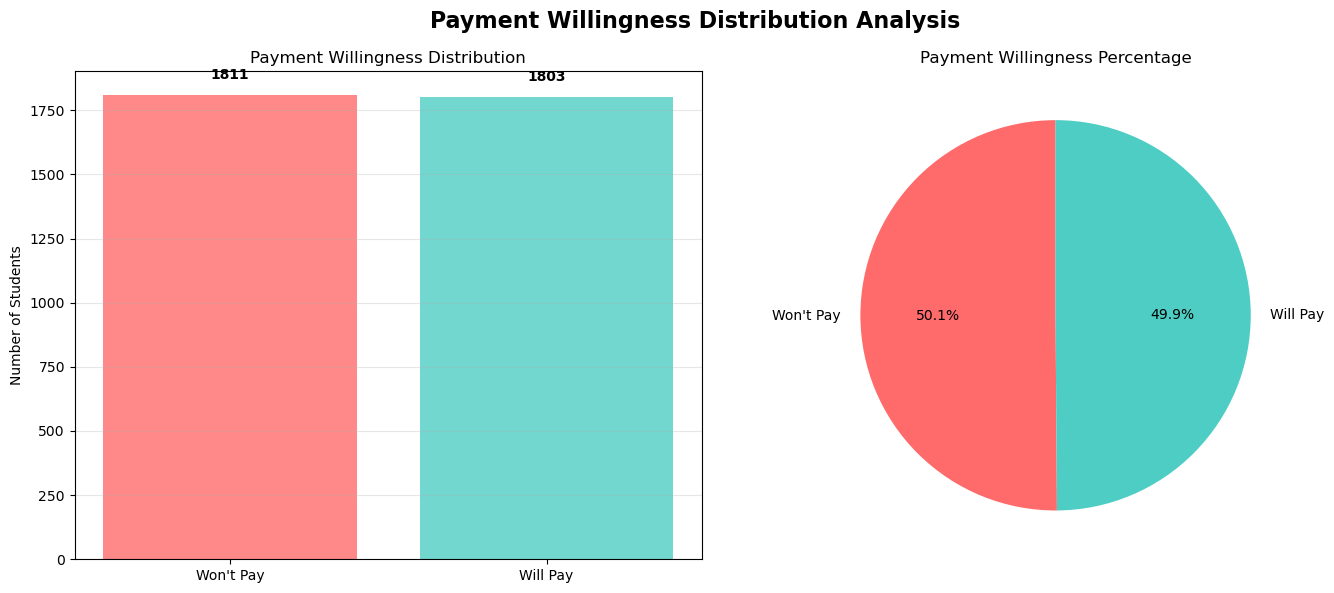


💡 BUSINESS INSIGHTS:
   📊 This represents market monetization potential
   💰 Critical for revenue forecasting and pricing strategies
   📈 Binary classification problem for business analysis
   🎯 Key for understanding customer willingness to pay


In [93]:
# 📊 PAYMENT WILLINGNESS BINARY CLASSIFICATION DATA EXPLORATION
print("=" * 80)
print("💳 PAYMENT WILLINGNESS BINARY CLASSIFICATION ANALYSIS")
print("=" * 80)

# Check if target variable exists
if 'Willing_to_Pay_for_Access_encoded' in data.columns:
    payment_target = 'Willing_to_Pay_for_Access_encoded'
    
    print(f"\n📊 TARGET VARIABLE ANALYSIS")
    print("-" * 50)
    print(f"🎯 Target Variable: {payment_target}")
    print(f"📋 Data Type: {data[payment_target].dtype}")
    print(f"📊 Total Samples: {len(data)}")
    print(f"❓ Missing Values: {data[payment_target].isnull().sum()}")
    print(f"🔢 Unique Values: {sorted(data[payment_target].unique())}")
    
    # Analyze class distribution
    payment_willingness_distribution = data[payment_target].value_counts().sort_index()
    total_samples = len(data)
    
    print(f"\n📈 PAYMENT WILLINGNESS DISTRIBUTION:")
    print("-" * 50)
    for value, count in payment_willingness_distribution.items():
        percentage = (count / total_samples) * 100
        label = "Won't Pay" if value == 0 else "Will Pay"
        print(f"   {value} ({label}): {count} samples ({percentage:.1f}%)")
    
    # Class imbalance analysis
    print(f"\n⚖️  CLASS BALANCE ANALYSIS:")
    minority_class = payment_willingness_distribution.min()
    majority_class = payment_willingness_distribution.max()
    payment_imbalance_ratio = majority_class / minority_class
    
    print(f"   Minority class: {minority_class} samples")
    print(f"   Majority class: {majority_class} samples")
    print(f"   Imbalance ratio: {payment_imbalance_ratio:.2f}")
    
    if payment_imbalance_ratio <= 1.5:
        print("   ✅ Classes are well balanced")
    elif payment_imbalance_ratio <= 3:
        print("   ⚠️  Moderate class imbalance")
    else:
        print("   ❌ Significant class imbalance - consider balancing techniques")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Payment Willingness Distribution Analysis', fontsize=16, fontweight='bold')
    
    # Bar chart
    labels = ["Won't Pay", "Will Pay"]
    counts = [payment_willingness_distribution[0], payment_willingness_distribution[1]]
    colors = ['#FF6B6B', '#4ECDC4']
    
    bars = axes[0].bar(labels, counts, color=colors, alpha=0.8)
    axes[0].set_title('Payment Willingness Distribution')
    axes[0].set_ylabel('Number of Students')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    percentages = [count/total_samples*100 for count in counts]
    axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Payment Willingness Percentage')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 BUSINESS INSIGHTS:")
    print(f"   📊 This represents market monetization potential")
    print(f"   💰 Critical for revenue forecasting and pricing strategies")
    print(f"   📈 Binary classification problem for business analysis")
    print(f"   🎯 Key for understanding customer willingness to pay")
    
else:
    print("❌ Cannot proceed: Willing_to_Pay_for_Access_encoded column not found")

In [94]:
# 🔄 DATA SETUP FOR PAYMENT WILLINGNESS CLASSIFICATION
print("=" * 80)
print("🔄 PAYMENT WILLINGNESS CLASSIFICATION DATA SETUP")
print("=" * 80)

# Prepare features and target
if 'Willing_to_Pay_for_Access_encoded' in data.columns:
    # Create feature matrix (all columns except target)
    payment_target_col = 'Willing_to_Pay_for_Access_encoded'
    payment_feature_cols = [col for col in data.columns if col != payment_target_col]
    
    X_payment = data[payment_feature_cols].copy()
    y_payment = data[payment_target_col].copy()
    
    print(f"🎯 Target Variable: {payment_target_col}")
    print(f"📊 Number of Features: {len(payment_feature_cols)}")
    print(f"📋 Target Classes: {sorted(y_payment.unique())} (0=Won't Pay, 1=Will Pay)")
    print(f"📊 Dataset Shape: {X_payment.shape}")
    
    # Check for missing values
    payment_missing_features = X_payment.isnull().sum()
    if payment_missing_features.sum() > 0:
        print(f"\n⚠️  Missing values found:")
        for col, missing_count in payment_missing_features[payment_missing_features > 0].items():
            print(f"   {col}: {missing_count} missing values")
    else:
        print("✅ No missing values in features")
    
    # Display feature columns
    print(f"\n📋 FEATURE COLUMNS:")
    for i, col in enumerate(payment_feature_cols, 1):
        print(f"   {i:2d}. {col}")
    
    # Train-test split with stratification
    X_train_payment, X_test_payment, y_train_payment, y_test_payment = train_test_split(
        X_payment, y_payment, test_size=0.2, random_state=42, stratify=y_payment
    )
    
    print(f"\n🔄 STRATIFIED TRAIN-TEST SPLIT:")
    print(f"   Training set: {len(X_train_payment)} samples")
    print(f"   Test set: {len(X_test_payment)} samples")
    
    # Verify stratification
    print(f"\n📊 CLASS DISTRIBUTION VERIFICATION:")
    payment_train_dist = y_train_payment.value_counts(normalize=True).sort_index()
    payment_test_dist = y_test_payment.value_counts(normalize=True).sort_index()
    payment_original_dist = y_payment.value_counts(normalize=True).sort_index()
    
    print(f"   Original distribution:")
    for cls, prop in payment_original_dist.items():
        label = "Won't Pay" if cls == 0 else "Will Pay"
        print(f"      Class {cls} ({label}): {prop:.3f}")
    
    print(f"   Training set distribution:")
    for cls, prop in payment_train_dist.items():
        label = "Won't Pay" if cls == 0 else "Will Pay"
        print(f"      Class {cls} ({label}): {prop:.3f}")
    
    print(f"   Test set distribution:")
    for cls, prop in payment_test_dist.items():
        label = "Won't Pay" if cls == 0 else "Will Pay"
        print(f"      Class {cls} ({label}): {prop:.3f}")
    
else:
    print("❌ Cannot proceed: Willing_to_Pay_for_Access_encoded column not found")

🔄 PAYMENT WILLINGNESS CLASSIFICATION DATA SETUP
🎯 Target Variable: Willing_to_Pay_for_Access_encoded
📊 Number of Features: 29
📋 Target Classes: [0, 1] (0=Won't Pay, 1=Will Pay)
📊 Dataset Shape: (3614, 29)
✅ No missing values in features

📋 FEATURE COLUMNS:
    1. Year_of_Study
    2. Daily_Usage_Hours
    3. Trust_in_AI_Tools
    4. Impact_on_Grades
    5. Awareness_Level
    6. uses_coding_help
    7. uses_project_work
    8. uses_exam_preparation
    9. uses_doubt_solving
   10. uses_content_writing
   11. uses_learning_new_topics
   12. ai_tool_bard
   13. ai_tool_chatgpt
   14. ai_tool_claude
   15. ai_tool_copilot
   16. ai_tool_gemini
   17. ai_tool_midjourney
   18. ai_tool_other
   19. preferred_ai_tool_Bard
   20. preferred_ai_tool_ChatGPT
   21. preferred_ai_tool_Claude
   22. preferred_ai_tool_Copilot
   23. preferred_ai_tool_Gemini
   24. preferred_ai_tool_Other
   25. device_used_Tablet
   26. internet_access_High
   27. internet_access_Medium
   28. Do_Professors_Allow_Us

In [95]:
# 🔧 FEATURE SCALING FOR PAYMENT WILLINGNESS CLASSIFICATION
print("=" * 80)
print("🔧 FEATURE SCALING FOR PAYMENT WILLINGNESS CLASSIFICATION")
print("=" * 80)

if 'Willing_to_Pay_for_Access_encoded' in data.columns:
    # Identify binary/categorical and continuous features
    binary_cols_payment = []
    continuous_cols_payment = []
    
    for col in X_train_payment.columns:
        unique_vals = X_train_payment[col].nunique()
        if unique_vals == 2 and set(X_train_payment[col].unique()).issubset({0, 1}):
            binary_cols_payment.append(col)
        elif unique_vals > 2:
            continuous_cols_payment.append(col)
    
    print(f"📊 Binary/One-hot columns: {len(binary_cols_payment)} (no scaling needed)")
    print(f"📊 Continuous columns: {len(continuous_cols_payment)} (will be scaled)")
    
    if len(binary_cols_payment) > 0:
        print(f"   Binary columns: {binary_cols_payment}")
    if len(continuous_cols_payment) > 0:
        print(f"   Continuous columns: {continuous_cols_payment}")
    
    # Apply selective scaling
    X_train_payment_scaled = X_train_payment.copy()
    X_test_payment_scaled = X_test_payment.copy()
    
    if len(continuous_cols_payment) > 0:
        print(f"\n🔧 Scaling {len(continuous_cols_payment)} continuous features...")
        
        # Initialize scaler
        payment_scaler = StandardScaler()
        
        # Scale continuous features
        X_train_payment_scaled[continuous_cols_payment] = payment_scaler.fit_transform(X_train_payment[continuous_cols_payment])
        X_test_payment_scaled[continuous_cols_payment] = payment_scaler.transform(X_test_payment[continuous_cols_payment])
        
        print("✅ Selective scaling completed for payment willingness classification")
        
        # Display scaling statistics
        print(f"\n📊 SCALING STATISTICS:")
        for col in continuous_cols_payment:
            original_mean = X_train_payment[col].mean()
            original_std = X_train_payment[col].std()
            scaled_mean = X_train_payment_scaled[col].mean()
            scaled_std = X_train_payment_scaled[col].std()
            
            print(f"   {col}:")
            print(f"      Original: mean={original_mean:.3f}, std={original_std:.3f}")
            print(f"      Scaled:   mean={scaled_mean:.3f}, std={scaled_std:.3f}")
    else:
        print("ℹ️  No continuous features found - no scaling needed")
        payment_scaler = None
    
else:
    print("❌ Cannot proceed: Willing_to_Pay_for_Access_encoded column not found")

🔧 FEATURE SCALING FOR PAYMENT WILLINGNESS CLASSIFICATION
📊 Binary/One-hot columns: 23 (no scaling needed)
📊 Continuous columns: 6 (will be scaled)
   Binary columns: ['uses_coding_help', 'uses_project_work', 'uses_exam_preparation', 'uses_doubt_solving', 'uses_content_writing', 'uses_learning_new_topics', 'ai_tool_bard', 'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot', 'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other', 'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT', 'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot', 'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other', 'device_used_Tablet', 'internet_access_High', 'internet_access_Medium', 'Do_Professors_Allow_Use_encoded']
   Continuous columns: ['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Awareness_Level', 'Daily_Usage_Category']

🔧 Scaling 6 continuous features...
✅ Selective scaling completed for payment willingness classification

📊 SCALING STATISTICS:
   Year_of_Study

In [96]:
# 🤖 PAYMENT WILLINGNESS BINARY CLASSIFICATION MODELING
print("=" * 80)
print("🤖 PAYMENT WILLINGNESS BINARY CLASSIFICATION MODELING")
print("=" * 80)

if 'Willing_to_Pay_for_Access_encoded' in data.columns:
    # Import classification libraries
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
    
    # Try to import XGBoost
    try:
        from xgboost import XGBClassifier
        xgb_available = True
    except ImportError:
        xgb_available = False
        print("⚠️  XGBoost not available - skipping XGBoost model")
    
    # Define binary classification models
    payment_models = {
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'needs_scaling': True,
            'description': 'Linear probabilistic classifier'
        },
        'Random Forest': {
            'model': RandomForestClassifier(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'description': 'Tree-based ensemble classifier'
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'needs_scaling': False,
            'description': 'Boosted tree ensemble'
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'needs_scaling': False,
            'description': 'Single decision tree'
        },
        'Support Vector Machine': {
            'model': SVC(random_state=42, probability=True),
            'needs_scaling': True,
            'description': 'Support vector classifier'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(n_neighbors=5),
            'needs_scaling': True,
            'description': 'Distance-based classifier'
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'needs_scaling': True,
            'description': 'Probabilistic Naive Bayes'
        }
    }
    
    # Add XGBoost if available
    if xgb_available:
        payment_models['XGBoost'] = {
            'model': XGBClassifier(random_state=42, eval_metric='logloss'),
            'needs_scaling': False,
            'description': 'Gradient boosting framework'
        }
    
    # Train and evaluate models
    payment_classification_results = {}
    
    print(f"🚀 Training {len(payment_models)} classification models...")
    print(f"📊 Training samples: {len(X_train_payment_scaled)}")
    print(f"📊 Test samples: {len(X_test_payment_scaled)}")
    print(f"📊 Number of features: {len(X_train_payment_scaled.columns)}")
    
    for model_name, config in payment_models.items():
        print(f"\n🔄 Training {model_name}...")
        
        # Select appropriate data (scaled or unscaled)
        if config['needs_scaling']:
            X_train_model = X_train_payment_scaled
            X_test_model = X_test_payment_scaled
        else:
            X_train_model = X_train_payment
            X_test_model = X_test_payment
        
        # Train model
        model = config['model']
        model.fit(X_train_model, y_train_payment)
        
        # Make predictions
        y_pred_train = model.predict(X_train_model)
        y_pred_test = model.predict(X_test_model)
        
        # Calculate probabilities for ROC AUC
        try:
            y_pred_proba = model.predict_proba(X_test_model)[:, 1]
            roc_auc = roc_auc_score(y_test_payment, y_pred_proba)
        except:
            roc_auc = None
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train_payment, y_pred_train)
        test_accuracy = accuracy_score(y_test_payment, y_pred_test)
        precision = precision_score(y_test_payment, y_pred_test, average='weighted')
        recall = recall_score(y_test_payment, y_pred_test, average='weighted')
        f1 = f1_score(y_test_payment, y_pred_test, average='weighted')
        
        # Calculate overfitting metric
        overfitting = train_accuracy - test_accuracy
        
        # Store results
        payment_classification_results[model_name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'overfitting': overfitting,
            'predictions': y_pred_test,
            'description': config['description']
        }
        
        # Display results
        print(f"   📊 Train Accuracy: {train_accuracy:.4f}")
        print(f"   📊 Test Accuracy: {test_accuracy:.4f}")
        print(f"   📊 Precision: {precision:.4f}")
        print(f"   📊 Recall: {recall:.4f}")
        print(f"   📊 F1 Score: {f1:.4f}")
        if roc_auc is not None:
            print(f"   📊 ROC AUC: {roc_auc:.4f}")
        print(f"   📊 Overfitting: {overfitting:.4f}")
    
    # Sort models by F1 score
    payment_sorted_models = sorted(payment_classification_results.items(), 
                                 key=lambda x: x[1]['f1_score'], reverse=True)
    
    print(f"\n🏆 MODEL RANKING (by F1 Score):")
    print("=" * 50)
    for i, (model_name, metrics) in enumerate(payment_sorted_models, 1):
        auc_str = f"{metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else 'N/A'
        print(f"{i:2d}. {model_name:20s} | F1: {metrics['f1_score']:.4f} | "
              f"Acc: {metrics['test_accuracy']:.4f} | "
              f"AUC: {auc_str}")
    
    print(f"\n✅ Payment willingness classification modeling completed!")
    print(f"🏆 Best model: {payment_sorted_models[0][0]} with F1 score: {payment_sorted_models[0][1]['f1_score']:.4f}")
    
else:
    print("❌ Cannot proceed: Willing_to_Pay_for_Access_encoded column not found")

🤖 PAYMENT WILLINGNESS BINARY CLASSIFICATION MODELING
🚀 Training 8 classification models...
📊 Training samples: 2891
📊 Test samples: 723
📊 Number of features: 29

🔄 Training Logistic Regression...
   📊 Train Accuracy: 0.5306
   📊 Test Accuracy: 0.4703
   📊 Precision: 0.4700
   📊 Recall: 0.4703
   📊 F1 Score: 0.4694
   📊 ROC AUC: 0.4576
   📊 Overfitting: 0.0603

🔄 Training Random Forest...
   📊 Train Accuracy: 0.9045
   📊 Test Accuracy: 0.4813
   📊 Precision: 0.4813
   📊 Recall: 0.4813
   📊 F1 Score: 0.4806
   📊 ROC AUC: 0.5014
   📊 Overfitting: 0.4232

🔄 Training Gradient Boosting...
   📊 Train Accuracy: 0.6645
   📊 Test Accuracy: 0.5021
   📊 Precision: 0.5021
   📊 Recall: 0.5021
   📊 F1 Score: 0.5018
   📊 ROC AUC: 0.5125
   📊 Overfitting: 0.1624

🔄 Training Decision Tree...
   📊 Train Accuracy: 0.9045
   📊 Test Accuracy: 0.5311
   📊 Precision: 0.5311
   📊 Recall: 0.5311
   📊 F1 Score: 0.5311
   📊 ROC AUC: 0.5250
   📊 Overfitting: 0.3734

🔄 Training Support Vector Machine...
   📊 Train 

📊 PAYMENT WILLINGNESS CLASSIFICATION VISUALIZATION & ANALYSIS


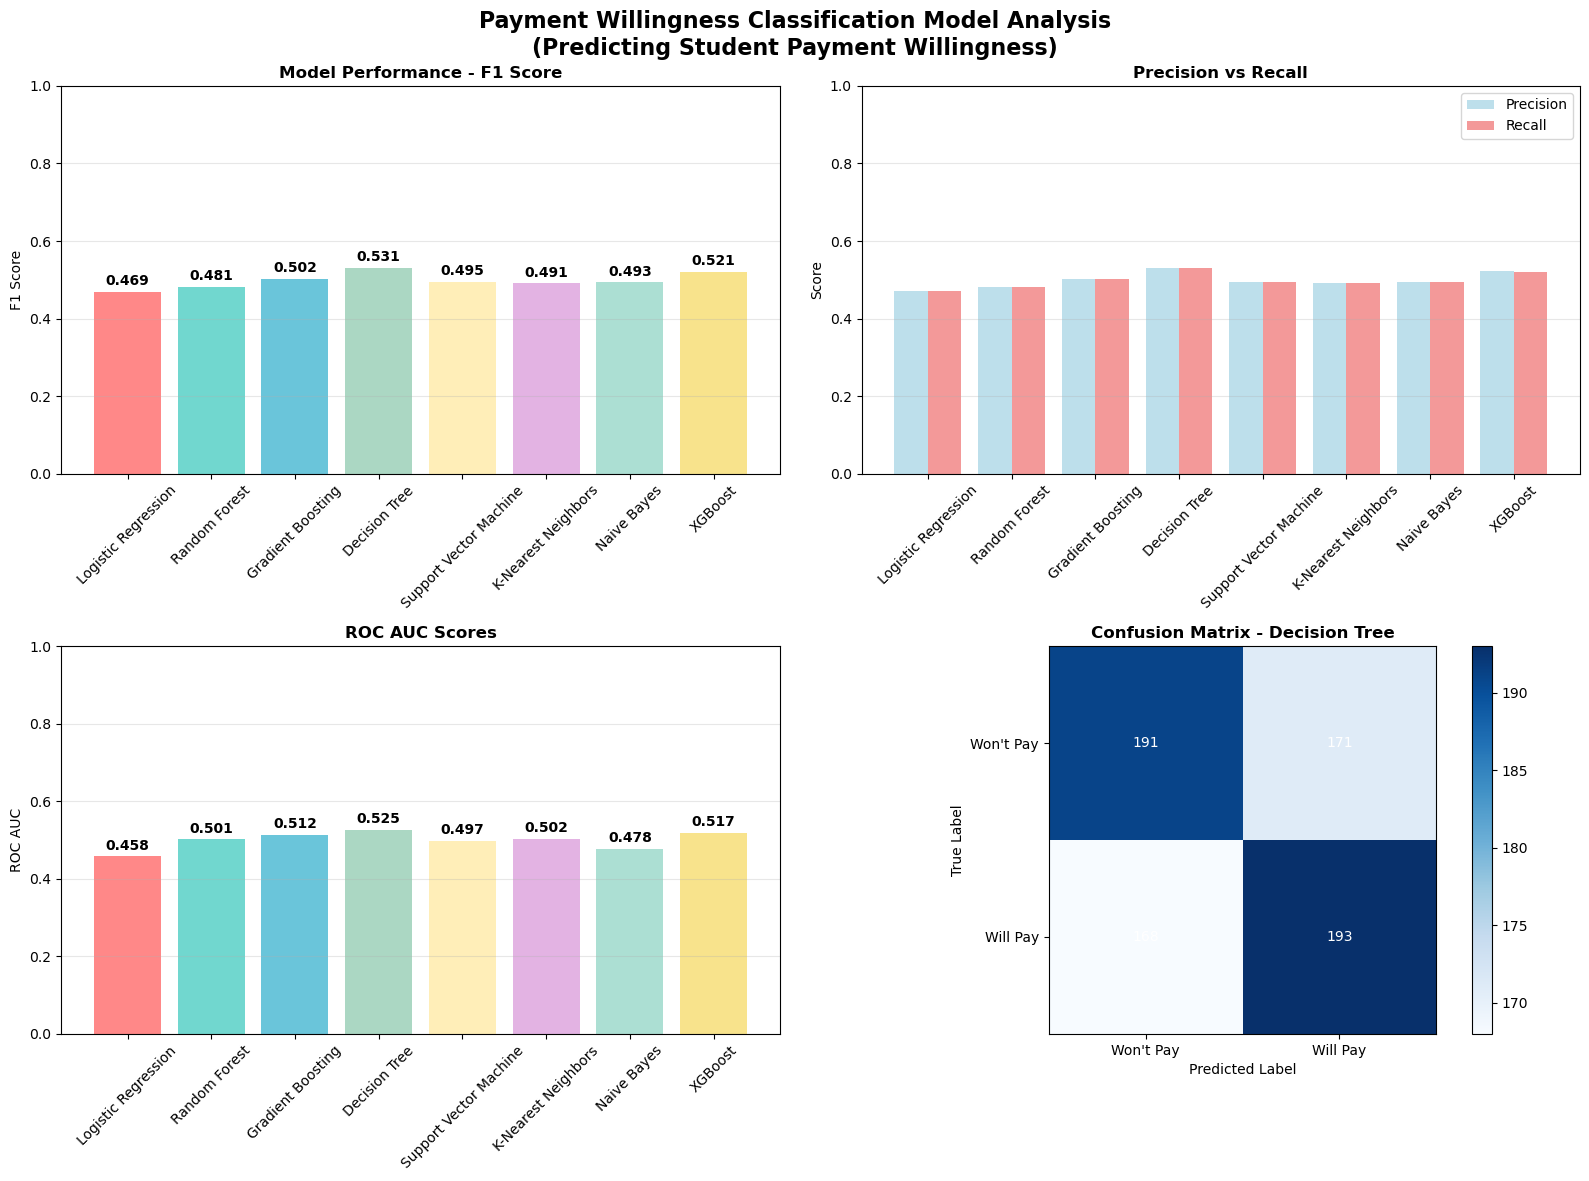


💡 PAYMENT WILLINGNESS CLASSIFICATION INSIGHTS
🏆 BEST MODEL: Decision Tree
   📊 F1 Score: 0.5311
   📊 Accuracy: 0.5311
   📊 Precision: 0.5311
   📊 Recall: 0.5311
   📊 ROC AUC: 0.5250

🔍 CONFUSION MATRIX INTERPRETATION:
   True Negatives (Correctly predicted 'Won't Pay'): 191
   False Positives (Incorrectly predicted 'Will Pay'): 171
   False Negatives (Incorrectly predicted 'Won't Pay'): 168
   True Positives (Correctly predicted 'Will Pay'): 193

📈 PERFORMANCE METRICS:
   Specificity (True Negative Rate): 0.5276
   Sensitivity (True Positive Rate): 0.5346
   Precision (Positive Predictive Value): 0.5311
   Recall (Sensitivity): 0.5311

💰 BUSINESS INSIGHTS:
   📊 This model predicts student willingness to pay for AI tools
   💳 Critical for revenue forecasting and pricing strategies
   📈 Useful for customer segmentation and targeted marketing
   🎯 Key for understanding monetization potential

🚀 BUSINESS APPLICATIONS:
   📊 Pricing Strategy: Optimize pricing based on willingness to pay
   

In [97]:
# 📊 PAYMENT WILLINGNESS CLASSIFICATION VISUALIZATION & ANALYSIS
print("=" * 80)
print("📊 PAYMENT WILLINGNESS CLASSIFICATION VISUALIZATION & ANALYSIS")
print("=" * 80)

if 'Willing_to_Pay_for_Access_encoded' in data.columns and payment_classification_results:
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Payment Willingness Classification Model Analysis\n(Predicting Student Payment Willingness)', 
                 fontsize=16, fontweight='bold')
    
    # Extract model names and metrics
    model_names = list(payment_classification_results.keys())
    f1_scores = [payment_classification_results[name]['f1_score'] for name in model_names]
    precisions = [payment_classification_results[name]['precision'] for name in model_names]
    recalls = [payment_classification_results[name]['recall'] for name in model_names]
    roc_aucs = [payment_classification_results[name]['roc_auc'] if payment_classification_results[name]['roc_auc'] is not None else 0 for name in model_names]
    
    # Color scheme
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']
    
    # 1. F1 Score comparison
    bars1 = axes[0, 0].bar(model_names, f1_scores, color=colors[:len(model_names)], alpha=0.8)
    axes[0, 0].set_title('Model Performance - F1 Score', fontweight='bold')
    axes[0, 0].set_ylabel('F1 Score')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, score in zip(bars1, f1_scores):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Precision vs Recall
    bars2_prec = axes[0, 1].bar([i-0.2 for i in range(len(model_names))], precisions, 
                               width=0.4, label='Precision', color='lightblue', alpha=0.8)
    bars2_rec = axes[0, 1].bar([i+0.2 for i in range(len(model_names))], recalls, 
                              width=0.4, label='Recall', color='lightcoral', alpha=0.8)
    axes[0, 1].set_title('Precision vs Recall', fontweight='bold')
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].set_xticks(range(len(model_names)))
    axes[0, 1].set_xticklabels(model_names, rotation=45)
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # 3. ROC AUC Scores
    bars3 = axes[1, 0].bar(model_names, roc_aucs, color=colors[:len(model_names)], alpha=0.8)
    axes[1, 0].set_title('ROC AUC Scores', fontweight='bold')
    axes[1, 0].set_ylabel('ROC AUC')
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, auc in zip(bars3, roc_aucs):
        if auc > 0:
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{auc:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Confusion Matrix for best model
    if payment_sorted_models:
        best_model_name, best_metrics = payment_sorted_models[0]
        if best_metrics['predictions'] is not None:
            cm = confusion_matrix(y_test_payment, best_metrics['predictions'])
            
            # Create heatmap
            im = axes[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            axes[1, 1].set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
            
            # Add labels
            class_names = ["Won't Pay", "Will Pay"]
            tick_marks = np.arange(len(class_names))
            axes[1, 1].set_xticks(tick_marks)
            axes[1, 1].set_yticks(tick_marks)
            axes[1, 1].set_xticklabels(class_names)
            axes[1, 1].set_yticklabels(class_names)
            
            # Add text annotations
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    axes[1, 1].text(j, i, format(cm[i, j], 'd'),
                                   ha="center", va="center",
                                   color="white" if cm[i, j] > thresh else "black")
            
            axes[1, 1].set_ylabel('True Label')
            axes[1, 1].set_xlabel('Predicted Label')
            
            # Add colorbar
            plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    # Business insights and interpretation
    print("\n" + "=" * 80)
    print("💡 PAYMENT WILLINGNESS CLASSIFICATION INSIGHTS")
    print("=" * 80)
    
    if payment_sorted_models:
        best_model_name, best_metrics = payment_sorted_models[0]
        
        print(f"🏆 BEST MODEL: {best_model_name}")
        print(f"   📊 F1 Score: {best_metrics['f1_score']:.4f}")
        print(f"   📊 Accuracy: {best_metrics['test_accuracy']:.4f}")
        print(f"   📊 Precision: {best_metrics['precision']:.4f}")
        print(f"   📊 Recall: {best_metrics['recall']:.4f}")
        if best_metrics['roc_auc'] is not None:
            print(f"   📊 ROC AUC: {best_metrics['roc_auc']:.4f}")
        
        # Interpret the confusion matrix
        if best_metrics['predictions'] is not None:
            cm = confusion_matrix(y_test_payment, best_metrics['predictions'])
            tn, fp, fn, tp = cm.ravel()
            
            print(f"\n🔍 CONFUSION MATRIX INTERPRETATION:")
            print(f"   True Negatives (Correctly predicted 'Won't Pay'): {tn}")
            print(f"   False Positives (Incorrectly predicted 'Will Pay'): {fp}")
            print(f"   False Negatives (Incorrectly predicted 'Won't Pay'): {fn}")
            print(f"   True Positives (Correctly predicted 'Will Pay'): {tp}")
            
            # Calculate additional metrics
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            
            print(f"\n📈 PERFORMANCE METRICS:")
            print(f"   Specificity (True Negative Rate): {specificity:.4f}")
            print(f"   Sensitivity (True Positive Rate): {sensitivity:.4f}")
            print(f"   Precision (Positive Predictive Value): {best_metrics['precision']:.4f}")
            print(f"   Recall (Sensitivity): {best_metrics['recall']:.4f}")
    
    print(f"\n💰 BUSINESS INSIGHTS:")
    print(f"   📊 This model predicts student willingness to pay for AI tools")
    print(f"   💳 Critical for revenue forecasting and pricing strategies")
    print(f"   📈 Useful for customer segmentation and targeted marketing")
    print(f"   🎯 Key for understanding monetization potential")
    
    print(f"\n🚀 BUSINESS APPLICATIONS:")
    print(f"   📊 Pricing Strategy: Optimize pricing based on willingness to pay")
    print(f"   🎯 Customer Segmentation: Identify high-value customer segments")
    print(f"   📈 Revenue Forecasting: Predict subscription conversion rates")
    print(f"   💡 Marketing Campaigns: Target users likely to convert to paid plans")
    print(f"   🔍 Product Development: Features that drive payment willingness")
    
else:
    print("❌ Cannot create visualization: Missing data or results")

🔍 PAYMENT WILLINGNESS FEATURE IMPORTANCE ANALYSIS
🏆 Analyzing feature importance for best model: Decision Tree

📊 TOP 15 MOST IMPORTANT FEATURES (Tree-based Feature Importance):
------------------------------------------------------------
 1. Awareness_Level                     | 0.1178
 2. Daily_Usage_Hours                   | 0.1096
 3. Impact_on_Grades                    | 0.0931
 4. internet_access_High                | 0.0785
 5. internet_access_Medium              | 0.0756
 6. Year_of_Study                       | 0.0657
 7. Trust_in_AI_Tools                   | 0.0536
 8. device_used_Tablet                  | 0.0320
 9. uses_learning_new_topics            | 0.0297
10. uses_exam_preparation               | 0.0289
11. preferred_ai_tool_Other             | 0.0280
12. uses_project_work                   | 0.0245
13. uses_content_writing                | 0.0241
14. Do_Professors_Allow_Use_encoded     | 0.0219
15. ai_tool_gemini                      | 0.0216


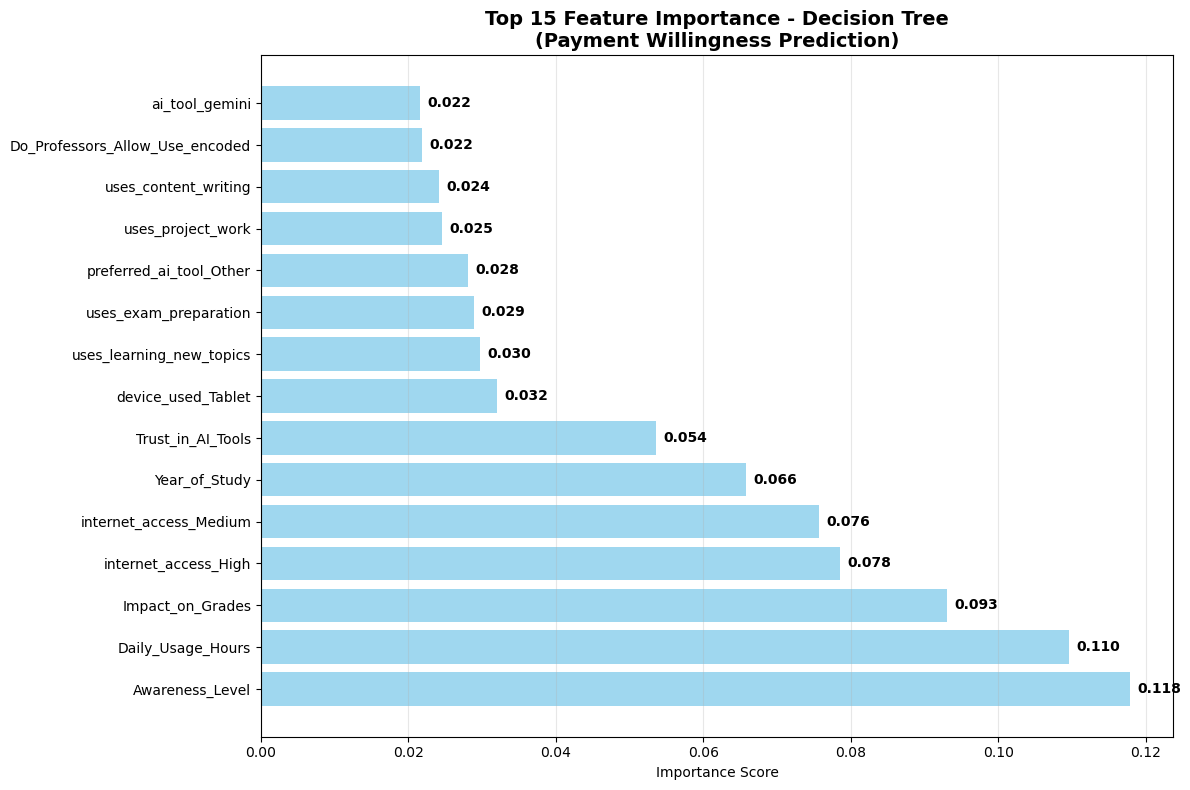


💡 BUSINESS INTERPRETATION OF TOP FEATURES:

1. Awareness_Level (Importance: 0.1178)
   💡 Higher awareness correlates with payment willingness

2. Daily_Usage_Hours (Importance: 0.1096)
   💡 Usage patterns strongly influence payment willingness

3. Impact_on_Grades (Importance: 0.0931)
   💡 Perceived value directly affects payment willingness

4. internet_access_High (Importance: 0.0785)
   💡 This feature significantly impacts payment decisions

5. internet_access_Medium (Importance: 0.0756)
   💡 This feature significantly impacts payment decisions

📈 MONETIZATION INSIGHTS:
🎯 Focus on high-importance features for:
   📊 Pricing strategy optimization
   🎯 Customer segment identification
   📈 Conversion rate improvement
   💡 Product feature development
   🔍 Marketing message personalization


In [98]:
# 🔍 PAYMENT WILLINGNESS FEATURE IMPORTANCE ANALYSIS
print("=" * 80)
print("🔍 PAYMENT WILLINGNESS FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

if 'Willing_to_Pay_for_Access_encoded' in data.columns and payment_classification_results:
    # Get the best model for feature importance
    if payment_sorted_models:
        best_model_name, best_metrics = payment_sorted_models[0]
        best_model = best_metrics['model']
        
        print(f"🏆 Analyzing feature importance for best model: {best_model_name}")
        
        # Get feature names
        feature_names = X_train_payment.columns.tolist()
        
        # Extract feature importance based on model type
        if hasattr(best_model, 'feature_importances_'):
            # Tree-based models
            importances = best_model.feature_importances_
            importance_type = "Tree-based Feature Importance"
        elif hasattr(best_model, 'coef_'):
            # Linear models
            importances = np.abs(best_model.coef_[0])
            importance_type = "Coefficient Magnitude"
        else:
            print("⚠️  Selected model doesn't support feature importance analysis")
            importances = None
            importance_type = None
        
        if importances is not None:
            # Create feature importance dataframe
            payment_feature_imp_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(f"\n📊 TOP 15 MOST IMPORTANT FEATURES ({importance_type}):")
            print("-" * 60)
            for i, (_, row) in enumerate(payment_feature_imp_df.head(15).iterrows(), 1):
                print(f"{i:2d}. {row['feature']:35s} | {row['importance']:.4f}")
            
            # Visualize feature importance
            plt.figure(figsize=(12, 8))
            top_features = payment_feature_imp_df.head(15)
            
            bars = plt.barh(range(len(top_features)), top_features['importance'], 
                           color='skyblue', alpha=0.8)
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Importance Score')
            plt.title(f'Top 15 Feature Importance - {best_model_name}\n(Payment Willingness Prediction)', 
                     fontsize=14, fontweight='bold')
            plt.grid(axis='x', alpha=0.3)
            
            # Add value labels
            for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
                width = bar.get_width()
                plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                        f'{importance:.3f}', ha='left', va='center', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            
            # Business interpretation of top features
            print(f"\n💡 BUSINESS INTERPRETATION OF TOP FEATURES:")
            print("=" * 60)
            
            top_5_features = payment_feature_imp_df.head(5)
            for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
                feature = row['feature']
                importance = row['importance']
                
                print(f"\n{i}. {feature} (Importance: {importance:.4f})")
                
                # Provide business context for common features
                if 'Daily_Usage_Hours' in feature:
                    print("   💡 Usage patterns strongly influence payment willingness")
                elif 'Trust_in_AI_Tools' in feature:
                    print("   💡 Trust level is crucial for monetization decisions")
                elif 'Impact_on_Grades' in feature:
                    print("   💡 Perceived value directly affects payment willingness")
                elif 'Awareness_Level' in feature:
                    print("   💡 Higher awareness correlates with payment willingness")
                elif 'ai_tool_' in feature:
                    print("   💡 Specific AI tool usage patterns affect payment decisions")
                elif 'preferred_ai_tool_' in feature:
                    print("   💡 Tool preferences influence willingness to pay")
                elif 'uses_' in feature:
                    print("   💡 Specific use cases drive payment willingness")
                elif 'Year_of_Study' in feature:
                    print("   💡 Academic level influences payment capacity/willingness")
                else:
                    print("   💡 This feature significantly impacts payment decisions")
            
            print(f"\n📈 MONETIZATION INSIGHTS:")
            print("=" * 40)
            print("🎯 Focus on high-importance features for:")
            print("   📊 Pricing strategy optimization")
            print("   🎯 Customer segment identification")
            print("   📈 Conversion rate improvement")
            print("   💡 Product feature development")
            print("   🔍 Marketing message personalization")
            
        else:
            print("⚠️  Could not extract feature importance from the best model")
    
    else:
        print("⚠️  No models available for feature importance analysis")
        
else:
    print("❌ Cannot perform feature importance analysis: Missing data or results")